## **A Data Mining Framework To Analyze Road Accident Data - Road Accident Data Analysis**


![](https://cdn.newsfirst.lk/english-uploads/2021/04/15b84da5-accident.jpg)

## **Introduction**

***Road accidents are uncertain and unpredictable incidents and their analysis
requires the knowledge of the factors affecting them.Fatalities and injuries
resulting from road traffic accidents are a major and growing public health
problem in India. Every week nearly 2,650 people get killed and 9,000 get
injured due to traffic accidents.***

***Traffic accidents have now earned India a dubious distinction; with nearly
140,000 deaths annually, the country has overtaken China to top the world in
road fatalities. India is the only country in the world which faces more than
15 fatalities and 53 injuries every hour as a consequence of road crashes.***

***The major problem in the analysis of accident data is its Heterogeneous
nature. Thus, heterogeneity must be considered during analysis of the data.
Road accident analysis aims to investigate the main factors that characterize
an accident to understand patterns or behaviors and, consequently, to identify
the appropriate countermeasures to adopt to avoid the accident.***

## **Importing the Libraries**

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

## **Reading the Dataset**
<img src="https://media.giphy.com/media/xUA7b2OfgTuVzqpVXq/giphy.gif" width="200"/>

In [2]:
# Reading the csv file
data = pd.read_csv(
    '../input/road-accident-analysis-data/Road Accident Analysis Data/Analysis/Road Accident Data Set - 2018.csv',
    index_col=0)

### **Glimpse of the Dataset**


In [3]:
print("Rows: ", data.shape[0], "Columns: ", data.shape[1])
pd.DataFrame(data.columns.values, columns=['COLUMN NAME'])

Rows:  37 Columns:  306


COLUMN NAME
0      T-Junction - Total Number of Accidents - Number
1                 T-Junction - Persons Killed - Number
2    T-Junction - Persons Injured - Greviously Injured
3          T-Junction - Persons Injured - Minor Injury
4         T-Junction - Persons Injured - Total Injured
..                                                 ...
301                               21-2400hrs - (Night)
302                                00-300hrs - (Night)
303                                03-600hrs - (Night)
304                                       Unknown Time
305                                  Total Accidents.1

[306 rows x 1 columns]

### **Data Cleaning**

***In our data, there often exists components which might not be of any help to us. 
The main target of this section will be to remove those components- such that we can have a smoother analysis.***

![](https://www.clorox.com/wp-content/uploads/2020/06/clx-hub-cleaning-sanitizing-730.png)



#### **Identifying Missing Values**

***We will invesitigate each column with total missing values.***

In [4]:
# PreProcessing the Data

# Replacing NR by 0 and converting the type to float
for col in range(30, 57):
    data[data.columns[col]] = data[data.columns[col]].replace({'NR': 0})
    data[data.columns[col]] = data[data.columns[col]].astype(float)

# Droping the unneccesary Row
data = data.drop('Total')

In [5]:
# Displaying the read data

# display(data)
data.head(5)

T-Junction - Total Number of Accidents - Number  \
States/UTs                                                           
Andhra Pradesh                                                2384   
Arunachal Pradesh                                               38   
Assam                                                          838   
Bihar                                                          812   
Chhattisgarh                                                  1730   

                   T-Junction - Persons Killed - Number  \
States/UTs                                                
Andhra Pradesh                                      762   
Arunachal Pradesh                                    30   
Assam                                               260   
Bihar                                               509   
Chhattisgarh                                        483   

                   T-Junction - Persons Injured - Greviously Injured  \
States/UTs                                                             
Andhra Pradesh                                                  1006   
Arunachal Pradesh                                                 25   
Assam                                                            520   
Bihar                                                            395   
Chhattisgarh                                                     282   

                   T-Junction - Persons Injured - Minor Injury  \
States/UTs                                                       
Andhra Pradesh                                            1300   
Arunachal Pradesh                                           15   
Assam                                                      100   
Bihar                                                      100   
Chhattisgarh                                              1095   

                   T-Junction - Persons Injured - Total Injured  \
States/UTs                                                        
Andhra Pradesh                                             2306   
Arunachal Pradesh                                            40   
Assam                                                       620   
Bihar                                                       495   
Chhattisgarh                                               1377   

                   Y-Junction - Total Number of Accidents  \
States/UTs                                                  
Andhra Pradesh                                       1473   
Arunachal Pradesh                                      35   
Assam                                                 624   
Bihar                                                 388   
Chhattisgarh                                          549   

                   Y-Junction - Persons Killed  \
States/UTs                                       
Andhra Pradesh                             404   
Arunachal Pradesh                           21   
Assam                                      188   
Bihar                                      237   
Chhattisgarh                               162   

                   Y-Junction - Persons Injured - Greviously Injured  \
States/UTs                                                             
Andhra Pradesh                                                   659   
Arunachal Pradesh                                                 20   
Assam                                                            386   
Bihar                                                            218   
Chhattisgarh                                                     113   

                   Y-Junction - Persons Injured - Minor Injury  \
States/UTs                                                       
Andhra Pradesh                                             841   
Arunachal Pradesh                                           12   
Assam                                                       95   
Bihar                                                       70

***We will receck & identify the percentage of NaN values in the dataset.***

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() *
               100).sort_values(ascending=False)
    return pd.concat([total, percent],
                     axis=1,
                     keys=['Total NaN Values', 'Percentage of NaN Values'])

In [7]:
missing_data(data)

Total NaN Values  \
T-Junction - Total Number of Accidents - Number                    0   
Type of collision Hit & Run - Total Accidents                      0   
With Parked Vehicle - Persons Injured - Greviou...                 0   
With Parked Vehicle - Persons Killed                               0   
With Parked Vehicle - Total Accidents                              0   
...                                                              ...   
Urban - Persons Injured - Minor Injury                             0   
Urban - Persons Injured - Greviously Injured                       0   
Urban - Persons Killed                                             0   
Urban - Total Accidents                                            0   
Total Accidents.1                                                  0   

                                                    Percentage of NaN Values  
T-Junction - Total Number of Accidents - Number                          0.0  
Type of collision Hit & Run - Total Accidents                            0.0  
With Parked Vehicle - Persons Injured - Greviou...                       0.0  
With Parked Vehicle - Persons Killed                                     0.0  
With Parked Vehicle - Total Accidents                                    0.0  
...                                                                      ...  
Urban - Persons Injured - Minor Injury                                   0.0  
Urban - Persons Injured - Greviously Injured                             0.0  
Urban - Persons Killed                                                   0.0  
Urban - Total Accidents                                                  0.0  
Total Accidents.1                                                        0.0  

[306 rows x 2 columns]

### **Exploratory Data Analysis (EDA)**
<img src="https://media.giphy.com/media/JrXas5ecb4FkwbFpIE/giphy.gif" width="200">

***In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.***
<br><br>


#### **Total Number Of Accidents Occured across The Indian States**

Text(0, 0.5, 'Number of Accidents')

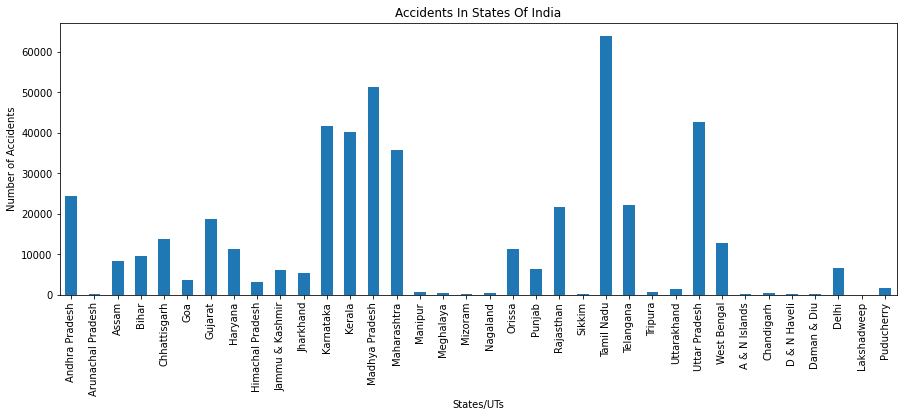

In [8]:
# Total Number Of Accidents Occured across The Indian States

data['Total Accidents'].plot.bar(figsize=(15, 5),
                                 title="Accidents In States Of India")
plot.ylabel('Number of Accidents')

#### **Total Number Of Accidents Occured across The Indian States In Increasing Order**

Text(0, 0.5, 'Number of Accidents')

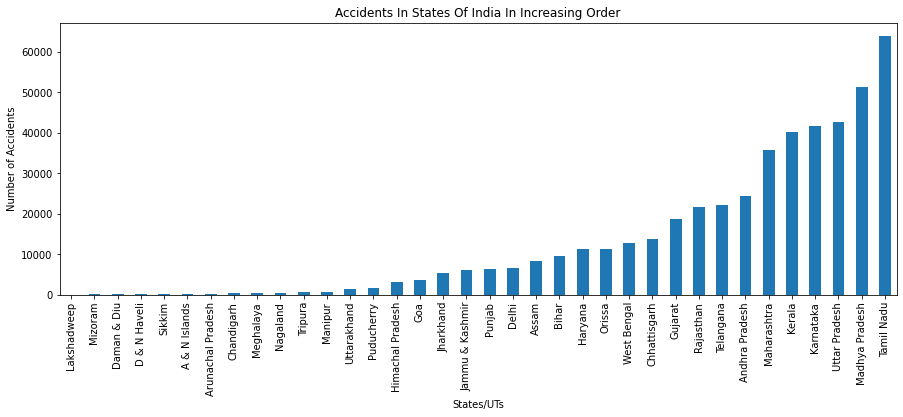

In [9]:
# Total Number Of Accidents Occured across The Indian States In Increasing Order

sorted_TotalAccidents = data.sort_values('Total Accidents')
sorted_TotalAccidents['Total Accidents'].plot.bar(
    figsize=(15, 5), title="Accidents In States Of India In Increasing Order")
plot.ylabel('Number of Accidents')

#### **Analysing the accidents occured at T Junction's**

433.55555555555554 607.5555555555555 936.5833333333334 1544.138888888889


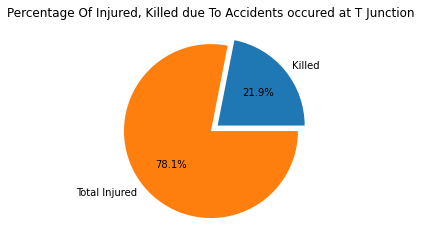

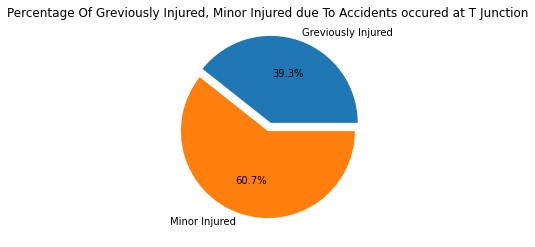

Text(0.5, 1.0, 'Total Accidents At T Junction')

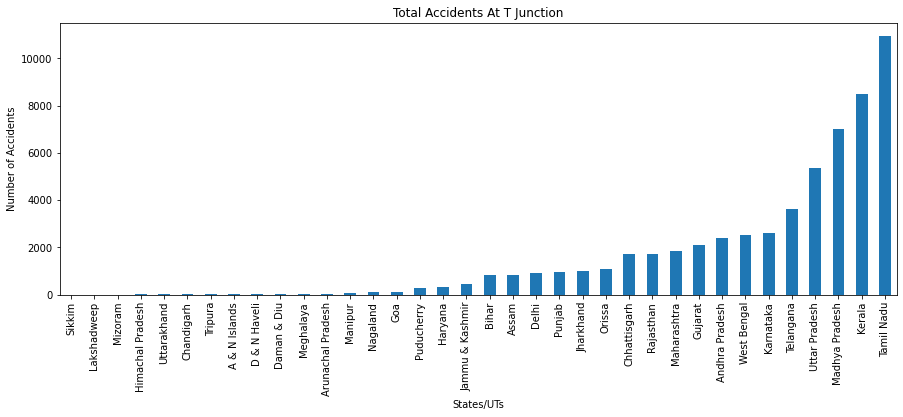

In [10]:
# Analysing the accidents occured at T Junction's

# Extract The T Junction Data
data_TJunction = data[data.columns[0:5]]
data_TJunction.head(5)

# Calculating the required mean of different attributes
mean_Killed = (np.mean(data_TJunction['T-Junction - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(
    data_TJunction['T-Junction - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_TJunction['T-Junction - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_TJunction['T-Junction - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents occured at T Junction")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents occured at T Junction"
)
plot.show()

# Plotting the Total Number Of Accidents Occured At T Junction across the states In Increasing Order
sorted_TJunctionTotalAccidents = data_TJunction.sort_values(
    'T-Junction - Total Number of Accidents - Number')
sorted_TJunctionTotalAccidents[
    'T-Junction - Total Number of Accidents - Number'].plot.bar(figsize=(15,
                                                                         5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents At T Junction")

#### **Analysing the accidents occured at Y Junction's**

218.5 283.8611111111111 382.8888888888889 666.75


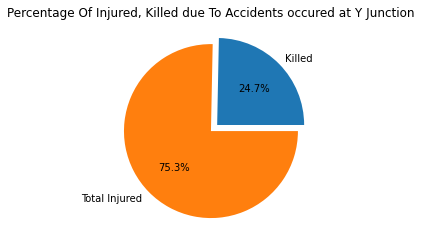

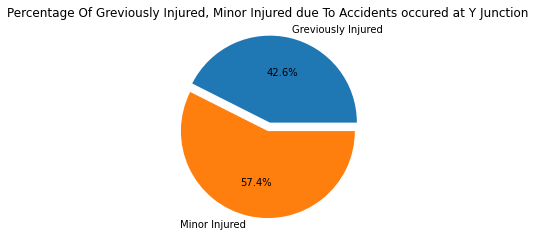

Text(0.5, 1.0, 'Total Accidents At Y Junction')

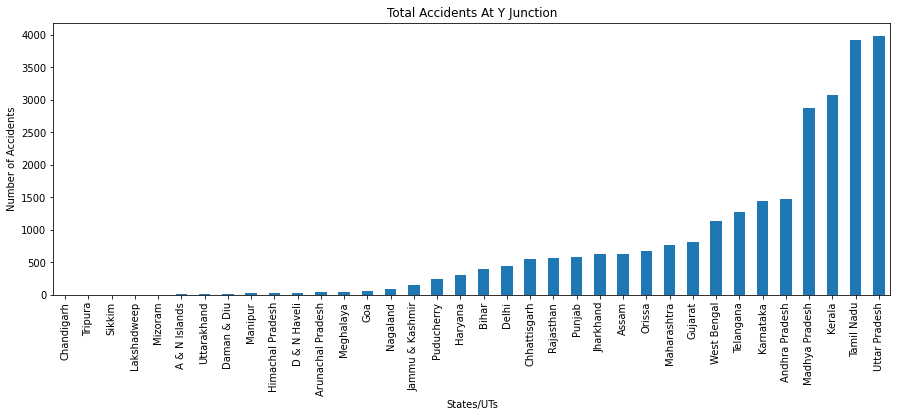

In [11]:
# Analysing the accidents occured at Y Junction's

# Extract The Y Junction Data
data_YJunction = data[data.columns[5:10]]
data_YJunction.head(5)

# Calculating the required mean of different attributes
mean_Killed = (np.mean(data_YJunction['Y-Junction - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_YJunction['Y-Junction - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_YJunction['Y-Junction - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_YJunction['Y-Junction - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents occured at Y Junction")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents occured at Y Junction"
)
plot.show()

# Plotting the Total Number Of Accidents Occured At Y Junction across the states In Increasing Order

sorted_YJunctionTotalAccidents = data_YJunction.sort_values(
    'Y-Junction - Total Number of Accidents')
sorted_YJunctionTotalAccidents[
    'Y-Junction - Total Number of Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents At Y Junction")

#### **Extracting Four Arm Junction's Data**

212.55555555555554 278.5833333333333 448.5833333333333 727.1666666666666


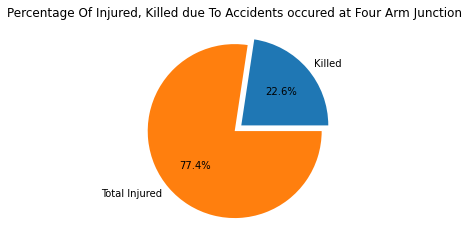

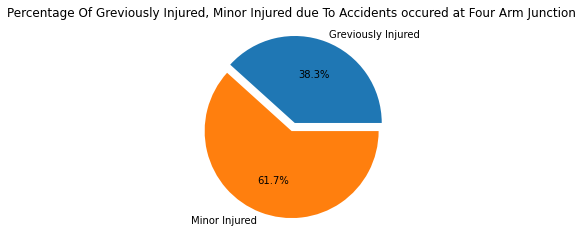

Text(0.5, 1.0, 'Total Accidents At FourArm Junction')

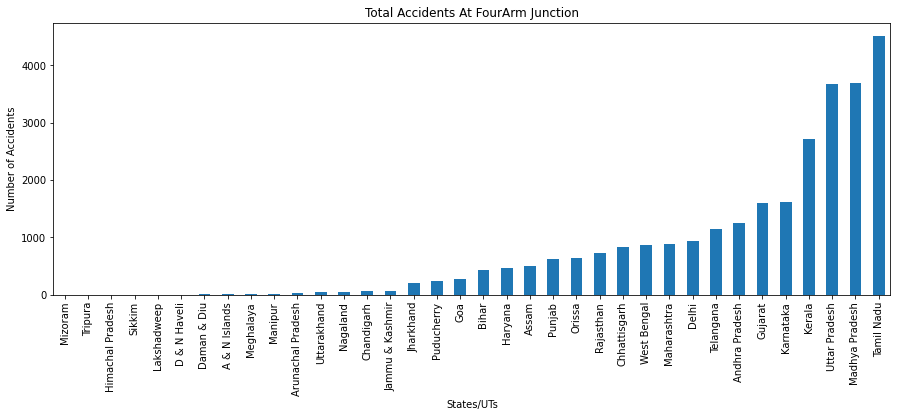

In [12]:
# Extracting Four Arm Junction's Data
data_FourArmJunction = data[data.columns[10:15]]
data_FourArmJunction.head(5)

# Calculating the means
mean_Killed = (np.mean(
    data_FourArmJunction['Four arm Junction - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_FourArmJunction[
    'Four arm Junction - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_FourArmJunction['Four arm Junction - Persons Injured - Minor Injury'])
                     )
mean_TotalInjured = (np.mean(
    data_FourArmJunction['Four arm Junction - Persons Injured - Total Injured']
))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents occured at Four Arm Junction"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents occured at Four Arm Junction"
)
plot.show()

# Plotting the Total Number Of Accidents Occured At Four Arm Junction In Increasing Order
sorted_FourArmJunctionTotalAccidents = data_FourArmJunction.sort_values(
    'Four arm Junction - Total Number of Accidents')
sorted_FourArmJunctionTotalAccidents[
    'Four arm Junction - Total Number of Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents At FourArm Junction")

#### **Extracting Staggered Junction's Data**

220.02777777777777 233.44444444444446 361.30555555555554 594.75


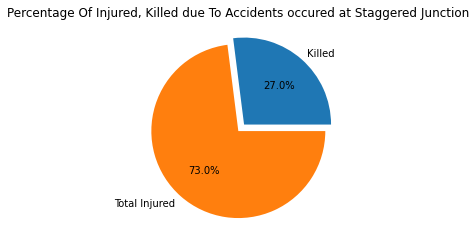

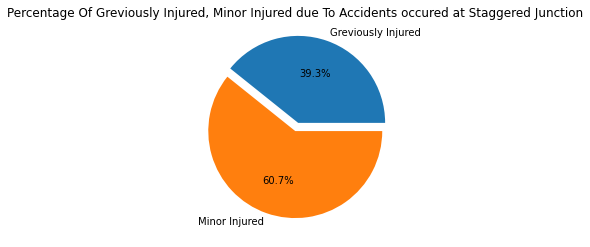

Text(0.5, 1.0, 'Total Accidents At Staggered Junction')

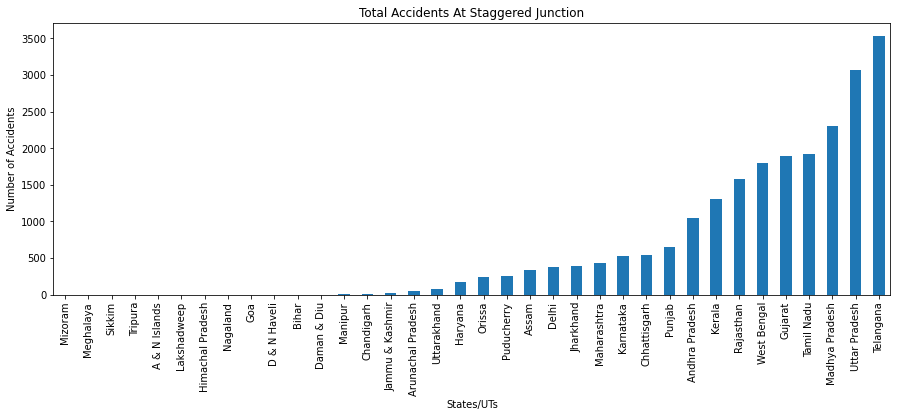

In [13]:
# Extracting Staggered Junction's Data
data_StaggeredJunction = data[data.columns[15:20]]
data_StaggeredJunction.head(5)

# Calculating the means
mean_Killed = (np.mean(
    data_StaggeredJunction['Staggered Junction - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_StaggeredJunction[
    'Staggered Junction - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_StaggeredJunction[
    'Staggered Junction - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_StaggeredJunction[
    'Staggered Junction - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents occured at Staggered Junction"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents occured at Staggered Junction"
)
plot.show()

# Plotting the Total Number Of Accidents Occured At Staggered Junction In Increasing Order
sorted_StaggeredJunctionTotalAccidents = data_StaggeredJunction.sort_values(
    'Staggered Junction - Total Number of Accidents')
sorted_StaggeredJunctionTotalAccidents[
    'Staggered Junction - Total Number of Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents At Staggered Junction")

#### **Extracting Round about Junction's Data**

187.91666666666666 206.38888888888889 326.75 533.1388888888889


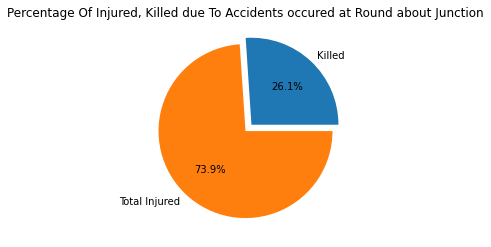

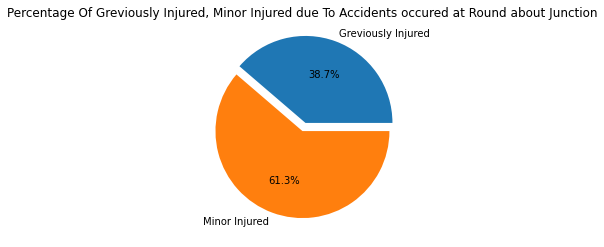

Text(0.5, 1.0, 'Total Accidents At Round About Junction')

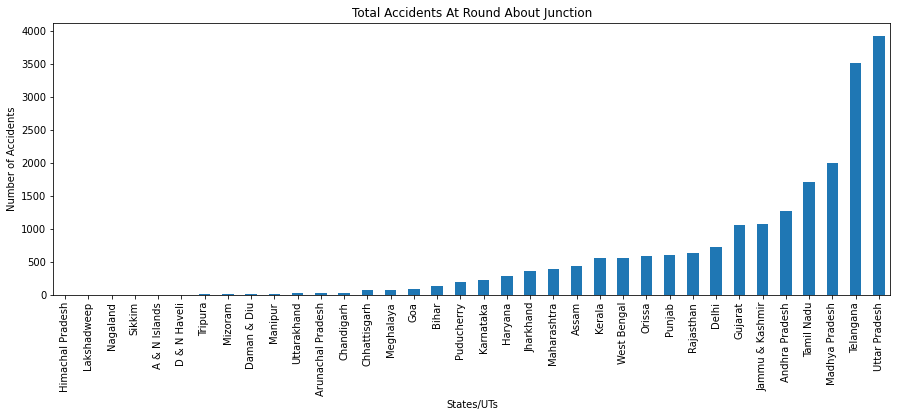

In [14]:
# Extracting Round about Junction's Data
data_RoundaboutJunction = data[data.columns[20:25]]
data_RoundaboutJunction.head(5)

# Calculating the means
mean_Killed = (np.mean(
    data_RoundaboutJunction['Round about Junction - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_RoundaboutJunction[
    'Round about Junction - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_RoundaboutJunction[
    'Round about Junction - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_RoundaboutJunction[
    'Round about Junction - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents occured at Round about Junction"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents occured at Round about Junction"
)
plot.show()

# Plotting the Total Number Of Accidents Occured At Round About Junction In Increasing Order
sorted_RoundaboutJunctionTotalAccidents = data_RoundaboutJunction.sort_values(
    'Round about Junction - Total Number of Accidents')
sorted_RoundaboutJunctionTotalAccidents[
    'Round about Junction - Total Number of Accidents'].plot.bar(figsize=(15,
                                                                          5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents At Round About Junction")

#### **Extracting all Junction's Accident Data**

1601.4444444444443 728.3333333333334 781.25 626.5833333333334 569.8611111111111


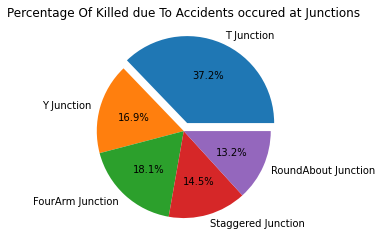

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents at all the Junctions')

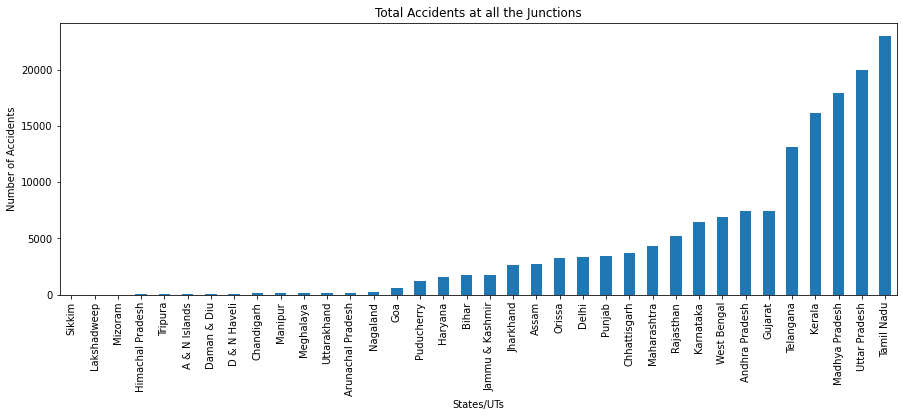

In [15]:
# Extracting all Junction's Accident Data
data_Junction = data[[
    'T-Junction - Total Number of Accidents - Number',
    'Y-Junction - Total Number of Accidents',
    'Four arm Junction - Total Number of Accidents',
    'Staggered Junction - Total Number of Accidents',
    'Round about Junction - Total Number of Accidents'
]]
data_Junction.head(5)

# Calculating the means
mean_KilledTJunction = (np.mean(
    data_Junction['T-Junction - Total Number of Accidents - Number']))
mean_KilledYJunction = (np.mean(
    data_Junction['Y-Junction - Total Number of Accidents']))
mean_KilledFourArmJunction = (np.mean(
    data_Junction['Four arm Junction - Total Number of Accidents']))
mean_KilledStaggeredJunction = (np.mean(
    data_Junction['Staggered Junction - Total Number of Accidents']))
mean_KilledRoundAboutJunction = (np.mean(
    data_Junction['Round about Junction - Total Number of Accidents']))
print(mean_KilledTJunction, mean_KilledYJunction, mean_KilledFourArmJunction,
      mean_KilledStaggeredJunction, mean_KilledRoundAboutJunction)

# Plotting a Pie Chart
sizes = [
    mean_KilledTJunction, mean_KilledYJunction, mean_KilledFourArmJunction,
    mean_KilledStaggeredJunction, mean_KilledRoundAboutJunction
]
labels = [
    'T Junction', 'Y Junction', 'FourArm Junction', 'Staggered Junction',
    'RoundAbout Junction'
]
explode = (0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents occured at Junctions")
plot.show()

# Plotting the Total Number Of Accidents Occured At Junction In Increasing Order
data_Junction['Total Accidents'] = data[[
    'T-Junction - Total Number of Accidents - Number',
    'Y-Junction - Total Number of Accidents',
    'Four arm Junction - Total Number of Accidents',
    'Staggered Junction - Total Number of Accidents',
    'Round about Junction - Total Number of Accidents'
]].sum(axis=1)
sorted_JunctionTotalAccidents = data_Junction.sort_values('Total Accidents')
sorted_JunctionTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents at all the Junctions")

#### **Extracting Vehicle Age (Less Than 5 Years) Data**

1371.1944444444443 1663.4166666666667 3111.0555555555557 4774.472222222223


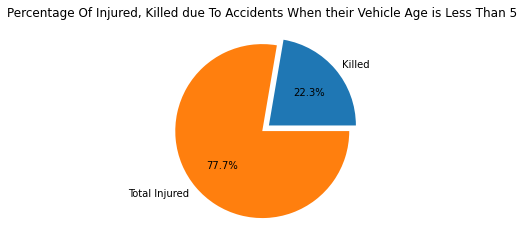

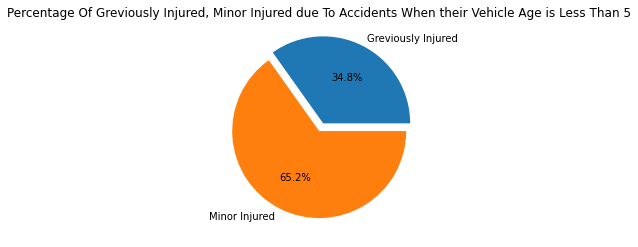

Text(0.5, 1.0, 'Total Accidents When Vehicle Age Is Less Than 5')

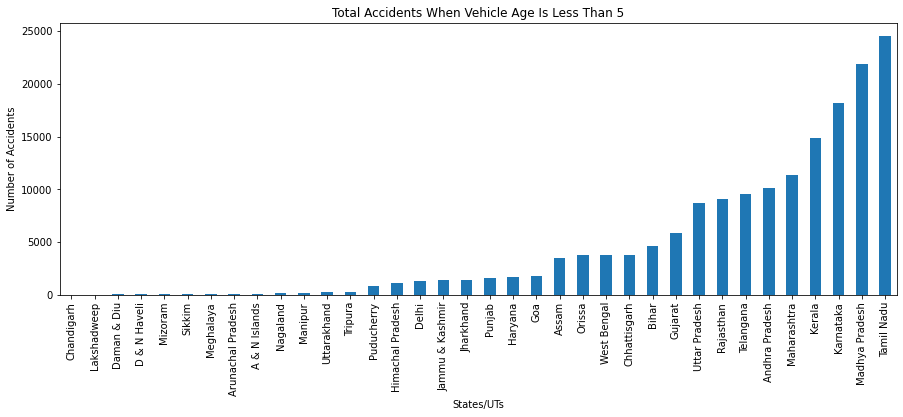

In [16]:
# Extracting Vehicle Age (Less Than 5 Years) Data
data_VehicleAgeLessThan5 = data[data.columns[30:37]]
data_VehicleAgeLessThan5.head(5)

# Calculating the means
mean_Killed = (np.mean(
    data_VehicleAgeLessThan5['Less than 5 Years - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(data_VehicleAgeLessThan5[
    'Less than 5 Years - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_VehicleAgeLessThan5[
    'Less than 5 Years - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_VehicleAgeLessThan5[
    'Less than 5 Years - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When their Vehicle Age is Less Than 5"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents When their Vehicle Age is Less Than 5"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When their Vehicle Age is Less Than 5 In Increasing Order
sorted_VehicleAgeLessThan5TotalAccidents = data_VehicleAgeLessThan5.sort_values(
    'Vehicle ageLess than 5 Years - Total Accidents - Number')
sorted_VehicleAgeLessThan5TotalAccidents[
    'Vehicle ageLess than 5 Years - Total Accidents - Number'].plot.bar(
        figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents When Vehicle Age Is Less Than 5")

#### **Extracting Vehicle Age (Greather than 5 and Less Than 10 Years) Data**

1115.138888888889 1444.5277777777778 2312.5 3757.027777777778


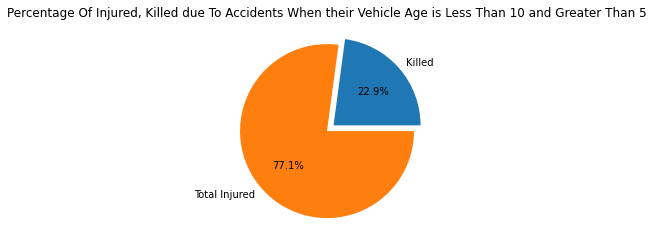

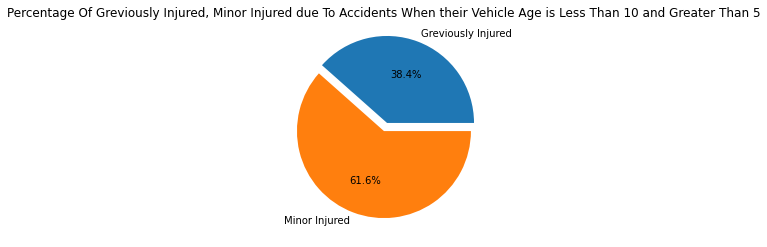

Text(0.5, 1.0, 'Total Accidents When their Vehicle Age is Less Than 10 and Greater Than 5')

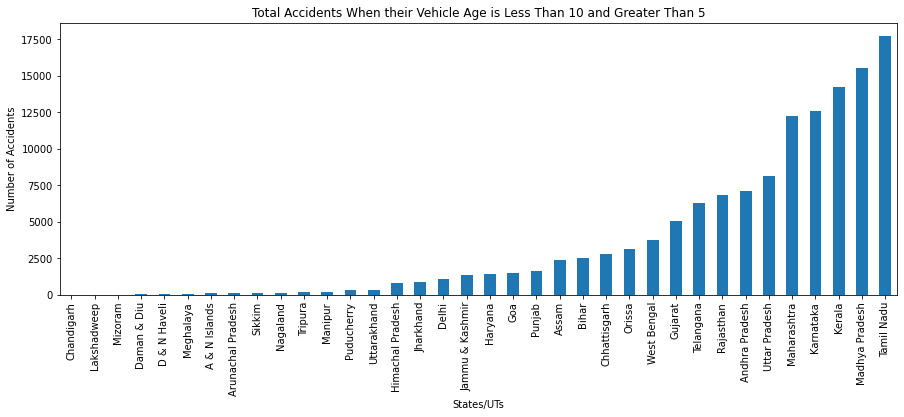

In [17]:
# Extracting Vehicle Age (Greather than 5 and Less Than 10 Years) Data
data_VehicleAge = data[data.columns[37:42]]
data_VehicleAge.head(5)

# Calculating the means
mean_Killed = (np.mean(data_VehicleAge['5.1 - 10 Years - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_VehicleAge['5.1 - 10 Years - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_VehicleAge['5.1 - 10 Years - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_VehicleAge['5.1 - 10 Years - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When their Vehicle Age is Less Than 10 and Greater Than 5"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents When their Vehicle Age is Less Than 10 and Greater Than 5"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When their Vehicle Age is Less Than 10 and Greater Than 10 In Increasing Order
sorted_VehicleAgeTotalAccidents = data_VehicleAge.sort_values(
    '5.1 - 10 Years - Total Accidents')
sorted_VehicleAgeTotalAccidents['5.1 - 10 Years - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents When their Vehicle Age is Less Than 10 and Greater Than 5"
)

#### **Extracting Vehicle Age (Greather than 10 and Less Than 15 Years) Data**

572.4444444444445 678.8888888888889 1040.888888888889 1719.7777777777778


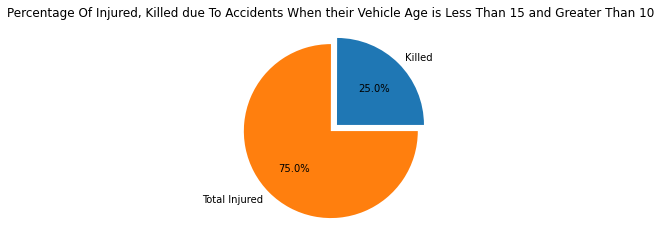

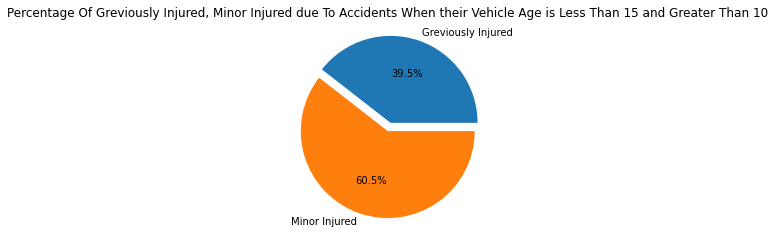

Text(0.5, 1.0, 'Total Accidents When their Vehicle Age is Less Than 15 and Greater Than 10')

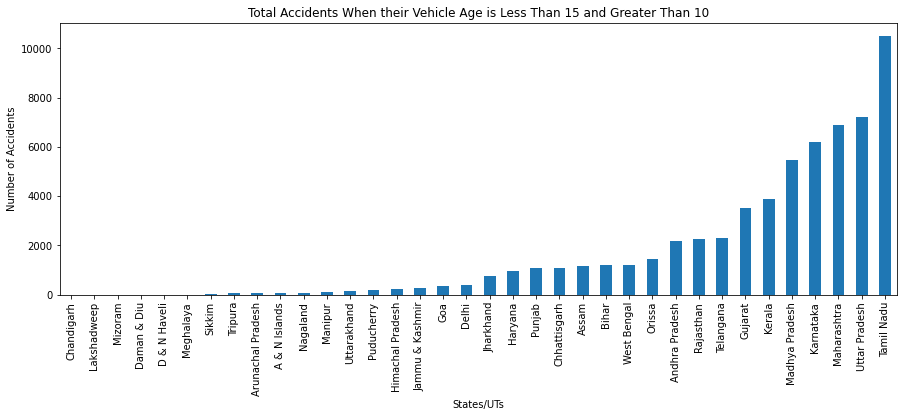

In [18]:
# Extracting Vehicle Age (Greather than 10 and Less Than 15 Years) Data
data_VehicleAge = data[data.columns[42:47]]
data_VehicleAge.head(5)

# Calculating the means
mean_Killed = (np.mean(data_VehicleAge['10.1 - 15 Years - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_VehicleAge['10.1 - 15 Years - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_VehicleAge['10.1 - 15 Years - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_VehicleAge['10.1 - 15 Years - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When their Vehicle Age is Less Than 15 and Greater Than 10"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents When their Vehicle Age is Less Than 15 and Greater Than 10"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When their Vehicle Age is Less Than 15 and greater than 10 In Increasing Order
sorted_VehicleAgeTotalAccidents = data_VehicleAge.sort_values(
    '10.1 - 15 Years - Total Accidents')
sorted_VehicleAgeTotalAccidents['10.1 - 15 Years - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents When their Vehicle Age is Less Than 15 and Greater Than 10"
)

#### **Extracting Vehicle Age (Greather than 15) Data**

457.30555555555554 499.1388888888889 682.75 1181.888888888889


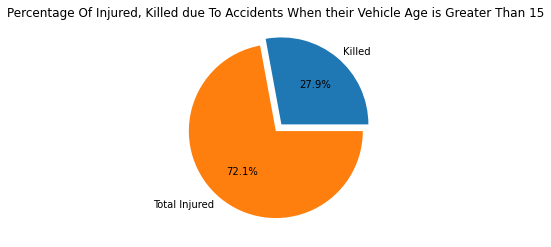

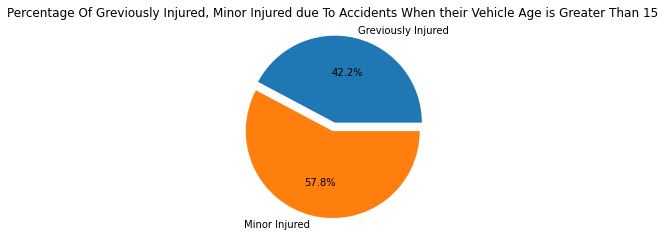

Text(0.5, 1.0, 'Total Accidents When their Vehicle Age is Greater Than 15')

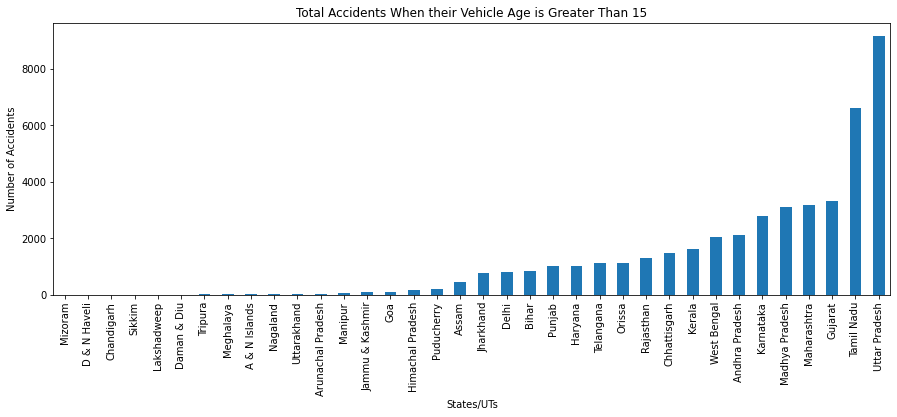

In [19]:
# Extracting Vehicle Age (Greather than 15) Data
data_VehicleAge = data[data.columns[47:52]]
data_VehicleAge.head(5)

# Calculating the means
mean_Killed = (np.mean(data_VehicleAge['> 15 Years - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_VehicleAge['> 15 Years - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_VehicleAge['> 15 Years - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_VehicleAge['> 15 Years - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart
sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When their Vehicle Age is Greater Than 15"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents When their Vehicle Age is Greater Than 15"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When their Vehicle Age is greater than 15 In Increasing Order
sorted_VehicleAgeTotalAccidents = data_VehicleAge.sort_values(
    '> 15 Years - Total Accidents')
sorted_VehicleAgeTotalAccidents['> 15 Years - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents When their Vehicle Age is Greater Than 15")

#### **Extracting Vehicles's Age Accident Data**

1371.1944444444443 1115.138888888889 572.4444444444445 457.30555555555554


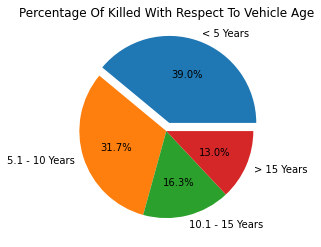

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Vehicle Age')

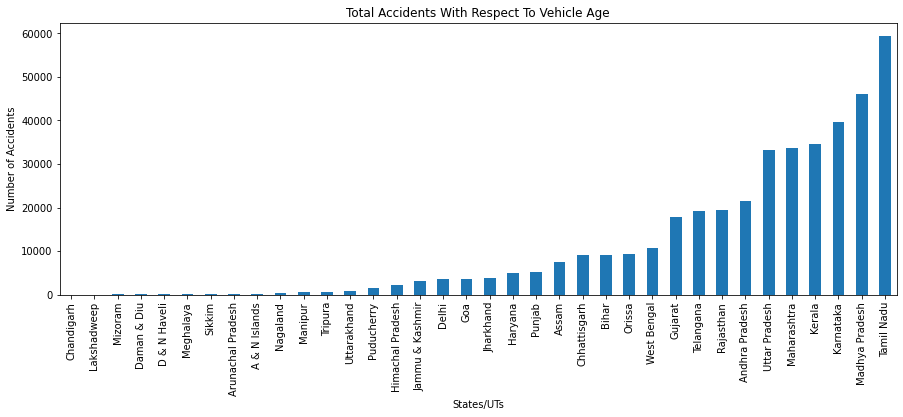

In [20]:
# Extracting Vehicles's Age Accident Data
data_VehicleAge = data[[
    'Less than 5 Years - Persons Killed - Number',
    '5.1 - 10 Years - Persons Killed', '10.1 - 15 Years - Persons Killed',
    '> 15 Years - Persons Killed'
]]
data_VehicleAge.head(5)

# Calculating the means
mean_KilledL5 = (np.mean(
    data_VehicleAge['Less than 5 Years - Persons Killed - Number']))
mean_KilledL10G5 = (np.mean(
    data_VehicleAge['5.1 - 10 Years - Persons Killed']))
mean_KilledL15G10 = (np.mean(
    data_VehicleAge['10.1 - 15 Years - Persons Killed']))
mean_KilledG15 = (np.mean(data_VehicleAge['> 15 Years - Persons Killed']))
print(mean_KilledL5, mean_KilledL10G5, mean_KilledL15G10, mean_KilledG15)

# Plotting a Pie Chart
sizes = [mean_KilledL5, mean_KilledL10G5, mean_KilledL15G10, mean_KilledG15]
labels = ['< 5 Years', '5.1 - 10 Years', '10.1 - 15 Years', '> 15 Years']
explode = (0.1, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Vehicle Age")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Vehicle Age In Increasing Order
data_VehicleAge['Total Accidents'] = data[[
    'Vehicle ageLess than 5 Years - Total Accidents - Number',
    '5.1 - 10 Years - Total Accidents', '10.1 - 15 Years - Total Accidents',
    '> 15 Years - Total Accidents'
]].sum(axis=1)
sorted_VehicleAgeTotalAccidents = data_VehicleAge.sort_values(
    'Total Accidents')
sorted_VehicleAgeTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Vehicle Age")

#### **Extracting Killed Person Age (18 Yrs) and Gender Data**

12.5 2.75


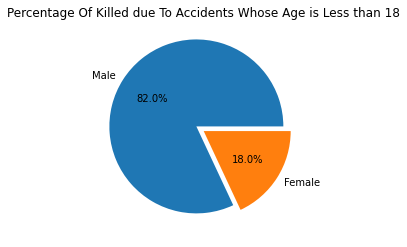

In [21]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[57:59]]
data_PersonAge.head(5)

# Calculating the means
mean_L18Male = (np.mean(
    data_PersonAge['Human Age and sex 18 Yrs - Killed - Male']))
mean_L18Female = (np.mean(data_PersonAge['18 Yrs - Killed - Female']))
print(mean_L18Male, mean_L18Female)

# Plotting a Pie Chart
sizes = [mean_L18Male, mean_L18Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents Whose Age is Less than 18")
plot.show()

#### **Extracting Killed Person Age (18 - 25 Yrs) and Gender Data**

19.61111111111111 3.75


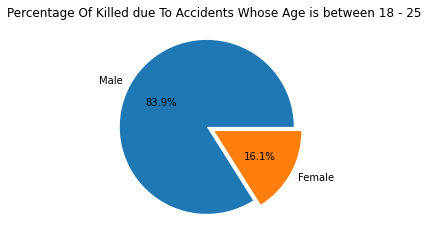

In [22]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[59:61]]
data_PersonAge.head(5)

# Calculating the means
mean_G18L25Male = (np.mean(data_PersonAge['18-25 Yrs - Killed - Male']))
mean_G18L25Female = (np.mean(data_PersonAge['18-25 Yrs - Killed - Female']))
print(mean_G18L25Male, mean_G18L25Female)

# Plotting a Pie Chart
sizes = [mean_G18L25Male, mean_G18L25Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Age is between 18 - 25")
plot.show()

#### **Extracting Killed Person Age (23 - 35 Yrs) and Gender Data**

18.333333333333332 2.2222222222222223


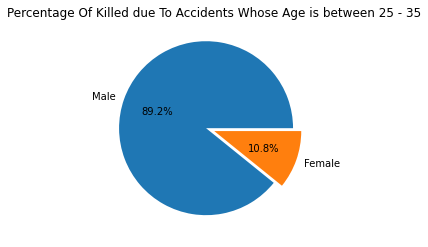

In [23]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[61:63]]
data_PersonAge.head(5)

# Calculating the means
mean_G25L35Male = (np.mean(data_PersonAge['25-35 Yrs - Killed - Male']))
mean_G25L35Female = (np.mean(data_PersonAge['25-35 Yrs - Killed - Female']))
print(mean_G25L35Male, mean_G25L35Female)

# Plotting a Pie Chart
sizes = [mean_G25L35Male, mean_G25L35Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Age is between 25 - 35")
plot.show()

#### **Extracting Killed Person Age (35 - 40 Yrs) and Gender Data**

15.25 1.6111111111111112


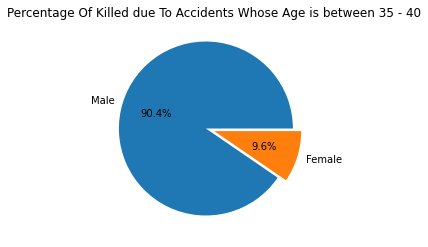

In [24]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[63:65]]
data_PersonAge.head(5)

# Calculating the mean
mean_G35L40Male = (np.mean(data_PersonAge['35-40 Yrs - Killed - Male']))
mean_G35L40Female = (np.mean(data_PersonAge['35-40 Yrs - Killed - Female']))
print(mean_G35L40Male, mean_G35L40Female)

# Plotting a Pie Chart
sizes = [mean_G35L40Male, mean_G35L40Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Age is between 35 - 40")
plot.show()

#### **Extracting Killed Person Age (45 - 60 Yrs) and Gender Data**

14.25 0.9166666666666666


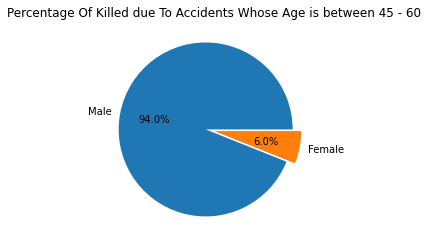

In [25]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[65:67]]
data_PersonAge.head(5)

# Calculating the means
mean_G45L60Male = (np.mean(data_PersonAge['45-60 Yrs - Killed - Male']))
mean_G45L60Female = (np.mean(data_PersonAge['45-60 Yrs - Killed - Female']))
print(mean_G45L60Male, mean_G45L60Female)

# Plotting a Pie Chart
sizes = [mean_G45L60Male, mean_G45L60Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Age is between 45 - 60")
plot.show()

#### **Extracting Killed Person Age (60 Yrs & Above) and Gender Data**

6.222222222222222 0.25


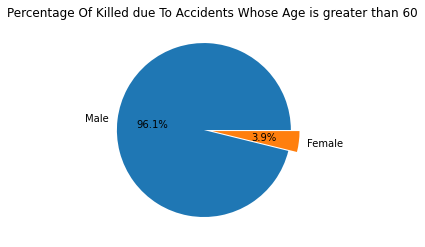

In [26]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[data.columns[67:69]]
data_PersonAge.head(5)

# Calculating the means
mean_G60Male = (np.mean(data_PersonAge['60 Yrs above - Killed - Male']))
mean_G60Female = (np.mean(data_PersonAge['60 Yrs above - Killed - Female']))
print(mean_G60Male, mean_G60Female)

# Plotting a Pie Chart
sizes = [mean_G60Male, mean_G60Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Age is greater than 60")
plot.show()

#### **Extracting Killed Person Age (Overall Male) and Gender Data**

12.5 19.61111111111111 18.333333333333332 15.25 14.25 6.222222222222222


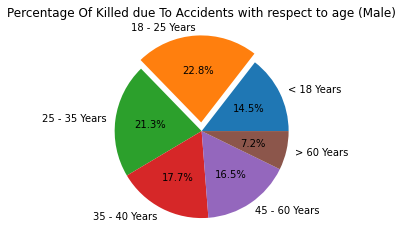

In [27]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[[
    'Human Age and sex 18 Yrs - Killed - Male', '18-25 Yrs - Killed - Male',
    '25-35 Yrs - Killed - Male', '35-40 Yrs - Killed - Male',
    '45-60 Yrs - Killed - Male', '60 Yrs above - Killed - Male'
]]
data_PersonAge.head(5)

# Calculating the means
mean_L18Male = (np.mean(
    data_PersonAge['Human Age and sex 18 Yrs - Killed - Male']))
mean_L25G18Male = (np.mean(data_PersonAge['18-25 Yrs - Killed - Male']))
mean_L35G25Male = (np.mean(data_PersonAge['25-35 Yrs - Killed - Male']))
mean_L40G35Male = (np.mean(data_PersonAge['35-40 Yrs - Killed - Male']))
mean_L60G45Male = (np.mean(data_PersonAge['45-60 Yrs - Killed - Male']))
mean_G60Male = (np.mean(data_PersonAge['60 Yrs above - Killed - Male']))
print(mean_L18Male, mean_L25G18Male, mean_L35G25Male, mean_L40G35Male,
      mean_L60G45Male, mean_G60Male)

# Plotting a Pie Chart
sizes = [
    mean_L18Male, mean_L25G18Male, mean_L35G25Male, mean_L40G35Male,
    mean_L60G45Male, mean_G60Male
]
labels = [
    '< 18 Years', '18 - 25 Years', '25 - 35 Years', '35 - 40 Years',
    '45 - 60 Years', '> 60 Years'
]
explode = (0, 0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents with respect to age (Male)")
plot.show()

#### **Extracting Killed Person Age (Overall Female) and Gender Data**

2.75 3.75 2.2222222222222223 1.6111111111111112 0.9166666666666666 0.25


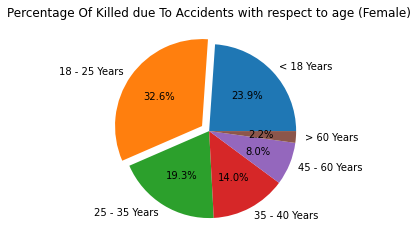

In [28]:
# Extracting Killed Person Age and Gender Data
data_PersonAge = data[[
    '18 Yrs - Killed - Female', '18-25 Yrs - Killed - Female',
    '25-35 Yrs - Killed - Female', '35-40 Yrs - Killed - Female',
    '45-60 Yrs - Killed - Female', '60 Yrs above - Killed - Female'
]]
data_PersonAge.head(5)

# Calculating the means
mean_L18Female = (np.mean(data_PersonAge['18 Yrs - Killed - Female']))
mean_L25G18Female = (np.mean(data_PersonAge['18-25 Yrs - Killed - Female']))
mean_L35G25Female = (np.mean(data_PersonAge['25-35 Yrs - Killed - Female']))
mean_L40G35Female = (np.mean(data_PersonAge['35-40 Yrs - Killed - Female']))
mean_L60G45Female = (np.mean(data_PersonAge['45-60 Yrs - Killed - Female']))
mean_G60Female = (np.mean(data_PersonAge['60 Yrs above - Killed - Female']))
print(mean_L18Female, mean_L25G18Female, mean_L35G25Female, mean_L40G35Female,
      mean_L60G45Female, mean_G60Female)

# Plotting a Pie Chart
sizes = [
    mean_L18Female, mean_L25G18Female, mean_L35G25Female, mean_L40G35Female,
    mean_L60G45Female, mean_G60Female
]
labels = [
    '< 18 Years', '18 - 25 Years', '25 - 35 Years', '35 - 40 Years',
    '45 - 60 Years', '> 60 Years'
]
explode = (0, 0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents with respect to age (Female)")
plot.show()

#### **Extracting Killed Person Age (Overall Male & Female) and Gender Data**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


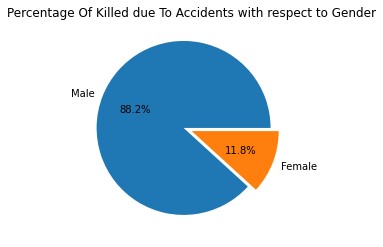

Text(0.5, 1.0, 'Total Killed With Respect To Male')

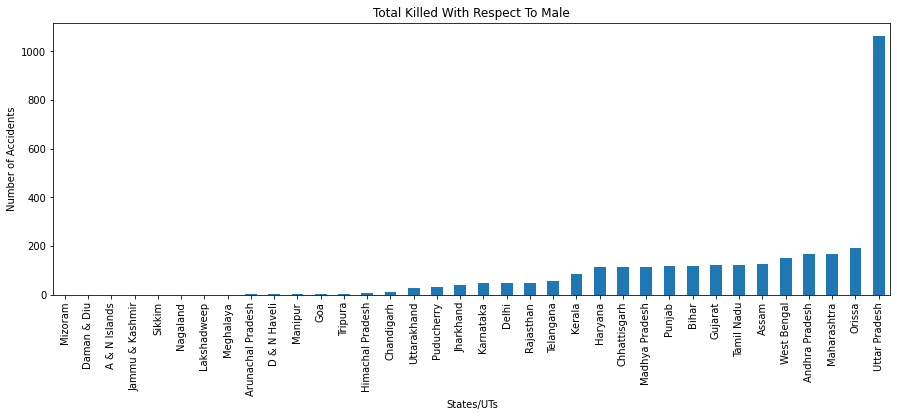

In [29]:
# Extracting male killed data
data_PersonAge['Total Killed (Male)'] = data[[
    'Human Age and sex 18 Yrs - Killed - Male', '18-25 Yrs - Killed - Male',
    '25-35 Yrs - Killed - Male', '35-40 Yrs - Killed - Male',
    '45-60 Yrs - Killed - Male', '60 Yrs above - Killed - Male'
]].sum(axis=1)
data_PersonAge['Total Killed (Female)'] = data[[
    '18 Yrs - Killed - Female', '18-25 Yrs - Killed - Female',
    '25-35 Yrs - Killed - Female', '35-40 Yrs - Killed - Female',
    '45-60 Yrs - Killed - Female', '60 Yrs above - Killed - Female'
]].sum(axis=1)

# Calculating means
mean_Male = (np.mean(data_PersonAge['Total Killed (Male)']))
mean_Female = (np.mean(data_PersonAge['Total Killed (Female)']))

# Plotting a Pie Chart
sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents with respect to Gender")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Gender (Male) In Increasing Order
sorted_PersonAgeTotalAccidentsMale = data_PersonAge.sort_values(
    'Total Killed (Male)')
sorted_PersonAgeTotalAccidentsMale['Total Killed (Male)'].plot.bar(figsize=(15,
                                                                            5))
plot.ylabel('Number of Accidents')
plot.title("Total Killed With Respect To Male")

#### **Plotting the Total Number Of Accidents With Respect To Gender (Female) In Increasing Order**

Text(0.5, 1.0, 'Total Killed With Respect To Female')

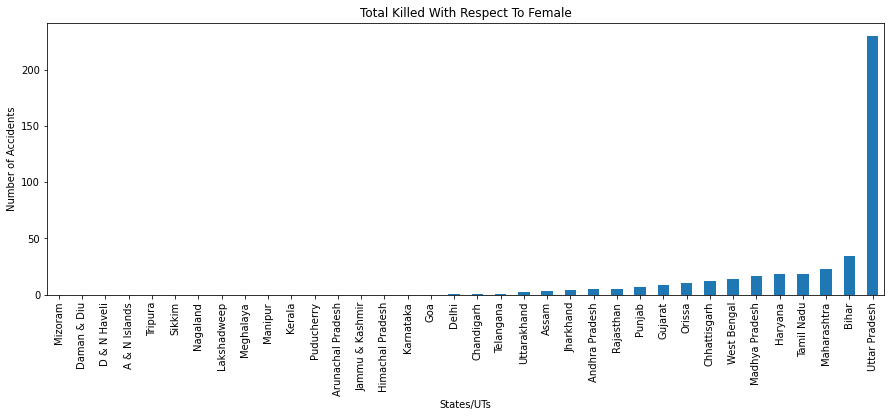

In [30]:
# Plotting the Total Number Of Accidents With Respect To Gender (Female) In Increasing Order
sorted_PersonAgeTotalAccidentsFemale = data_PersonAge.sort_values(
    'Total Killed (Female)')
sorted_PersonAgeTotalAccidentsFemale['Total Killed (Female)'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Killed With Respect To Female")

#### **Extracting Residential Area Data**

692.0277777777778 770.8055555555555 1364.5555555555557 2135.3611111111113


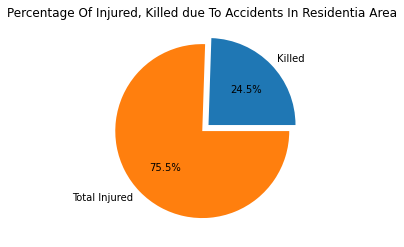

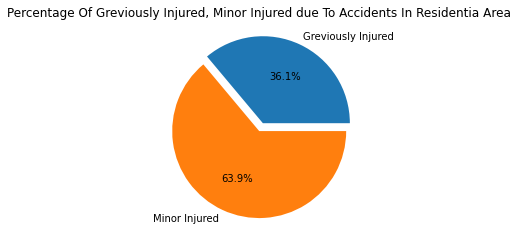

Text(0.5, 1.0, 'Total Accidents In Residentia Area')

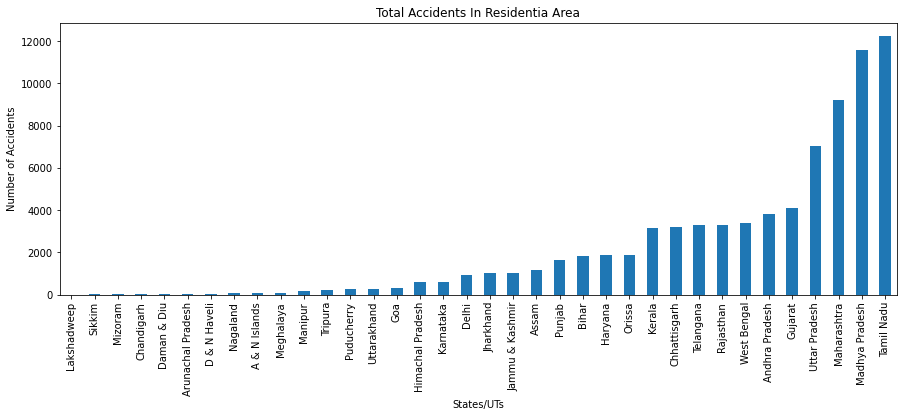

In [31]:
# Extracting Residential Area Data

data_ResidentialArea = data[data.columns[81:86]]
data_ResidentialArea.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_ResidentialArea['Residential Area - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_ResidentialArea[
    'Residential Area - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_ResidentialArea['Residential Area - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_ResidentialArea['Residential Area - Persons Injured - Total Injured'])
                     )
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Injured, Killed due To Accidents In Residentia Area")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents In Residentia Area"
)
plot.show()

# Plotting the Total Number Of Accidents Occured In Residentia Area In Increasing Order

sorted_ResidentialAreaTotalAccidents = data_ResidentialArea.sort_values(
    'Area Residential Area - Total Accidents')
sorted_ResidentialAreaTotalAccidents[
    'Area Residential Area - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents In Residentia Area")

#### **Extracting Institutional Area Data**

254.0 335.1388888888889 455.80555555555554 790.9444444444445


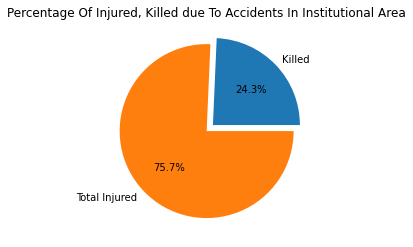

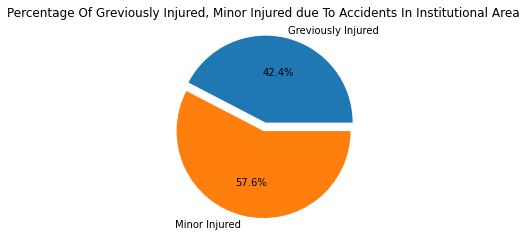

Text(0.5, 1.0, 'Total Accidents In Institutional Area')

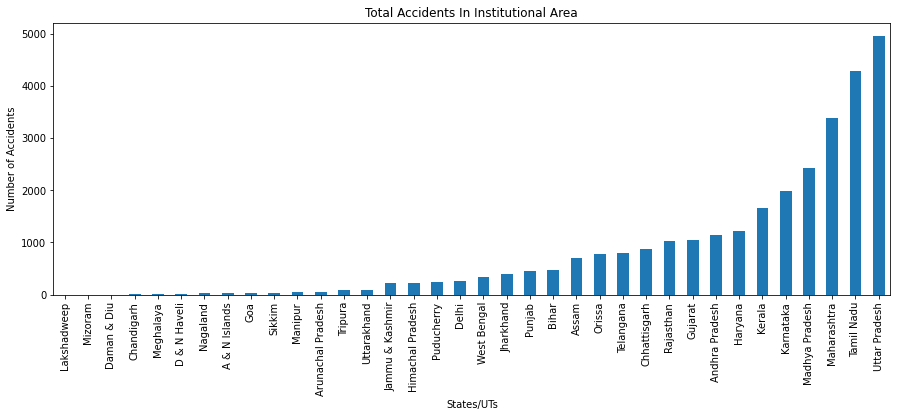

In [32]:
# Extracting Institutional Area Data

data_InstitutionalArea = data[data.columns[86:91]]
data_InstitutionalArea.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_InstitutionalArea['Institutional Area - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_InstitutionalArea[
    'Institutional Area - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_InstitutionalArea[
    'Institutional Area - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_InstitutionalArea[
    'Institutional Area - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents In Institutional Area")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents In Institutional Area"
)
plot.show()

# Plotting the Total Number Of Accidents Occured In Institutional Area In Increasing Order

sorted_InstitutionalAreaTotalAccidents = data_InstitutionalArea.sort_values(
    'Institutional Area - Total Accidents')
sorted_InstitutionalAreaTotalAccidents[
    'Institutional Area - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents In Institutional Area")

#### **Extracting Market/Commercial Area Data**

512.7777777777778 683.6388888888889 1000.2777777777778 1683.9166666666667


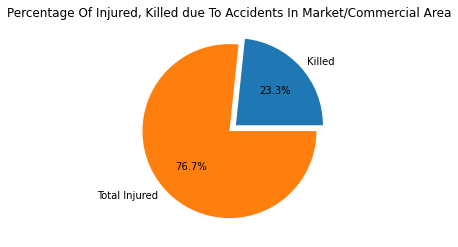

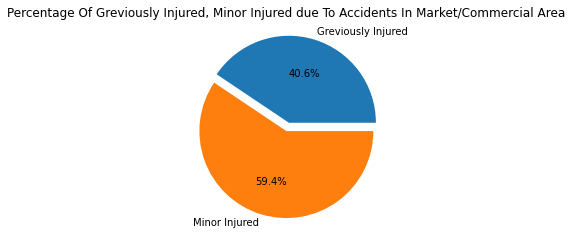

Text(0.5, 1.0, 'Total Accidents In Market/Commercial Area')

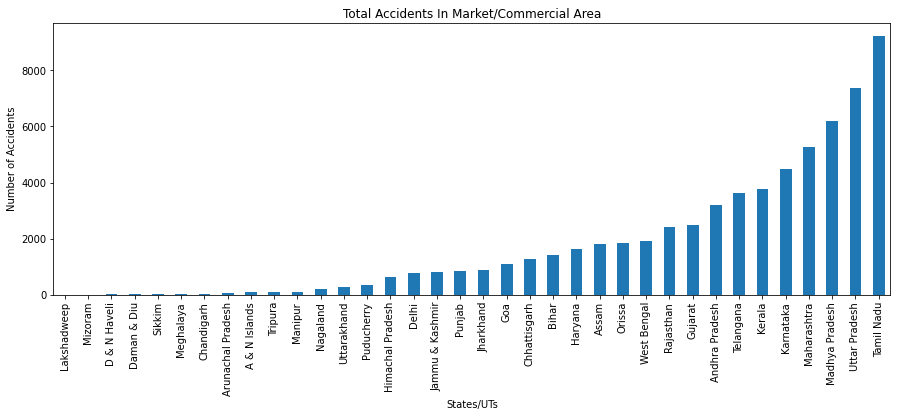

In [33]:
# Extracting Market/Commercial Area Data

data_MarketCommercialArea = data[data.columns[91:96]]
data_MarketCommercialArea.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_MarketCommercialArea['Market/Commercial Area - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_MarketCommercialArea[
    'Market/Commercial Area - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_MarketCommercialArea[
    'Market/Commercial Area - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_MarketCommercialArea[
    'Market/Commercial Area - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents In Market/Commercial Area")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents In Market/Commercial Area"
)
plot.show()

# Plotting the Total Number Of Accidents Occured In Market/Commercial Area In Increasing Order

sorted_MarketCommercialAreaTotalAccidents = data_MarketCommercialArea.sort_values(
    'Market/Commercial Area - Total Accidents')
sorted_MarketCommercialAreaTotalAccidents[
    'Market/Commercial Area - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents In Market/Commercial Area")

#### **Extracting Area Data (Overall)**

692.0277777777778 254.0 512.7777777777778


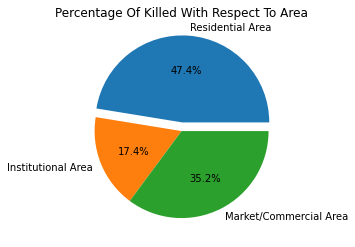

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Area')

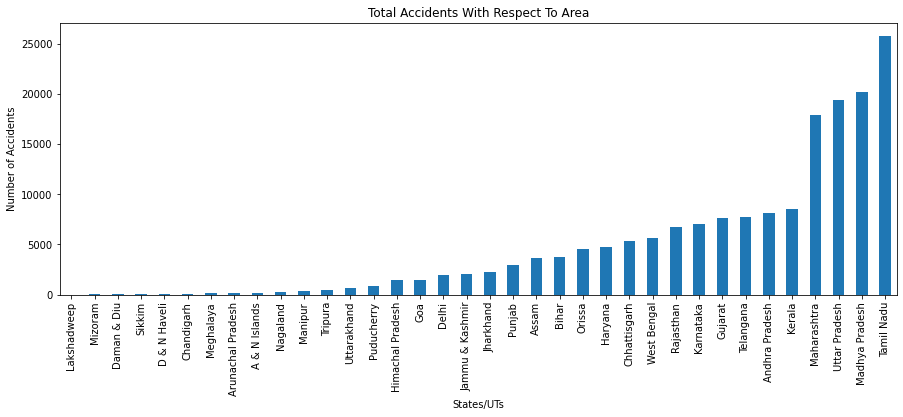

In [34]:
# Extracting Area Data

data_Area = data[[
    'Residential Area - Persons Killed', 'Institutional Area - Persons Killed',
    'Market/Commercial Area - Persons Killed'
]]
data_Area.head(5)

# Calculating the means

mean_ResidentialArea = (np.mean(
    data_Area['Residential Area - Persons Killed']))
mean_InstitutionaArea = (np.mean(
    data_Area['Institutional Area - Persons Killed']))
mean_MarketCommercialArea = (np.mean(
    data_Area['Market/Commercial Area - Persons Killed']))
print(mean_ResidentialArea, mean_InstitutionaArea, mean_MarketCommercialArea)

# Plotting a Pie Chart

sizes = [
    mean_ResidentialArea, mean_InstitutionaArea, mean_MarketCommercialArea
]
labels = ['Residential Area', 'Institutional Area', 'Market/Commercial Area']
explode = (0.1, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Area")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Area In Increasing Order

data_Area['Total Accidents'] = data[[
    'Area Residential Area - Total Accidents',
    'Institutional Area - Total Accidents',
    'Market/Commercial Area - Total Accidents'
]].sum(axis=1)
sorted_AreaTotalAccidents = data_Area.sort_values('Total Accidents')
sorted_AreaTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Area")

#### **Extracting Urban Data**

1427.1944444444443 1934.5 2976.1944444444443 4910.694444444444


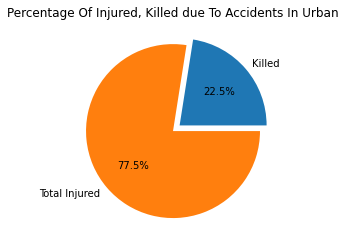

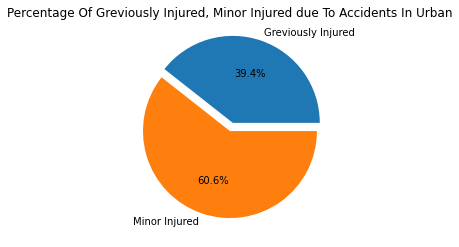

Text(0.5, 1.0, 'Total Accidents In Urban')

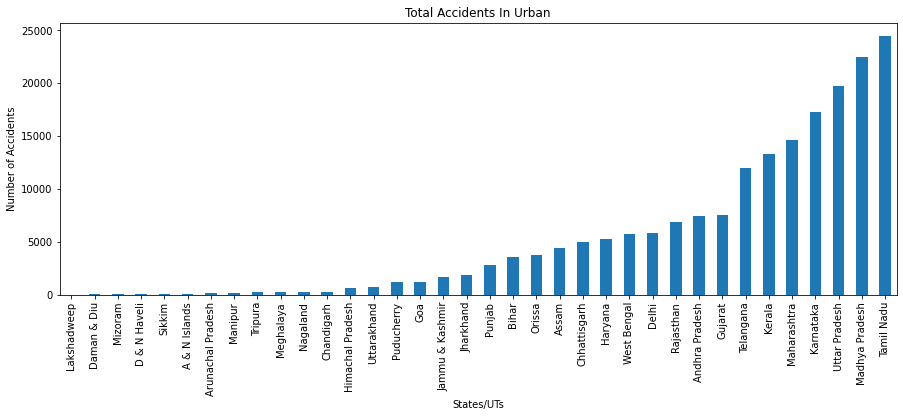

In [35]:
# Extracting Urban Data

data_Urban = data[data.columns[98:103]]
data_Urban.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Urban['Urban - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Urban['Urban - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Urban['Urban - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Urban['Urban - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Injured, Killed due To Accidents In Urban")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents In Urban"
)
plot.show()

# Plotting the Total Number Of Accidents Occured In Urban In Increasing Order

sorted_UrbanTotalAccidents = data_Urban.sort_values('Urban - Total Accidents')
sorted_UrbanTotalAccidents['Urban - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents In Urban")

#### **Extracting Rural Data**

2778.8333333333335 3027.75 5100.944444444444 8128.694444444444


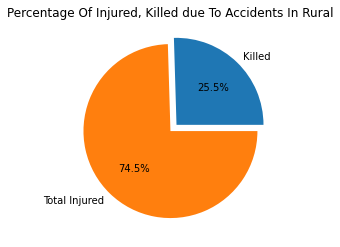

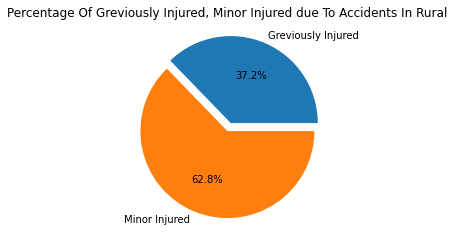

Text(0.5, 1.0, 'Total Accidents In Rural')

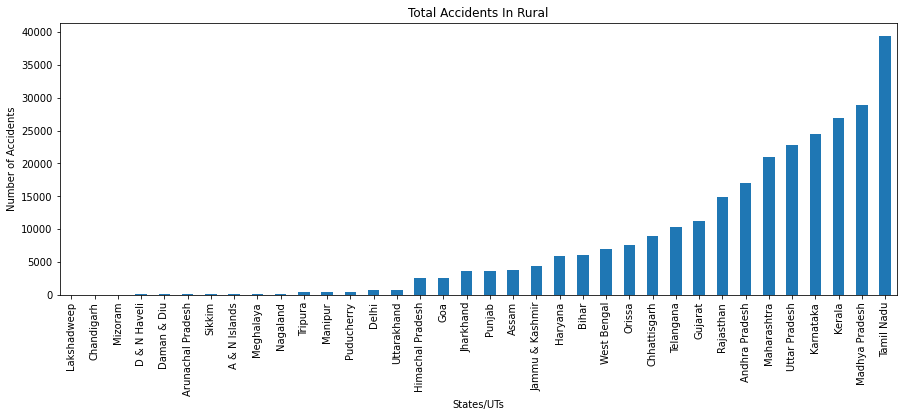

In [36]:
# Extracting Rural Data

data_Rural = data[data.columns[103:108]]
data_Rural.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Rural['Rural - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Rural['Rural - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Rural['Rural - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Rural['Rural - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Injured, Killed due To Accidents In Rural")
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents In Rural"
)
plot.show()

# Plotting the Total Number Of Accidents Occured In Rural In Increasing Order

sorted_RuralTotalAccidents = data_Rural.sort_values('Rural - Total Accidents')
sorted_RuralTotalAccidents['Rural - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents In Rural")

#### **Extracting Area Data (Rural & Urban)**

1427.1944444444443 2778.8333333333335


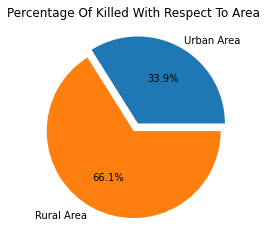

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Area')

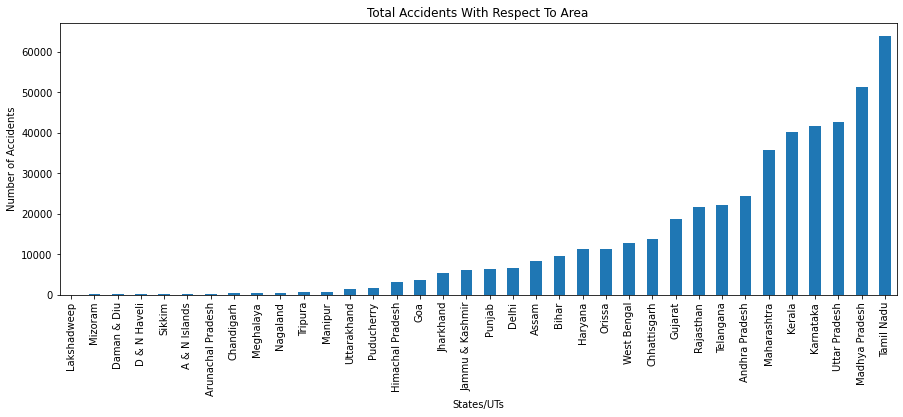

In [37]:
# Extracting Area Data

data_Area = data[['Urban - Persons Killed', 'Rural - Persons Killed']]
data_Area.head(5)

# Calculating the means

mean_UrbanArea = (np.mean(data_Area['Urban - Persons Killed']))
mean_RuralArea = (np.mean(data_Area['Rural - Persons Killed']))
print(mean_UrbanArea, mean_RuralArea)

# Plotting a Pie Chart

sizes = [mean_UrbanArea, mean_RuralArea]
labels = ['Urban Area', 'Rural Area']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Area")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Area In Increasing Order

data_Area['Total Accidents'] = data[[
    'Urban - Total Accidents', 'Rural - Total Accidents'
]].sum(axis=1)
sorted_AreaTotalAccidents = data_Area.sort_values('Total Accidents')
sorted_AreaTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Area")

#### **Extracting Load Of Vehicle Data (Normally Loaded)**

2335.0833333333335 8100.388888888889


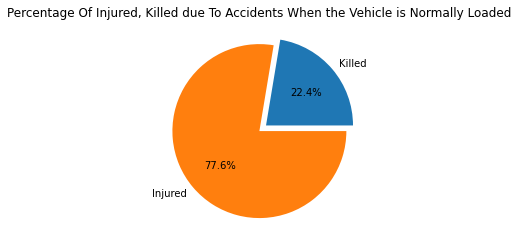

Text(0.5, 1.0, 'Total Accidents When Vehicle Is Normally Loaded')

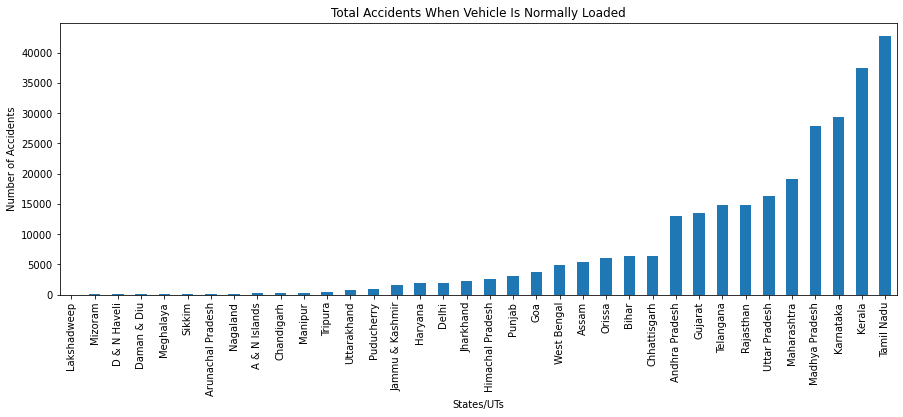

In [38]:
# Extracting Load Of Vehicle Data

data_NormalLoad = data[data.columns[113:116]]
data_NormalLoad.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_NormalLoad['Normally Loaded - No. of Persons - Killed']))
mean_Injured = (np.mean(
    data_NormalLoad['Normally Loaded - No. of Persons - Injured']))
print(mean_Killed, mean_Injured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_Injured]
labels = ['Killed', 'Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When the Vehicle is Normally Loaded"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When Vehicle Is Normally Loaded In Increasing Order

sorted_NormalLoadTotalAccidents = data_NormalLoad.sort_values(
    'Load of vehicle Normally Loaded - No. of Accidents')
sorted_NormalLoadTotalAccidents[
    'Load of vehicle Normally Loaded - No. of Accidents'].plot.bar(figsize=(15,
                                                                            5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents When Vehicle Is Normally Loaded")

#### **Extracting Load Of Vehicle Data (Overloaded / Hanging)**

499.47222222222223 1342.861111111111


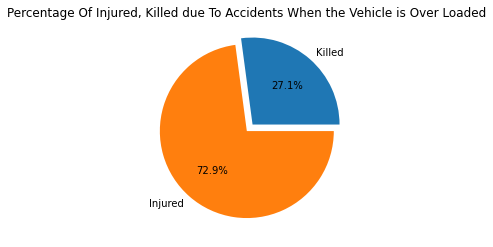

Text(0.5, 1.0, 'Total Accidents When Vehicle Is Over Loaded')

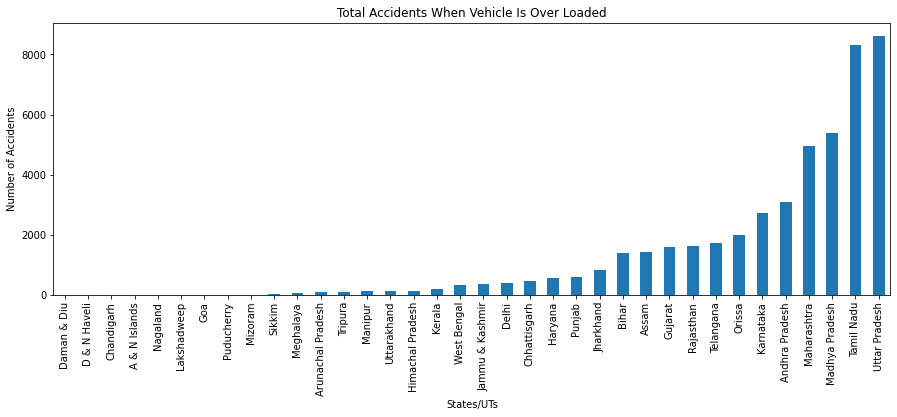

In [39]:
# Extracting Load Of Vehicle Data

data_OverLoad = data[data.columns[116:119]]
data_OverLoad.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_OverLoad['Overloaded/Hangin - No. of Persons - Killed']))
mean_Injured = (np.mean(
    data_OverLoad['Overloaded/Hangin - No. of Persons - Injured']))
print(mean_Killed, mean_Injured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_Injured]
labels = ['Killed', 'Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents When the Vehicle is Over Loaded"
)
plot.show()

# Plotting the Total Number Of Accidents Occured When Vehicle Is Over Loaded In Increasing Order

sorted_OverLoadTotalAccidents = data_OverLoad.sort_values(
    'Overloaded/Hangin - No. of Accidents')
sorted_OverLoadTotalAccidents['Overloaded/Hangin - No. of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents When Vehicle Is Over Loaded")

#### **Extracting Load Of Vehicle Data (Normally Loaded & Overloaded / Hanging)**

2335.0833333333335 499.47222222222223


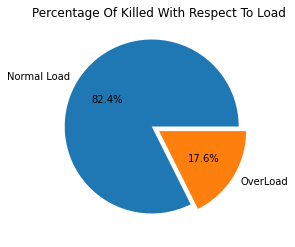

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Load')

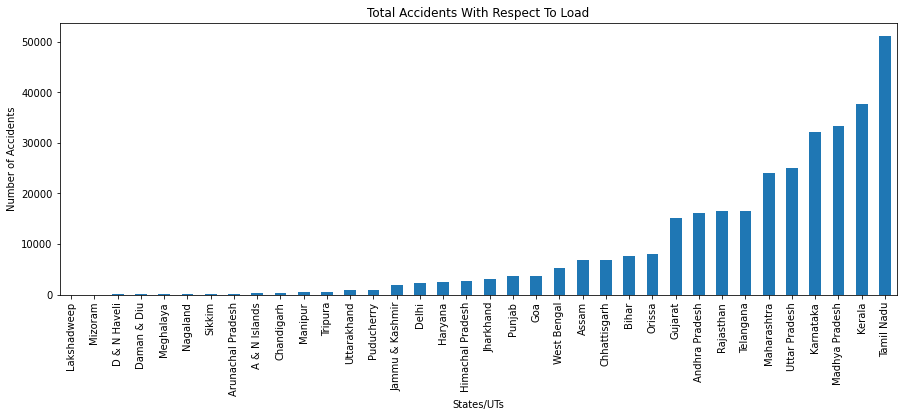

In [40]:
# Extracting Load Of Vehicles Data

data_Load = data[[
    'Normally Loaded - No. of Persons - Killed',
    'Overloaded/Hangin - No. of Persons - Killed'
]]
data_Load.head(5)

# Calculating the means

mean_NormalLoad = (np.mean(
    data_Load['Normally Loaded - No. of Persons - Killed']))
mean_OverLoad = (np.mean(
    data_Load['Overloaded/Hangin - No. of Persons - Killed']))
print(mean_NormalLoad, mean_OverLoad)

# Plotting a Pie Chart

sizes = [mean_NormalLoad, mean_OverLoad]
labels = ['Normal Load', 'OverLoad']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Load")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Load In Increasing Order

data_Load['Total Accidents'] = data[[
    'Load of vehicle Normally Loaded - No. of Accidents',
    'Overloaded/Hangin - No. of Accidents'
]].sum(axis=1)
sorted_LoadTotalAccidents = data_Load.sort_values('Total Accidents')
sorted_LoadTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Load")

#### **Extracting Violating Traffic Rules Data (Over - Speeding)**

2710.777777777778 3020.75 5768.722222222223 8789.472222222223


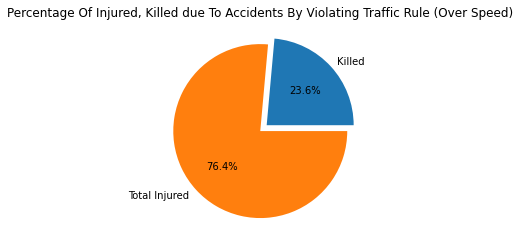

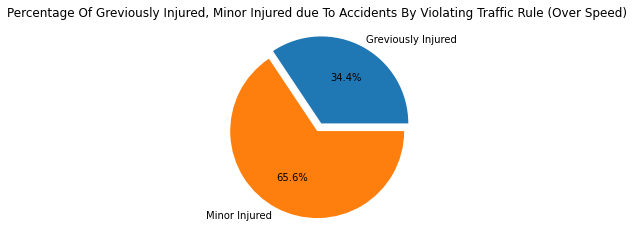

Text(0.5, 1.0, 'Total Accidents By Violating Traffic Rule (Over Speed)')

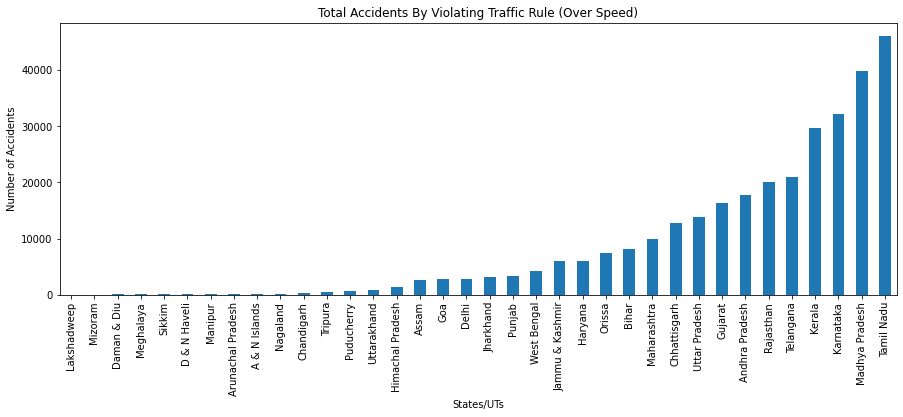

In [41]:
# Extracting Violating Traffic Rules Data

data_OverSpeed = data[data.columns[122:129]]
data_OverSpeed.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_OverSpeed['Over-Speeding - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(
    data_OverSpeed['Over-Speeding - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_OverSpeed['Over-Speeding - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_OverSpeed['Over-Speeding - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents By Violating Traffic Rule (Over Speed)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents By Violating Traffic Rule (Over Speed)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured By Violating Traffic Rule (Over Speed) In Increasing Order

sorted_OverSpeedTotalAccidents = data_OverSpeed.sort_values(
    'Traffic rules Over-Speeding - Number of - Number')
sorted_OverSpeedTotalAccidents[
    'Traffic rules Over-Speeding - Number of - Number'].plot.bar(figsize=(15,
                                                                          5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents By Violating Traffic Rule (Over Speed)")

#### **Extracting Violating Traffic Rules Data (Drunken Driving)**

116.33333333333333 118.61111111111111 157.61111111111111 276.22222222222223


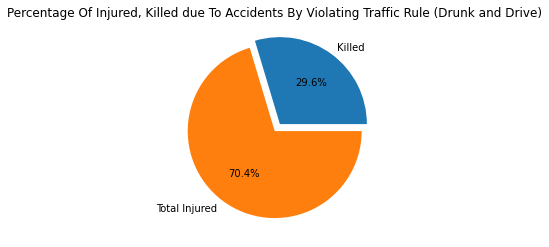

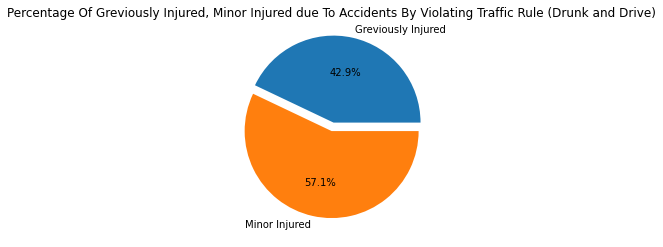

Text(0.5, 1.0, 'Total Accidents By Violating Traffic Rule (Drunk and Drive)')

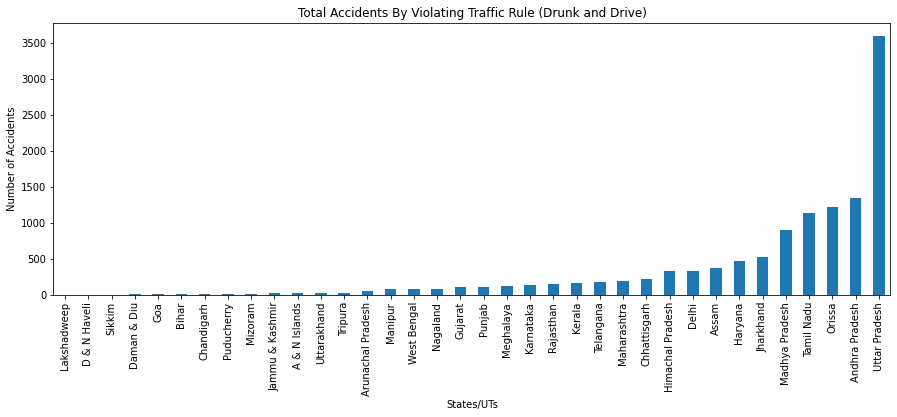

In [42]:
# Extracting Violating Traffic Rules Data

data_DrunkAndDrive = data[data.columns[129:134]]
data_DrunkAndDrive.head(5)

# Calculating the means

mean_Killed = (np.mean(data_DrunkAndDrive[
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_DrunkAndDrive[
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Injured - Greviously Injured']
                                  ))
mean_MinorInjured = (np.mean(data_DrunkAndDrive[
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Injured - Minor Injury']
                             ))
mean_TotalInjured = (np.mean(data_DrunkAndDrive[
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Injured - Total Injured']
                             ))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents By Violating Traffic Rule (Drunk and Drive)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents By Violating Traffic Rule (Drunk and Drive)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured By Violating Traffic Rule (Drunk and Drive) In Increasing Order

sorted_DrunkAndDriveTotalAccidents = data_DrunkAndDrive.sort_values(
    'Drunken Driving/Consumption of Alcohol & Drug - Number of Accidents')
sorted_DrunkAndDriveTotalAccidents[
    'Drunken Driving/Consumption of Alcohol & Drug - Number of Accidents'].plot.bar(
        figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents By Violating Traffic Rule (Drunk and Drive)")

#### **Extracting Violating Traffic Rules Data (Driving Wrong Side)**

243.44444444444446 294.44444444444446 375.0 669.4444444444445


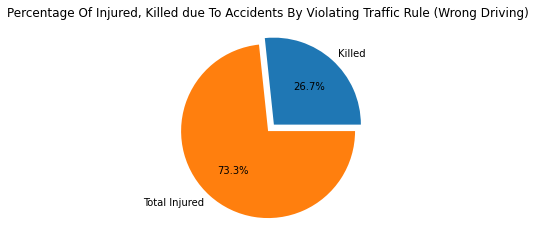

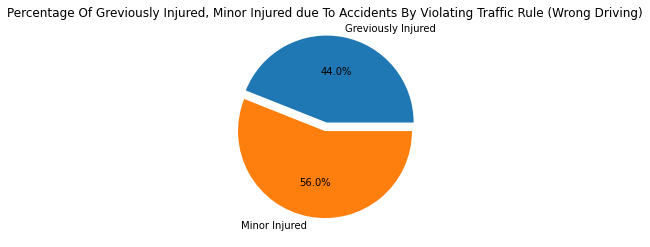

Text(0.5, 1.0, 'Total Accidents By Violating Traffic Rule (Wrong Driving)')

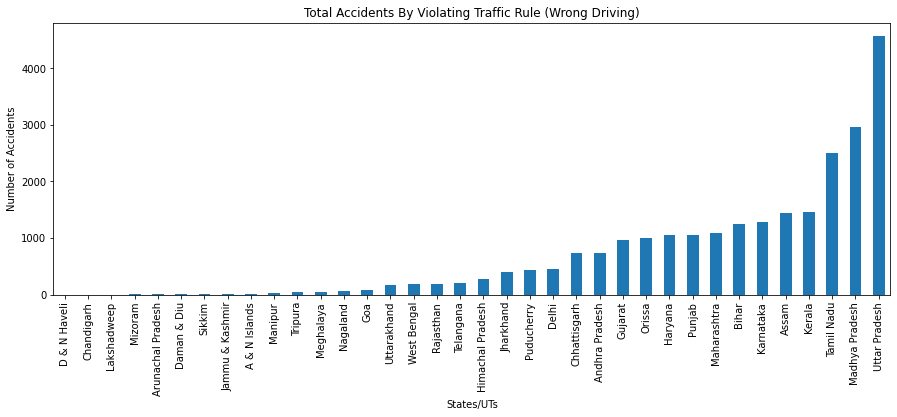

In [43]:
# Extracting Violating Traffic Rules Data

data_WrongDriving = data[data.columns[134:139]]
data_WrongDriving.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_WrongDriving['Driving on Wrong Side - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_WrongDriving[
    'Driving on Wrong Side - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_WrongDriving['Driving on Wrong Side - Persons Injured - Minor Injury']
))
mean_TotalInjured = (np.mean(data_WrongDriving[
    'Driving on Wrong Side - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents By Violating Traffic Rule (Wrong Driving)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents By Violating Traffic Rule (Wrong Driving)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured By Violating Traffic Rule (Wrong Driving) In Increasing Order

sorted_WrongDrivingTotalAccidents = data_WrongDriving.sort_values(
    'Driving on Wrong Side - Number of Accidents')
sorted_WrongDrivingTotalAccidents[
    'Driving on Wrong Side - Number of Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents By Violating Traffic Rule (Wrong Driving)")

#### **Extracting Violating Traffic Rules Data (Jumping Red Light)**

42.916666666666664 42.52777777777778 72.08333333333333 114.61111111111111


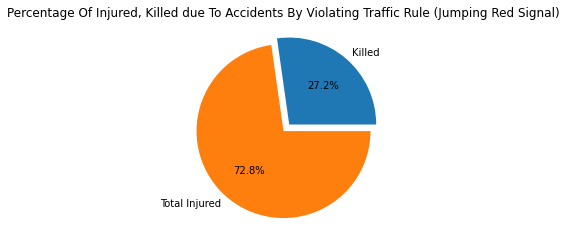

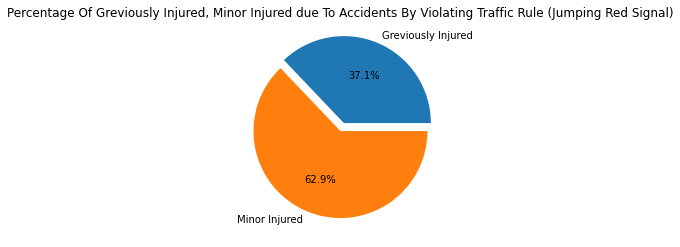

Text(0.5, 1.0, 'Total Accidents By Violating Traffic Rule (Jumping Red Signal)')

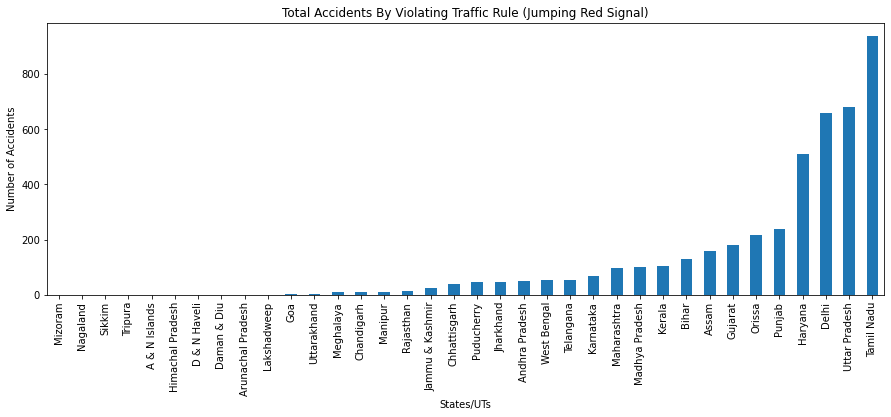

In [44]:
# Extracting Violating Traffic Rules Data

data_JumpingRedSignal = data[data.columns[139:144]]
data_JumpingRedSignal.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_JumpingRedSignal['Jumping Red Light - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_JumpingRedSignal[
    'Jumping Red Light - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_JumpingRedSignal['Jumping Red Light - Persons Injured - Minor Injury']
))
mean_TotalInjured = (np.mean(data_JumpingRedSignal[
    'Jumping Red Light - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents By Violating Traffic Rule (Jumping Red Signal)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents By Violating Traffic Rule (Jumping Red Signal)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured By Violating Traffic Rule (Jumping Red Signal) In Increasing Order

sorted_JumpingRedSignalTotalAccidents = data_JumpingRedSignal.sort_values(
    'Jumping Red Light - Number of Accidents')
sorted_JumpingRedSignalTotalAccidents[
    'Jumping Red Light - Number of Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents By Violating Traffic Rule (Jumping Red Signal)")

#### **Extracting Violating Traffic Rules Data (Overspeeding, Drunken Driving, Driving Wrong Side, Jumping Red Light, Use of Mobile Phone)**

2710.777777777778 116.33333333333333 243.44444444444446 42.916666666666664 102.97222222222223


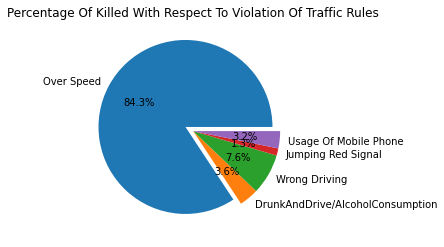

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Violation Of Traffic Rules')

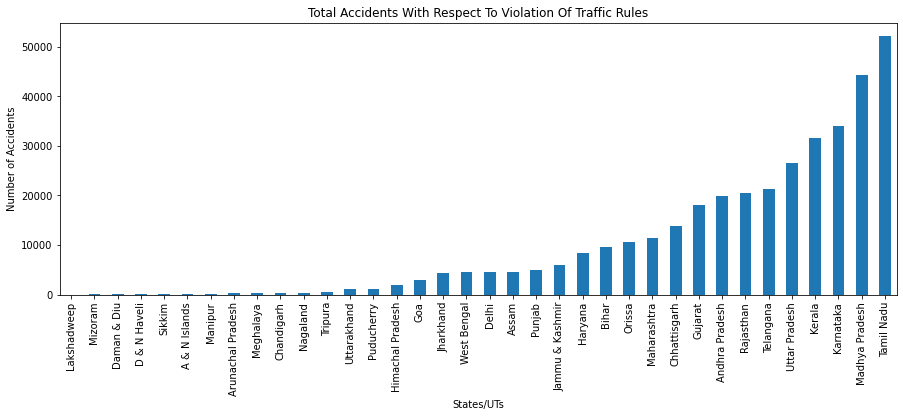

In [45]:
# Extracting Violating Traffic Rules Data

data_TrafficRule = data[[
    'Over-Speeding - Persons Killed - Number',
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Killed',
    'Driving on Wrong Side - Persons Killed',
    'Jumping Red Light - Persons Killed',
    'Use of Mobile Phone - Persons Killed'
]]
data_TrafficRule.head(5)

# Calculating the means

mean_OverSpeed = (np.mean(
    data_TrafficRule['Over-Speeding - Persons Killed - Number']))
mean_DrunkAndDrive_AlcoholConsumption = (np.mean(data_TrafficRule[
    'Drunken Driving/Consumption of Alcohol & Drug - Persons Killed']))
mean_WrongDriving = (np.mean(
    data_TrafficRule['Driving on Wrong Side - Persons Killed']))
mean_JumpingRedSignal = (np.mean(
    data_TrafficRule['Jumping Red Light - Persons Killed']))
mean_UsageOfMobilePhone = (np.mean(
    data_TrafficRule['Use of Mobile Phone - Persons Killed']))
print(mean_OverSpeed, mean_DrunkAndDrive_AlcoholConsumption, mean_WrongDriving,
      mean_JumpingRedSignal, mean_UsageOfMobilePhone)

# Plotting a Pie Chart

sizes = [
    mean_OverSpeed, mean_DrunkAndDrive_AlcoholConsumption, mean_WrongDriving,
    mean_JumpingRedSignal, mean_UsageOfMobilePhone
]
labels = [
    'Over Speed', 'DrunkAndDrive/AlcoholConsumption', 'Wrong Driving',
    'Jumping Red Signal', 'Usage Of Mobile Phone'
]
explode = (0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Violation Of Traffic Rules")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Violation Of Traffic Rules In Increasing Order

data_TrafficRule['Total Accidents'] = data[[
    'Traffic rules Over-Speeding - Number of - Number',
    'Drunken Driving/Consumption of Alcohol & Drug - Number of Accidents',
    'Driving on Wrong Side - Number of Accidents',
    'Jumping Red Light - Number of Accidents',
    'Use of Mobile Phone - Number of Accidents'
]].sum(axis=1)
sorted_TrafficRuleTotalAccidents = data_TrafficRule.sort_values(
    'Total Accidents')
sorted_TrafficRuleTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Violation Of Traffic Rules")

#### **Extracting Weather Data (Sunny / Clear)**

2913.4166666666665 3582.1111111111113 6323.277777777777 9905.388888888889


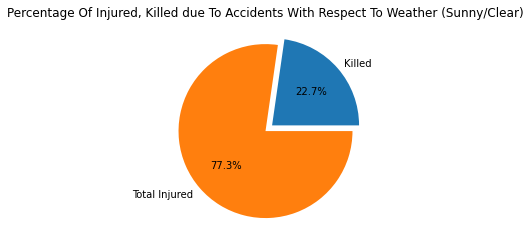

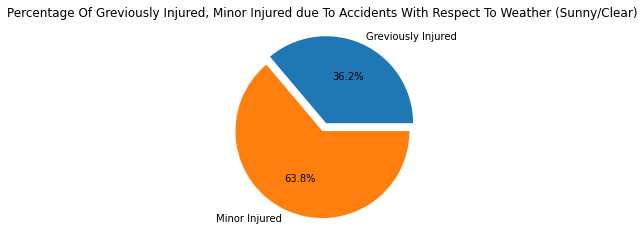

Text(0.5, 1.0, 'Total Accidents With Respect To Weather (Sunny/Clear)')

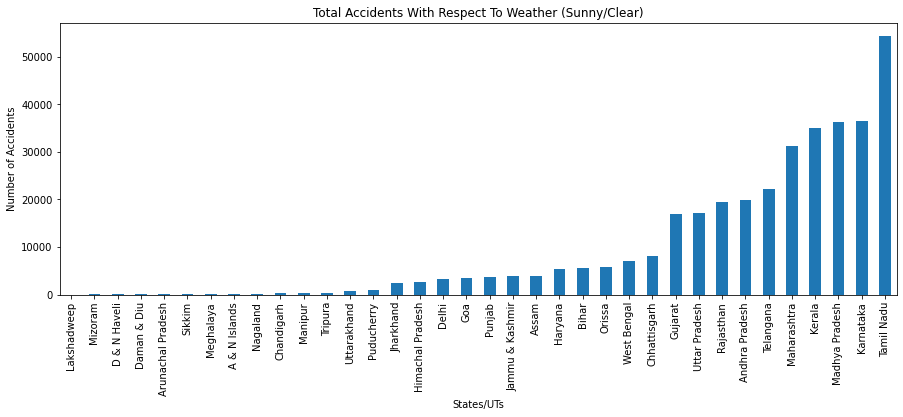

In [46]:
# Extracting Weather Data

data_Sunny = data[data.columns[146:153]]
data_Sunny.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Sunny['Sunny/Clear - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(
    data_Sunny['Sunny/Clear - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Sunny['Sunny/Clear - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Sunny['Sunny/Clear - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Weather (Sunny/Clear)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Weather (Sunny/Clear)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Weather (Sunny/Clear) In Increasing Order

sorted_SunnyTotalAccidents = data_Sunny.sort_values(
    'Weather Sunny/Clear - Total Accidents - Number')
sorted_SunnyTotalAccidents[
    'Weather Sunny/Clear - Total Accidents - Number'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Weather (Sunny/Clear)")

#### **Extracting Weather Data (Rainy)**

405.27777777777777 539.2777777777778 711.0 1250.2777777777778


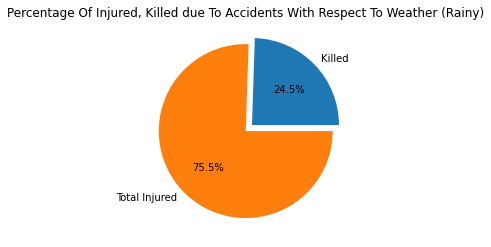

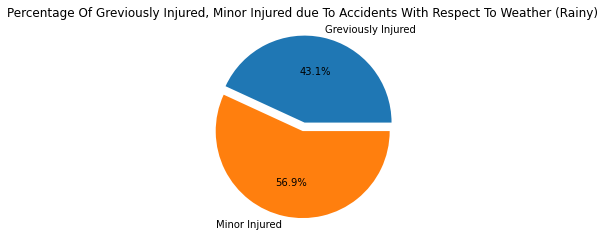

Text(0.5, 1.0, 'Total Accidents With Respect To Weather (Rainy)')

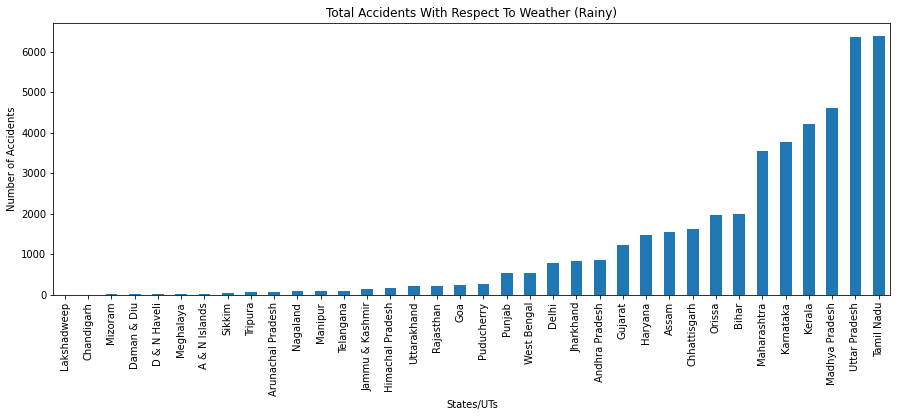

In [47]:
# Extracting Weather Data

data_Rainy = data[data.columns[153:158]]
data_Rainy.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Rainy['Rainy - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Rainy['Rainy - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Rainy['Rainy - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Rainy['Rainy - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Weather (Rainy)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Weather (Rainy)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Weather (Rainy) In Increasing Order

sorted_RainyTotalAccidents = data_Rainy.sort_values('Rainy - Total Accidents')
sorted_RainyTotalAccidents['Rainy - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Weather (Rainy)")

#### **Extracting Weather Data (Foggy & Misty)**

328.9166666666667 331.6111111111111 370.19444444444446 701.8055555555555


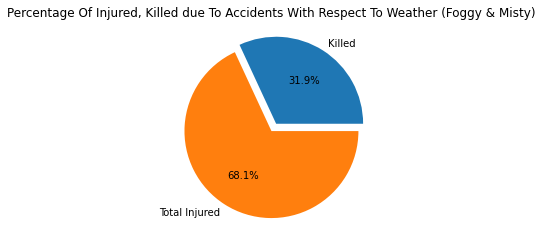

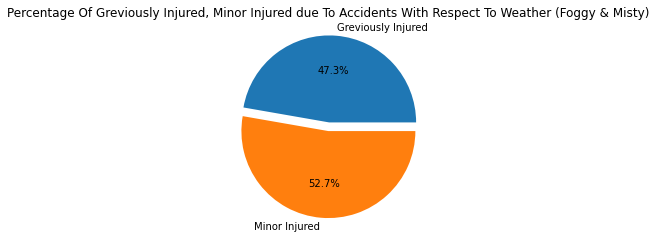

Text(0.5, 1.0, 'Total Accidents With Respect To Weather (Foggy & Misty)')

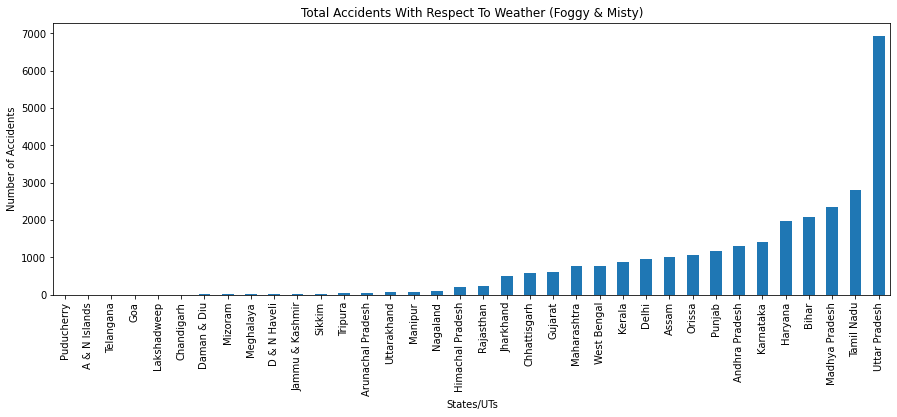

In [48]:
# Extracting Weather Data

data_FoggyMisty = data[data.columns[158:163]]
data_FoggyMisty.head(5)

# Calculating the means

mean_Killed = (np.mean(data_FoggyMisty['Foggy & Misty - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_FoggyMisty['Foggy & Misty - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_FoggyMisty['Foggy & Misty - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_FoggyMisty['Foggy & Misty - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Weather (Foggy & Misty)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Weather (Foggy & Misty)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Weather (Foogy and Misty) In Increasing Order

sorted_FoggyMistyTotalAccidents = data_FoggyMisty.sort_values(
    'Foggy & Misty - Total Accidents')
sorted_FoggyMistyTotalAccidents['Foggy & Misty - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Weather (Foggy & Misty)")

#### **Extracting Weather Data (Hail / Sleet)**

58.97222222222222 52.638888888888886 60.69444444444444 113.33333333333333


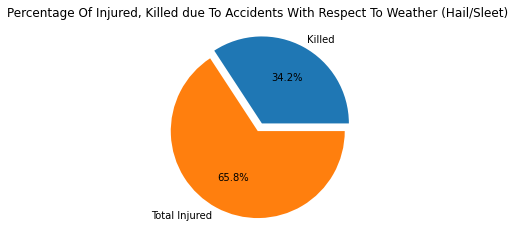

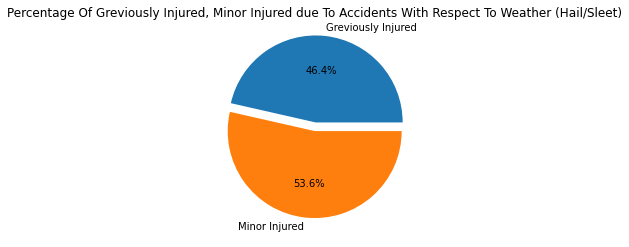

Text(0.5, 1.0, 'Total Accidents With Respect To Weather (Hail/Sleet)')

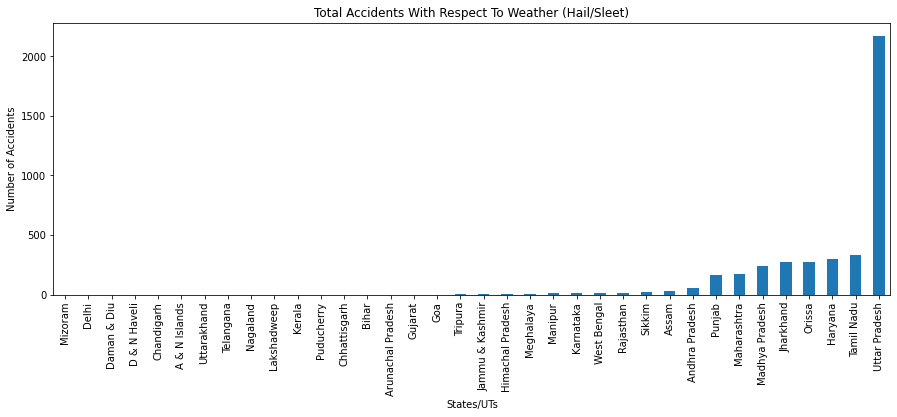

In [49]:
# Extracting Weather Data

data_Hail = data[data.columns[163:168]]
data_Hail.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Hail['Hail/Sleet - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Hail['Hail/Sleet - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Hail['Hail/Sleet - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Hail['Hail/Sleet - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Weather (Hail/Sleet)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Weather (Hail/Sleet)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Weather (Hail Or Sleet) In Increasing Order

sorted_HailTotalAccidents = data_Hail.sort_values(
    'Hail/Sleet - Total Accidents')
sorted_HailTotalAccidents['Hail/Sleet - Total Accidents'].plot.bar(figsize=(15,
                                                                            5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Weather (Hail/Sleet)")

#### **Extracting Weather Data (Overall)**

2913.4166666666665 116.33333333333333 243.44444444444446 42.916666666666664 102.97222222222223


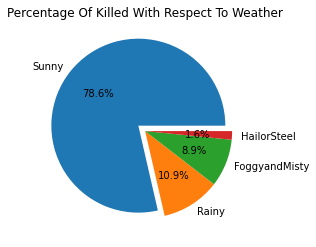

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Weather')

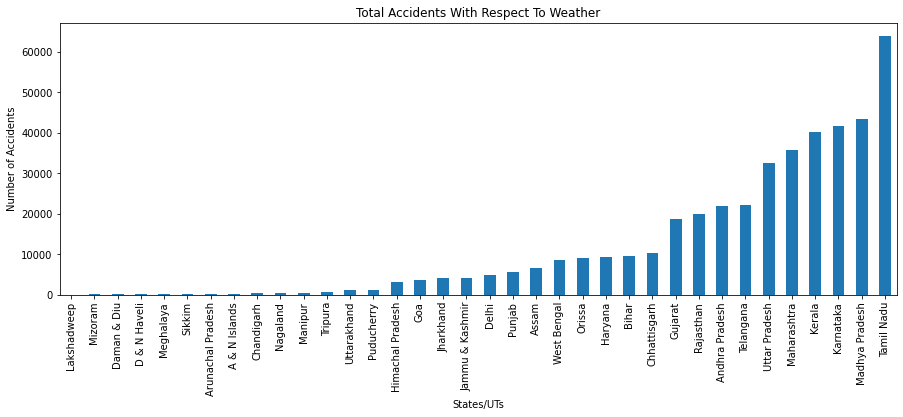

In [50]:
# Extracting Weather Data

data_Weather = data[[
    'Sunny/Clear - Persons Killed - Number', 'Rainy - Persons Killed',
    'Foggy & Misty - Persons Killed', 'Hail/Sleet - Persons Killed'
]]
data_Weather.head(5)

# Calculating the means

mean_Sunny = (np.mean(data_Weather['Sunny/Clear - Persons Killed - Number']))
mean_Rainy = (np.mean(data_Weather['Rainy - Persons Killed']))
mean_FoggyandMisty = (np.mean(data_Weather['Foggy & Misty - Persons Killed']))
mean_HailorSteel = (np.mean(data_Weather['Hail/Sleet - Persons Killed']))
print(mean_Sunny, mean_DrunkAndDrive_AlcoholConsumption, mean_WrongDriving,
      mean_JumpingRedSignal, mean_UsageOfMobilePhone)

# Plotting a Pie Chart

sizes = [mean_Sunny, mean_Rainy, mean_FoggyandMisty, mean_HailorSteel]
labels = ['Sunny', 'Rainy', 'FoggyandMisty', 'HailorSteel']
explode = (0.1, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Weather")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Weather In Increasing Order

data_Weather['Total Accidents'] = data[[
    'Weather Sunny/Clear - Total Accidents - Number',
    'Rainy - Total Accidents', 'Foggy & Misty - Total Accidents',
    'Hail/Sleet - Total Accidents'
]].sum(axis=1)
sorted_WeatherTotalAccidents = data_Weather.sort_values('Total Accidents')
sorted_WeatherTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Weather")

#### **Extracting Vehicle Type Data (Pedestrian)**

511.30555555555554 118.02777777777777


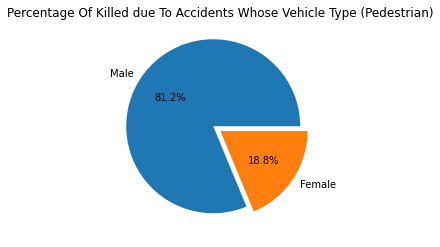

In [51]:
# Extracting Vehicle Type Data

data_Pedestrian = data[data.columns[173:175]]
data_Pedestrian.head(5)

# Calculating the means

mean_Male = (np.mean(data_Pedestrian['vehicle type Pedestrian - Male']))
mean_Female = (np.mean(data_Pedestrian['Pedestrian - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (Pedestrian)")
plot.show()

#### **Extracting Vehicle Type Data (Bicycles)**

105.0 12.4


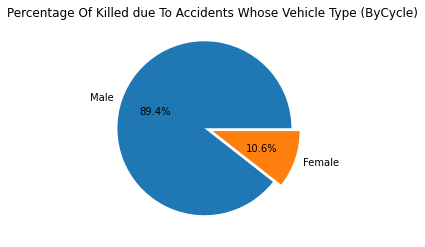

In [52]:
# Extracting Vehicle Type Data

data_ByCycle = data[data.columns[176:178]].head(5)

# Calculating the means

mean_Male = (np.mean(data_ByCycle['Bycycles - Male']))
mean_Female = (np.mean(data_ByCycle['Bycycles - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (ByCycle)")
plot.show()

#### **Extracting Vehicle Type Data (Two Wheelers)**

1617.0 167.6


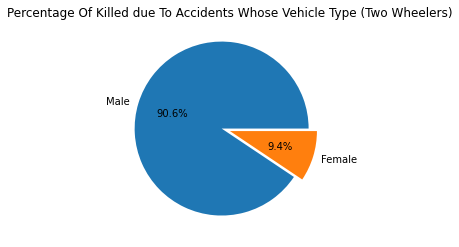

In [53]:
# Extracting Vehicle Type Data

data_TwoWheelers = data[data.columns[179:181]].head(5)

# Calculating the means

mean_Male = (np.mean(data_TwoWheelers['Two Wheelers - Male']))
mean_Female = (np.mean(data_TwoWheelers['Two Wheelers - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (Two Wheelers)")
plot.show()

#### **Extracting Vehicle Type Data (Auto Rickshaws)**

180.8 60.8


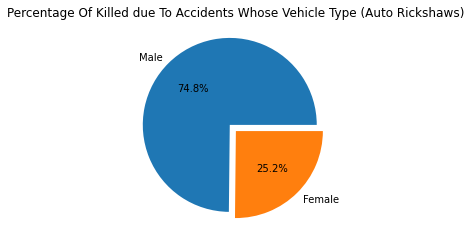

In [54]:
# Extracting Vehicle Type Data

data_AutoRickshaw = data[data.columns[183:185]].head(5)

# Calculating the means

mean_Male = (np.mean(data_AutoRickshaw['Auto Rickshaws - Male']))
mean_Female = (np.mean(data_AutoRickshaw['Auto Rickshaws - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (Auto Rickshaws)"
)
plot.show()

#### **Extracting Vehicle Type Data (Cars, Taxies Vans & LMV)**

464.2 83.2


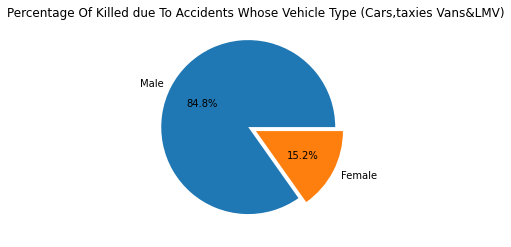

In [55]:
# Extracting Vehicle Type Data

data_CarsTaxisVansLMV = data[data.columns[186:188]].head(5)

# Calculating the means

mean_Male = (np.mean(data_CarsTaxisVansLMV['Cars, taxies Vans & LMV - Male']))
mean_Female = (np.mean(
    data_CarsTaxisVansLMV['Cars, taxies Vans & LMV - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (Cars,taxies Vans&LMV)"
)
plot.show()

#### **Extracting Vehicle Type Data (Truck / Lorries)**

434.4 43.2


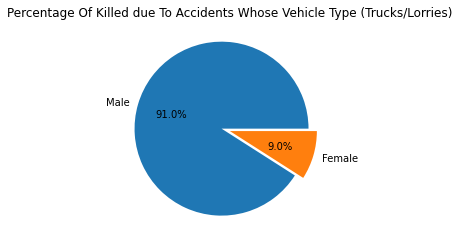

In [56]:
# Extracting Vehicle Type Data

data_TrucksLorry = data[data.columns[189:191]].head(5)

# Calculating the means

mean_Male = (np.mean(data_TrucksLorry['Trucks/Lorries - Male']))
mean_Female = (np.mean(data_TrucksLorry['Trucks/Lorries - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents Whose Vehicle Type (Trucks/Lorries)"
)
plot.show()

#### **Extracting Vehicle Type Data (Buses)**

187.4 37.4


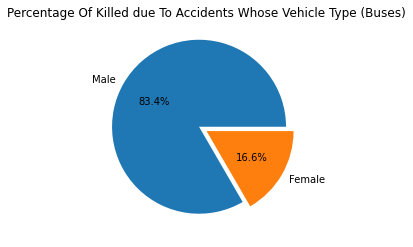

In [57]:
# Extracting Vehicle Type Data

data_Bus = data[data.columns[192:194]].head(5)

# Calculating the means

mean_Male = (np.mean(data_Bus['Buses - Male']))
mean_Female = (np.mean(data_Bus['Buses - Female']))
print(mean_Male, mean_Female)

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents Whose Vehicle Type (Buses)")
plot.show()

#### **Extracting Vehicle Type Data (Overall - Male)**

511.30555555555554 89.91666666666667 1371.2222222222222 146.02777777777777 580.1944444444445 386.6111111111111 177.61111111111111


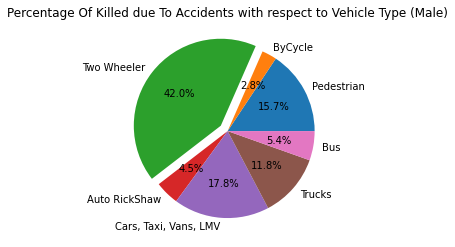

In [58]:
# Extracting Vehicle Type Data

data_VehicleType = data[[
    'vehicle type Pedestrian - Male', 'Bycycles - Male', 'Two Wheelers - Male',
    'Auto Rickshaws - Male', 'Cars, taxies Vans & LMV - Male',
    'Trucks/Lorries - Male', 'Buses - Male'
]]
data_VehicleType.head(5)

# Calculating the means

mean_Pedestrian = (np.mean(data_VehicleType['vehicle type Pedestrian - Male']))
mean_ByCycle = (np.mean(data_VehicleType['Bycycles - Male']))
mean_TwoWheeler = (np.mean(data_VehicleType['Two Wheelers - Male']))
mean_AutoRickshaw = (np.mean(data_VehicleType['Auto Rickshaws - Male']))
mean_Cars = (np.mean(data_VehicleType['Cars, taxies Vans & LMV - Male']))
mean_Trucks = (np.mean(data_VehicleType['Trucks/Lorries - Male']))
mean_Bus = (np.mean(data_VehicleType['Buses - Male']))
print(mean_Pedestrian, mean_ByCycle, mean_TwoWheeler, mean_AutoRickshaw,
      mean_Cars, mean_Trucks, mean_Bus)

# Plotting a Pie Chart

sizes = [
    mean_Pedestrian, mean_ByCycle, mean_TwoWheeler, mean_AutoRickshaw,
    mean_Cars, mean_Trucks, mean_Bus
]
labels = [
    'Pedestrian', 'ByCycle', 'Two Wheeler', 'Auto RickShaw',
    'Cars, Taxi, Vans, LMV', 'Trucks', 'Bus'
]
explode = (0, 0, 0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents with respect to Vehicle Type (Male)"
)
plot.show()

#### **Extracting Vehicle Type Data (Overall - Female)**

118.02777777777777 12.11111111111111 165.88888888888889 38.111111111111114 117.44444444444444 34.22222222222222 49.166666666666664


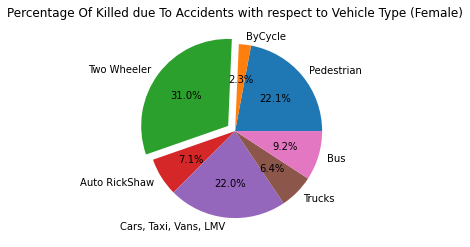

In [59]:
# Extracting Vehicle Type Data

data_VehicleType = data[[
    'Pedestrian - Female', 'Bycycles - Female', 'Two Wheelers - Female',
    'Auto Rickshaws - Female', 'Cars, taxies Vans & LMV - Female',
    'Trucks/Lorries - Female', 'Buses - Female'
]]
data_VehicleType.head(5)

# Calculating the means

mean_Pedestrian = (np.mean(data_VehicleType['Pedestrian - Female']))
mean_ByCycle = (np.mean(data_VehicleType['Bycycles - Female']))
mean_TwoWheeler = (np.mean(data_VehicleType['Two Wheelers - Female']))
mean_AutoRickshaw = (np.mean(data_VehicleType['Auto Rickshaws - Female']))
mean_Cars = (np.mean(data_VehicleType['Cars, taxies Vans & LMV - Female']))
mean_Trucks = (np.mean(data_VehicleType['Trucks/Lorries - Female']))
mean_Bus = (np.mean(data_VehicleType['Buses - Female']))
print(mean_Pedestrian, mean_ByCycle, mean_TwoWheeler, mean_AutoRickshaw,
      mean_Cars, mean_Trucks, mean_Bus)

# Plotting a Pie Chart

sizes = [
    mean_Pedestrian, mean_ByCycle, mean_TwoWheeler, mean_AutoRickshaw,
    mean_Cars, mean_Trucks, mean_Bus
]
labels = [
    'Pedestrian', 'ByCycle', 'Two Wheeler', 'Auto RickShaw',
    'Cars, Taxi, Vans, LMV', 'Trucks', 'Bus'
]
explode = (0, 0, 0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Killed due To Accidents with respect to Vehicle Type (Female)"
)
plot.show()

#### **Extracting Vehicle Type Data (Overall Both Gender)**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


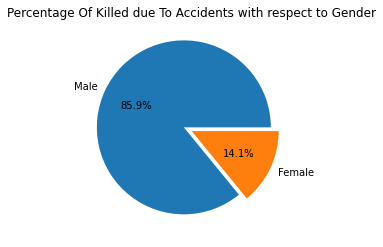

Text(0.5, 1.0, 'Total Killed With Respect To Male')

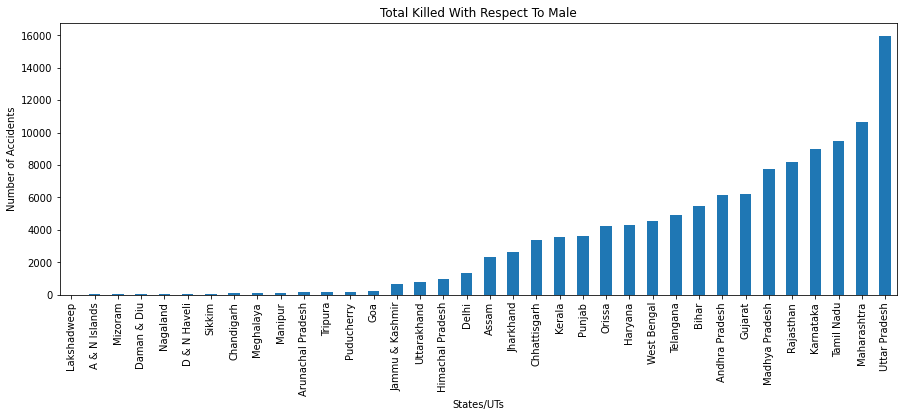

In [60]:
# Extracting male killed data

data_VehicleType['Total Killed (Male)'] = data[[
    'vehicle type Pedestrian - Male', 'Bycycles - Male', 'Two Wheelers - Male',
    'Auto Rickshaws - Male', 'Cars, taxies Vans & LMV - Male',
    'Trucks/Lorries - Male', 'Buses - Male'
]].sum(axis=1)
data_VehicleType['Total Killed (Female)'] = data[[
    'Pedestrian - Female', 'Bycycles - Female', 'Two Wheelers - Female',
    'Auto Rickshaws - Female', 'Cars, taxies Vans & LMV - Female',
    'Trucks/Lorries - Female', 'Buses - Female'
]].sum(axis=1)

# Calculating means
mean_Male = (np.mean(data_VehicleType['Total Killed (Male)']))
mean_Female = (np.mean(data_VehicleType['Total Killed (Female)']))

# Plotting a Pie Chart

sizes = [mean_Male, mean_Female]
labels = ['Male', 'Female']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed due To Accidents with respect to Gender")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Gender (Male) In Increasing Order
sorted_VehicleTypeTotalAccidentsMale = data_VehicleType.sort_values(
    'Total Killed (Male)')
sorted_VehicleTypeTotalAccidentsMale['Total Killed (Male)'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Killed With Respect To Male")

#### **Plotting the Total Number Of Accidents With Respect To Gender (Female) In Increasing Order**

Text(0.5, 1.0, 'Total Killed With Respect To Female')

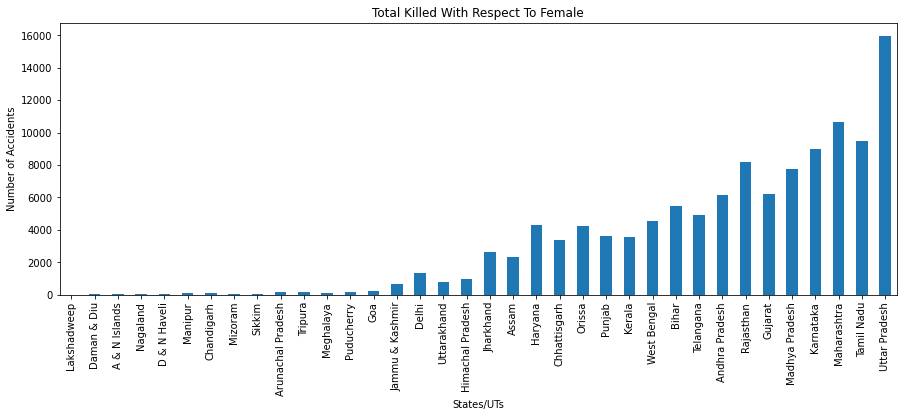

In [61]:
# Plotting the Total Number Of Accidents With Respect To Gender (Female) In Increasing Order
sorted_VehicleTypeTotalAccidentsFemale = data_VehicleType.sort_values(
    'Total Killed (Female)')
sorted_VehicleTypeTotalAccidentsFemale['Total Killed (Male)'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Killed With Respect To Female")

#### **Extracting Type Of Collison Data (Hit & Run)**

794.9722222222222 647.2777777777778 1074.611111111111 1721.888888888889


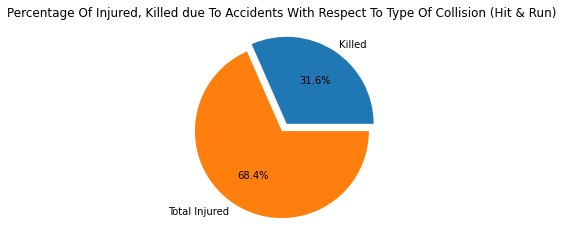

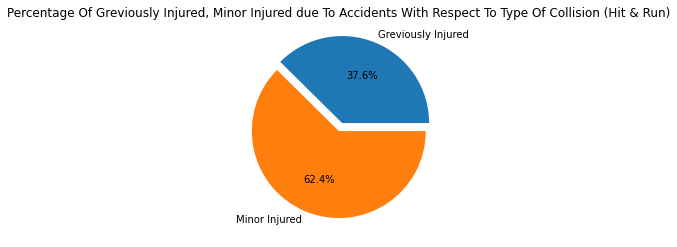

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Hit & Run)')

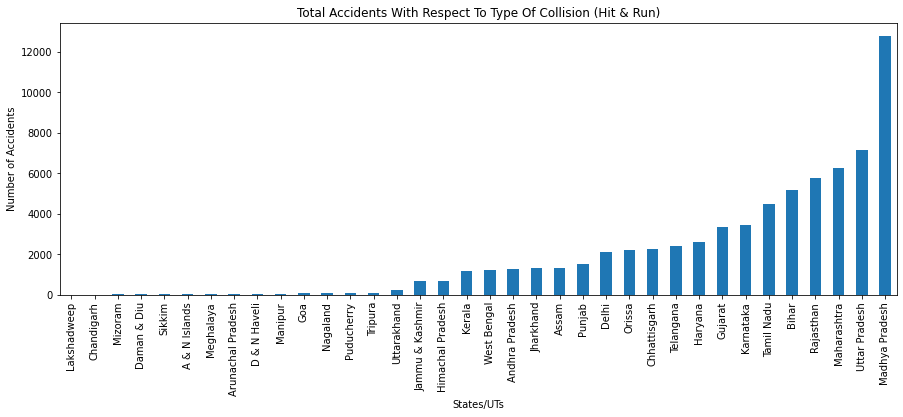

In [62]:
# Extracting Type Of Collison Data

data_HitandRun = data[data.columns[201:206]]
data_HitandRun.head(5)

# Calculating the means

mean_Killed = (np.mean(data_HitandRun['Hit & Run - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_HitandRun['Hit & Run - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_HitandRun['Hit & Run - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_HitandRun['Hit & Run - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Hit & Run)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision (Hit & Run)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Hit & Runeet) In Increasing Order

sorted_HitandRunTotalAccidents = data_HitandRun.sort_values(
    'Type of collision Hit & Run - Total Accidents')
sorted_HitandRunTotalAccidents[
    'Type of collision Hit & Run - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision (Hit & Run)")

#### **Extracting Type Of Collison Data (With Parked Vechile)**

132.77777777777777 146.25 211.94444444444446 358.19444444444446


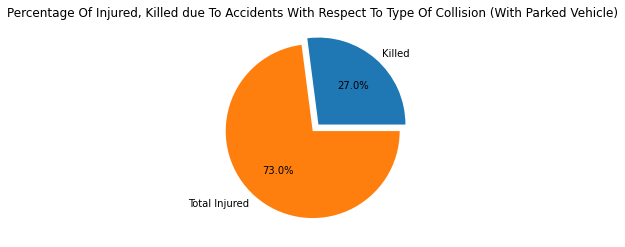

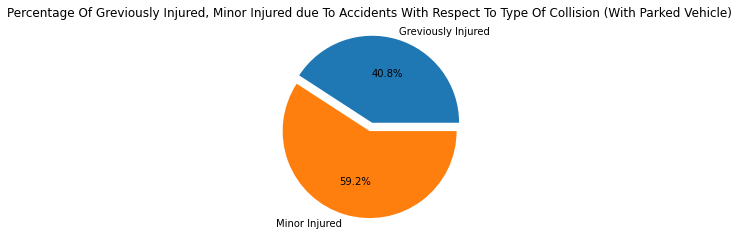

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (With Parked Vehicle)')

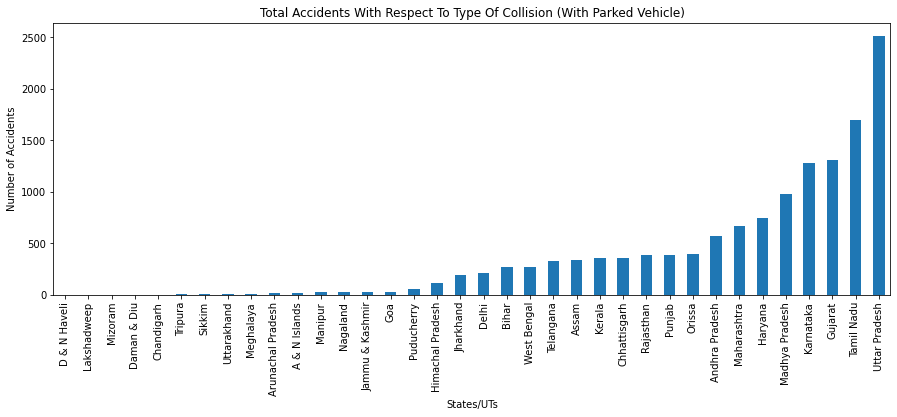

In [63]:
# Extracting Type Of Collison Data

data_WithParkedVehicle = data[data.columns[206:211]]
data_WithParkedVehicle.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_WithParkedVehicle['With Parked Vehicle - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_WithParkedVehicle[
    'With Parked Vehicle - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(data_WithParkedVehicle[
    'With Parked Vehicle - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_WithParkedVehicle[
    'With Parked Vehicle - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (With Parked Vehicle)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision (With Parked Vehicle)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (With Parked Vehicle) In Increasing Order

sorted_WithParkedVehicleTotalAccidents = data_WithParkedVehicle.sort_values(
    'With Parked Vehicle - Total Accidents')
sorted_WithParkedVehicleTotalAccidents[
    'With Parked Vehicle - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents With Respect To Type Of Collision (With Parked Vehicle)")

#### **Extracting Type Of Collison Data (Hit From Back)**

716.6944444444445 955.8611111111111 1527.0833333333333 2482.9444444444443


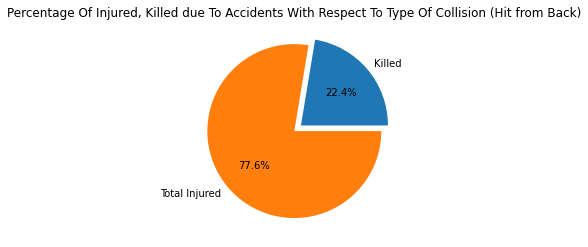

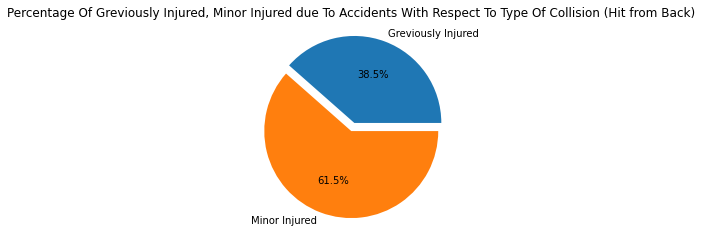

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Hit from Back)')

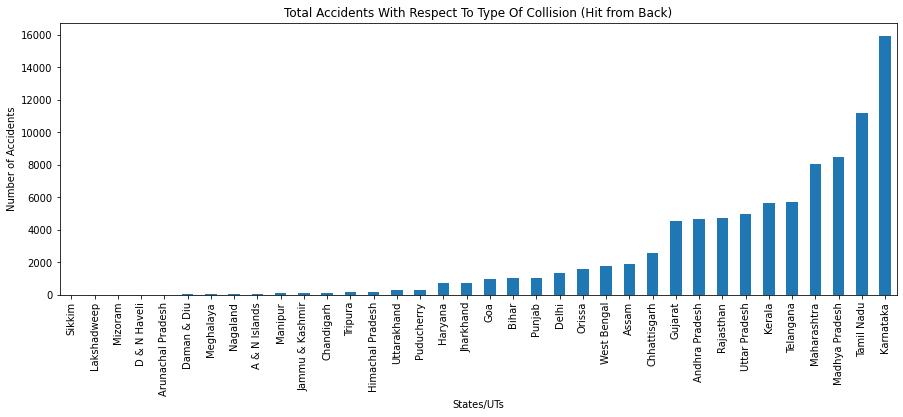

In [64]:
# Extracting Type Of Collison Data

data_HitFromBack = data[data.columns[211:216]]
data_HitFromBack.head(5)

# Calculating the means

mean_Killed = (np.mean(data_HitFromBack['Hit from Back - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_HitFromBack['Hit from Back - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_HitFromBack['Hit from Back - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_HitFromBack['Hit from Back - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Hit from Back)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision (Hit from Back)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Hit from Back) In Increasing Order

sorted_HitFromBackTotalAccidents = data_HitFromBack.sort_values(
    'Hit from Back - Total Accidents')
sorted_HitFromBackTotalAccidents['Hit from Back - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision (Hit from Back)")

#### **Extracting Type Of Collison Data (Hit From Side)**

429.9166666666667 683.6944444444445 976.1388888888889 1659.8333333333333


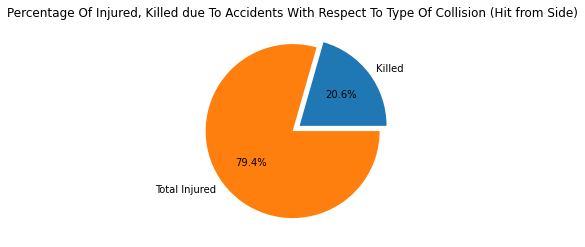

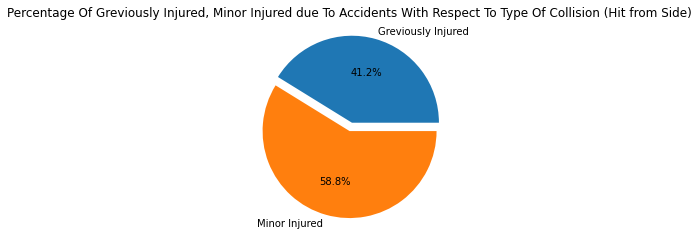

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Hit from Side)')

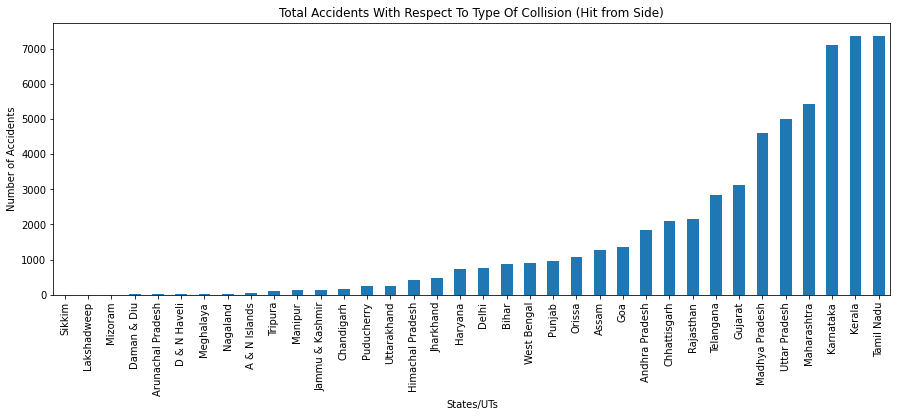

In [65]:
# Extracting Type Of Collison Data

data_HitFromSide = data[data.columns[216:221]]
data_HitFromSide.head(5)

# Calculating the means

mean_Killed = (np.mean(data_HitFromSide['Hit from Side - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_HitFromSide['Hit from Side - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_HitFromSide['Hit from Side - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_HitFromSide['Hit from Side - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Hit from Side)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision (Hit from Side)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Hit from Side) In Increasing Order

sorted_HitFromSideTotalAccidents = data_HitFromSide.sort_values(
    'Hit from Side - Total Accidents')
sorted_HitFromSideTotalAccidents['Hit from Side - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision (Hit from Side)")

#### **Extracting Type Of Collison Data (Run Off Road)**

214.75 228.97222222222223 363.47222222222223 592.4444444444445


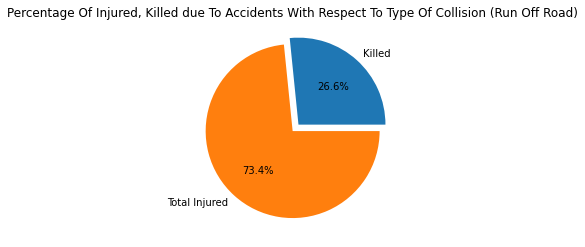

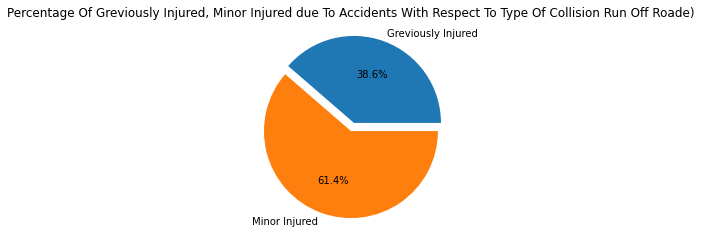

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Run Off Road)')

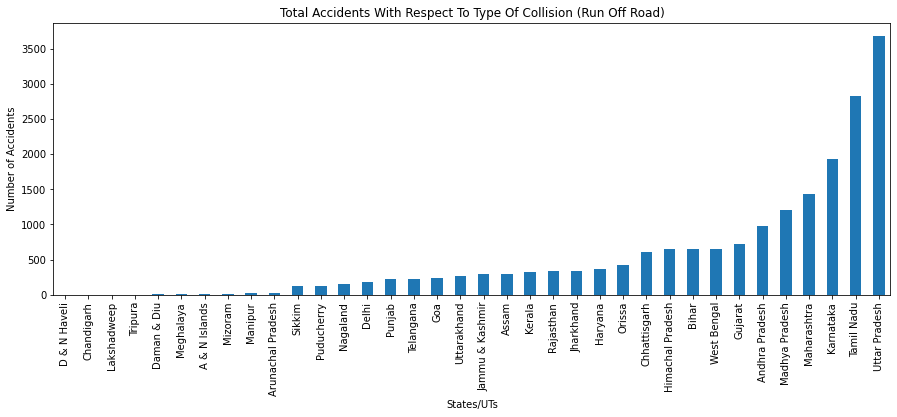

In [66]:
# Extracting Type Of Collison Data

data_RunOffRoad = data[data.columns[221:226]]
data_RunOffRoad.head(5)

# Calculating the means

mean_Killed = (np.mean(data_RunOffRoad['Run Off Road - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_RunOffRoad['Run Off Road - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_RunOffRoad['Run Off Road - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_RunOffRoad['Run Off Road - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Run Off Road)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision Run Off Roade)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Run Off Road) In Increasing Order

sorted_RunOffRoadTotalAccidents = data_RunOffRoad.sort_values(
    'Run Off Road - Total Accidents')
sorted_RunOffRoadTotalAccidents['Run Off Road - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision (Run Off Road)")

#### **Extracting Type Of Collison Data (Fixed Object)**

128.41666666666666 132.30555555555554 263.77777777777777 396.0833333333333


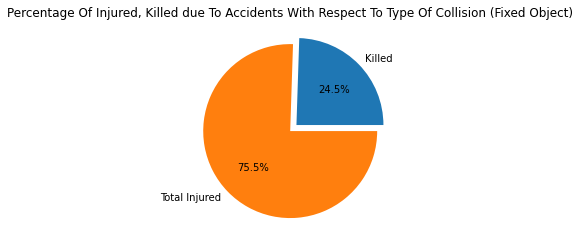

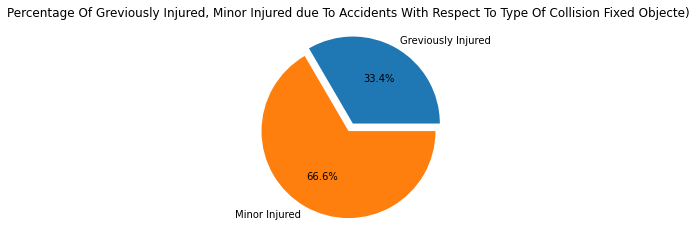

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Fixed Object)')

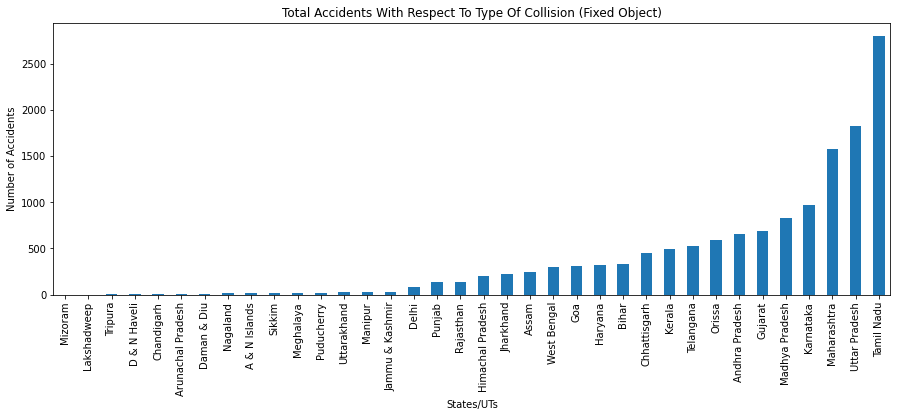

In [67]:
# Extracting Type Of Collison Data

data_FixedObject = data[data.columns[226:231]]
data_FixedObject.head(5)

# Calculating the means

mean_Killed = (np.mean(data_FixedObject['Fixed Object - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_FixedObject['Fixed Object - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_FixedObject['Fixed Object - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_FixedObject['Fixed Object - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Fixed Object)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision Fixed Objecte)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Fixed Object) In Increasing Order

sorted_FixedObjectTotalAccidents = data_FixedObject.sort_values(
    'Fixed Object - Total Accidents')
sorted_FixedObjectTotalAccidents['Fixed Object - Total Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision (Fixed Object)")

#### **Extracting Type Of Collison Data (Vechile Overturn)**

265.22222222222223 274.72222222222223 514.4444444444445 789.1666666666666


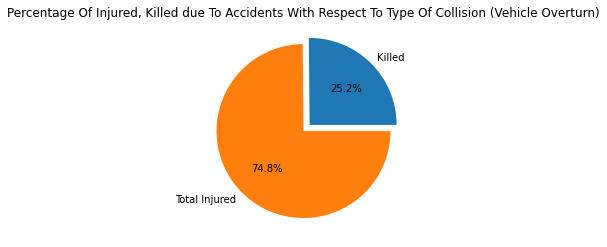

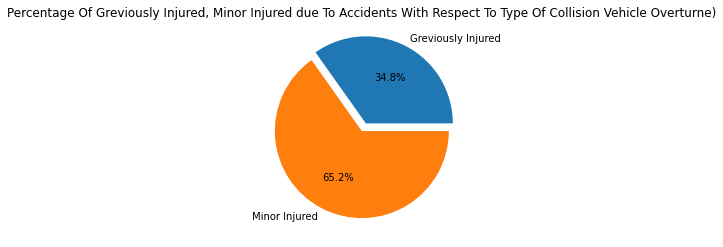

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Vehicle Overturn)')

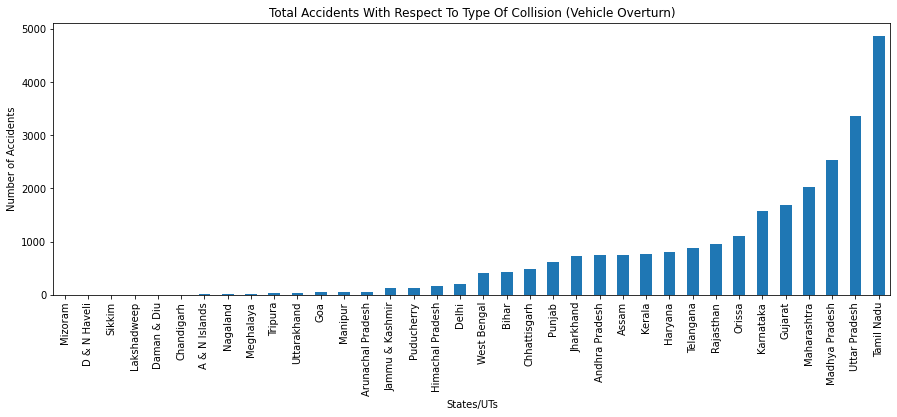

In [68]:
# Extracting Type Of Collison Data

data_VehicleOverTurn = data[data.columns[231:236]]
data_VehicleOverTurn.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_VehicleOverTurn['Vehicle Overturn - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_VehicleOverTurn[
    'Vehicle Overturn - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_VehicleOverTurn['Vehicle Overturn - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_VehicleOverTurn['Vehicle Overturn - Persons Injured - Total Injured'])
                     )
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Vehicle Overturn)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision Vehicle Overturne)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Vehicle Overturn) In Increasing Order

sorted_VehicleOverTurnTotalAccidents = data_VehicleOverTurn.sort_values(
    'Vehicle Overturn - Total Accidents')
sorted_VehicleOverTurnTotalAccidents[
    'Vehicle Overturn - Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents With Respect To Type Of Collision (Vehicle Overturn)")

#### **Extracting Type Of Collison Data (Head On Collision)**

823.5 899.6666666666666 2038.0277777777778 2937.6944444444443


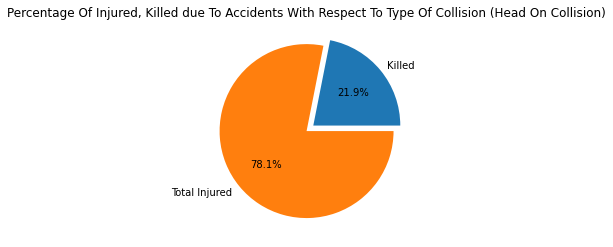

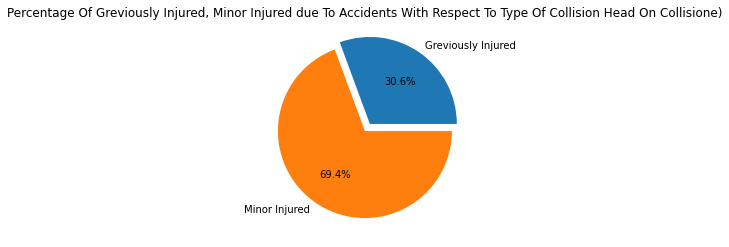

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision (Head On Collision)')

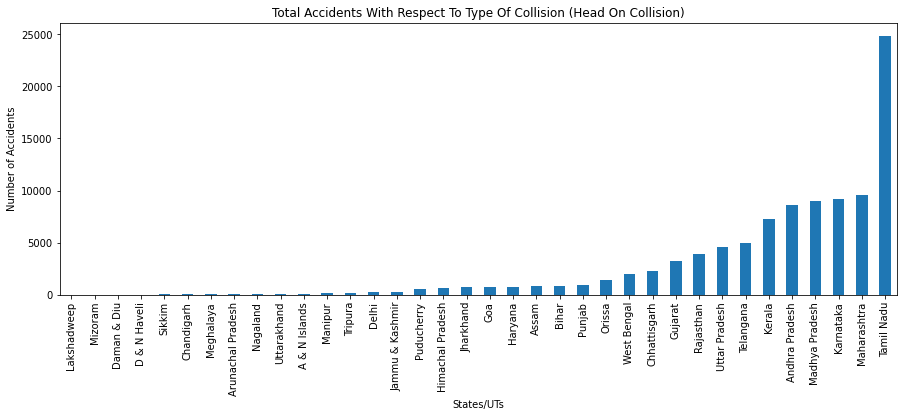

In [69]:
# Extracting Type Of Collison Data

data_HeadOnCollison = data[data.columns[236:243]]
data_HeadOnCollison.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_HeadOnCollison['Head on Collision - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(data_HeadOnCollison[
    'Head on Collision - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_HeadOnCollison['Head on Collision - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_HeadOnCollison['Head on Collision - Persons Injured - Total Injured'])
                     )
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Collision (Head On Collision)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Collision Head On Collisione)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Collision (Head On Collision) In Increasing Order

sorted_HeadOnCollisonTotalAccidents = data_HeadOnCollison.sort_values(
    'Head on Collision - Total Accidents - Number')
sorted_HeadOnCollisonTotalAccidents[
    'Head on Collision - Total Accidents - Number'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents With Respect To Type Of Collision (Head On Collision)")

#### **Extracting Type Of Collison Data (Overall)**

794.9722222222222 132.77777777777777 716.6944444444445 429.9166666666667 214.75 128.41666666666666 265.22222222222223 823.5


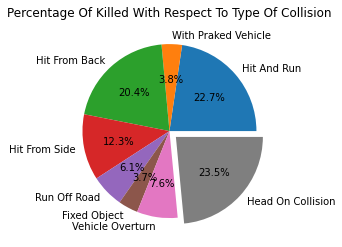

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Collision')

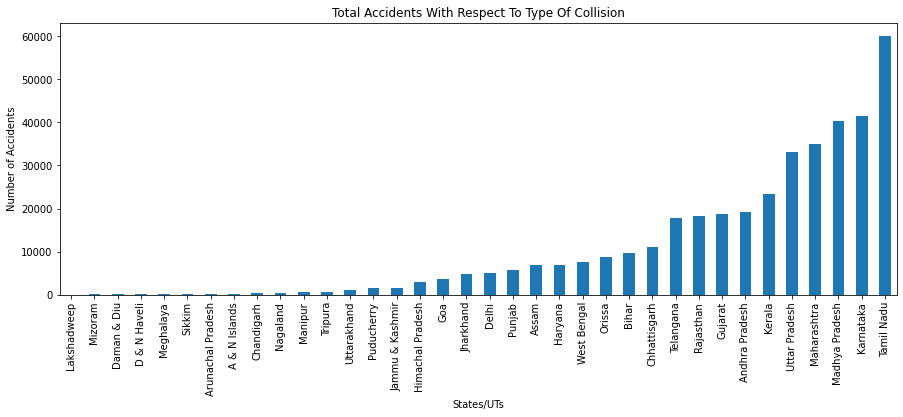

In [70]:
# Extracting Type Of Collision Data

data_CollisionType = data[[
    'Hit & Run - Persons Killed', 'With Parked Vehicle - Persons Killed',
    'Hit from Back - Persons Killed', 'Hit from Side - Persons Killed',
    'Run Off Road - Persons Killed', 'Fixed Object - Persons Killed',
    'Vehicle Overturn - Persons Killed',
    'Head on Collision - Persons Killed - Number'
]]
data_CollisionType.head(5)

# Calculating the means

mean_HitAndRun = (np.mean(data_CollisionType['Hit & Run - Persons Killed']))
mean_WithPrakedVehicle = (np.mean(
    data_CollisionType['With Parked Vehicle - Persons Killed']))
mean_HitFromBack = (np.mean(
    data_CollisionType['Hit from Back - Persons Killed']))
mean_HitFromSide = (np.mean(
    data_CollisionType['Hit from Side - Persons Killed']))
mean_RunOffRoad = (np.mean(
    data_CollisionType['Run Off Road - Persons Killed']))
mean_FixedObject = (np.mean(
    data_CollisionType['Fixed Object - Persons Killed']))
mean_VehicleOverturn = (np.mean(
    data_CollisionType['Vehicle Overturn - Persons Killed']))
mean_HeadOnCollision = (np.mean(
    data_CollisionType['Head on Collision - Persons Killed - Number']))
print(mean_HitAndRun, mean_WithPrakedVehicle, mean_HitFromBack,
      mean_HitFromSide, mean_RunOffRoad, mean_FixedObject,
      mean_VehicleOverturn, mean_HeadOnCollision)

# Plotting a Pie Chart

sizes = [
    mean_HitAndRun, mean_WithPrakedVehicle, mean_HitFromBack, mean_HitFromSide,
    mean_RunOffRoad, mean_FixedObject, mean_VehicleOverturn,
    mean_HeadOnCollision
]
labels = [
    'Hit And Run', 'With Praked Vehicle', 'Hit From Back', 'Hit From Side',
    'Run Off Road', 'Fixed Object', 'Vehicle Overturn', 'Head On Collision'
]
explode = (0, 0, 0, 0, 0, 0, 0, 0.1)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Type Of Collision")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Type Of Collision In Increasing Order

data_CollisionType['Total Accidents'] = data[[
    'Type of collision Hit & Run - Total Accidents',
    'With Parked Vehicle - Total Accidents', 'Hit from Back - Total Accidents',
    'Hit from Side - Total Accidents', 'Run Off Road - Total Accidents',
    'Fixed Object - Total Accidents', 'Vehicle Overturn - Total Accidents',
    'Head on Collision - Total Accidents - Number'
]].sum(axis=1)
sorted_CollisionTypeTotalAccidents = data_CollisionType.sort_values(
    'Total Accidents')
sorted_CollisionTypeTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Collision")

#### **Extracting Type Of Road Data (Curved Road)**

555.4444444444445 761.2222222222222 1152.0555555555557 1913.2777777777778


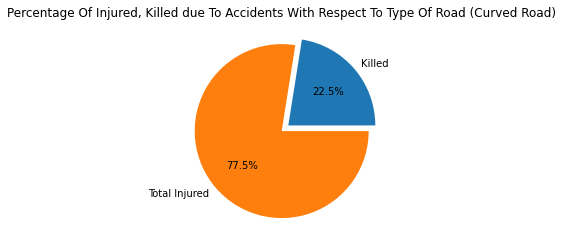

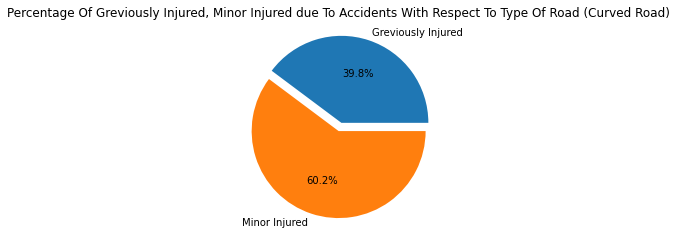

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Curved Road)')

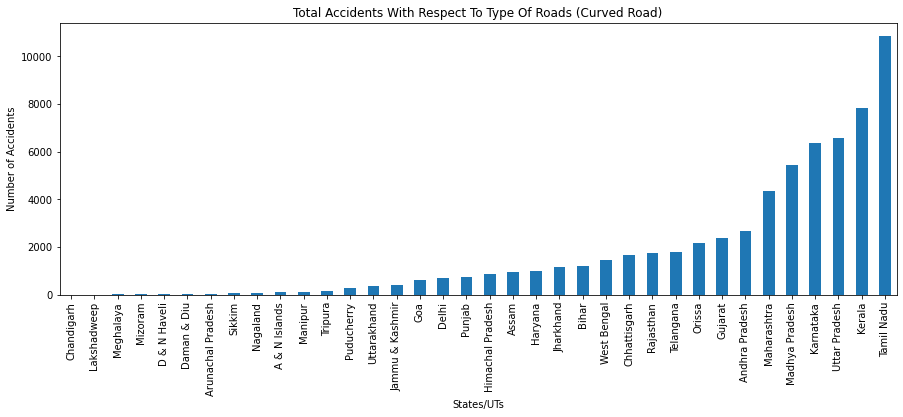

In [71]:
# Extracting Type Of Road Data

data_CurvedRoad = data[data.columns[255:260]]
data_CurvedRoad.head(5)

# Calculating the means

mean_Killed = (np.mean(data_CurvedRoad['Curved Road - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_CurvedRoad['Curved Road - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_CurvedRoad['Curved Road - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_CurvedRoad['Curved Road - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Curved Road)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Curved Road)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Curved Road) In Increasing Order

sorted_CurvedRoadTotalAccidents = data_CurvedRoad.sort_values(
    'Curved Road - Number of Accidents')
sorted_CurvedRoadTotalAccidents['Curved Road - Number of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Curved Road)")

#### **Extracting Type Of Road Data (Straight Road)**

2689.75 3168.1666666666665 5400.611111111111 8568.777777777777


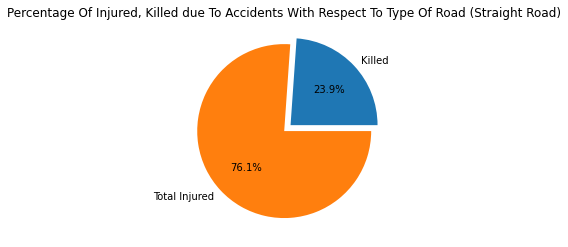

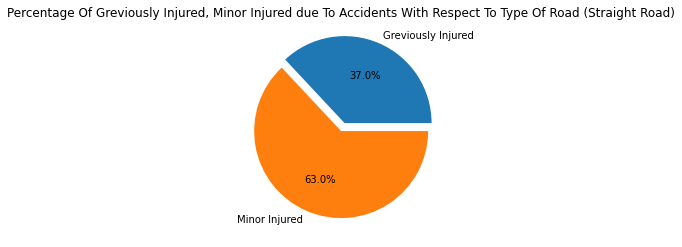

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Straight Road)')

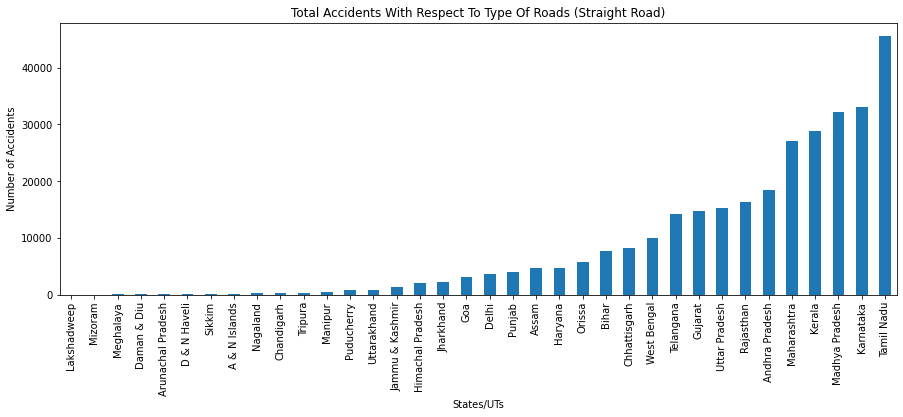

In [72]:
# Extracting Type Of Road Data

data_StraightRoad = data[data.columns[248:255]]
data_StraightRoad.head(5)

# Calculating the means

mean_Killed = (np.mean(
    data_StraightRoad['Straight Road - Persons Killed - Number']))
mean_GreviouslyInjured = (np.mean(
    data_StraightRoad['Straight Road - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_StraightRoad['Straight Road - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_StraightRoad['Straight Road - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Straight Road)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Straight Road)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Straight Road) In Increasing Order

sorted_StraightRoadTotalAccidents = data_StraightRoad.sort_values(
    'Type of road Straight Road - Number of Accidents - Number')
sorted_StraightRoadTotalAccidents[
    'Type of road Straight Road - Number of Accidents - Number'].plot.bar(
        figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Straight Road)")

#### **Extracting Type Of Road Data (Bridge)**

158.13888888888889 177.75 288.4166666666667 466.1666666666667


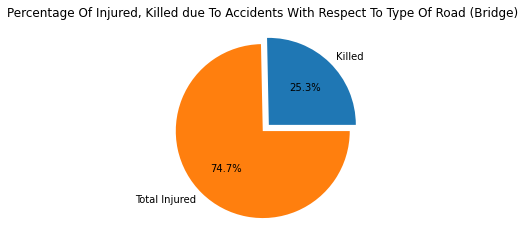

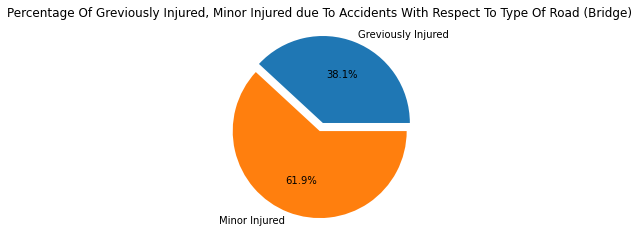

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Bridge)')

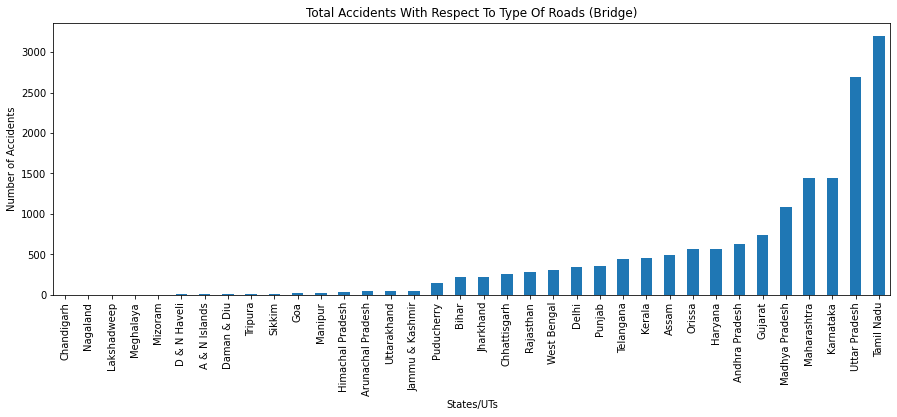

In [73]:
# Extracting Type Of Road Data

data_Brdige = data[data.columns[260:265]]
data_Brdige.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Brdige['Bridge - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Brdige['Bridge - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Brdige['Bridge - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Brdige['Bridge - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Bridge)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Bridge)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Bridge) In Increasing Order

sorted_BrdigeTotalAccidents = data_Brdige.sort_values(
    'Bridge - Number of Accidents')
sorted_BrdigeTotalAccidents['Bridge - Number of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Bridge)")

#### **Extracting Type Of Road Data (Culvert)**

88.66666666666667 100.25 159.88888888888889 260.1388888888889


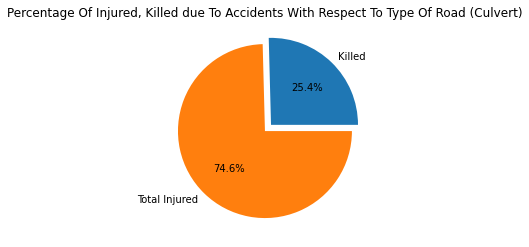

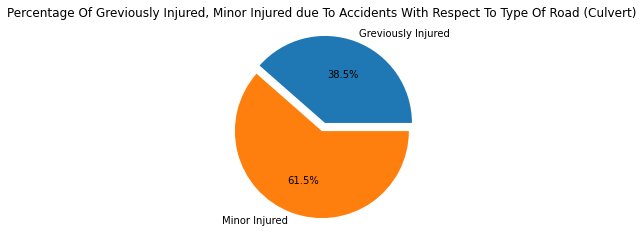

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Culvert)')

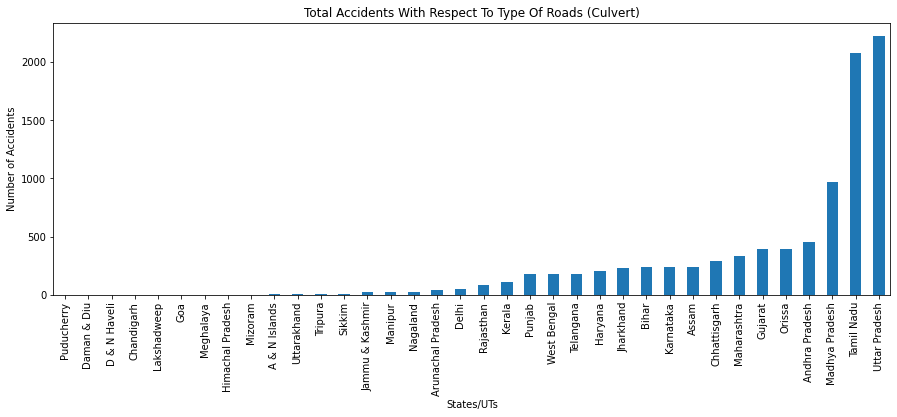

In [74]:
# Extracting Type Of Road Data

data_Culvert = data[data.columns[265:270]]
data_Culvert.head(5)

# Calculating the means

mean_Killed = (np.mean(data_Culvert['Culvert - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_Culvert['Culvert - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_Culvert['Culvert - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_Culvert['Culvert - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Culvert)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Culvert)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Culvert) In Increasing Order

sorted_CulvertTotalAccidents = data_Culvert.sort_values(
    'Culvert - Number of Accidents')
sorted_CulvertTotalAccidents['Culvert - Number of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Culvert)")

#### **Extracting Type Of Road Data (Pot Holes)**

55.97222222222222 58.22222222222222 55.888888888888886 114.11111111111111


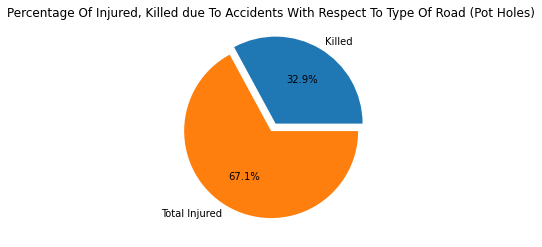

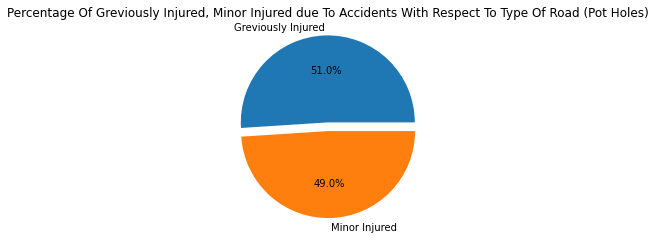

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Pot Holes)')

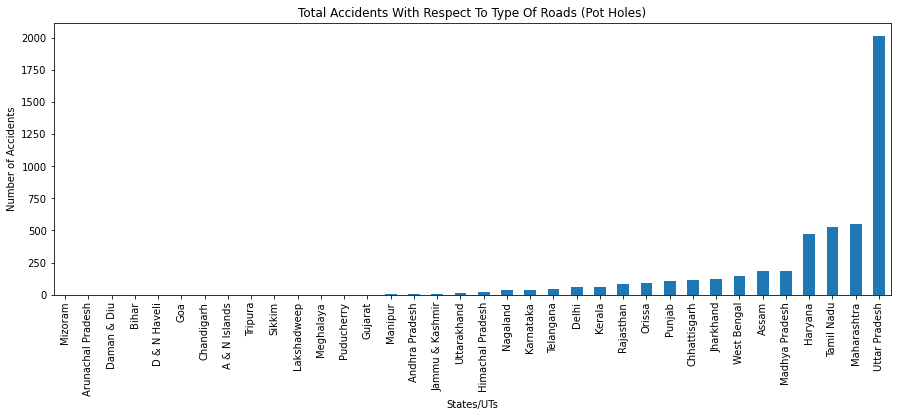

In [75]:
# Extracting Type Of Road Data

data_PotHoles = data[data.columns[270:275]]
data_PotHoles.head(5)

# Calculating the means

mean_Killed = (np.mean(data_PotHoles['Pot Holes - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_PotHoles['Pot Holes - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_PotHoles['Pot Holes - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_PotHoles['Pot Holes - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Pot Holes)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Pot Holes)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Pot Holes) In Increasing Order

sorted_PotHolesTotalAccidents = data_PotHoles.sort_values(
    'Pot Holes - Number of Accidents')
sorted_PotHolesTotalAccidents['Pot Holes - Number of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Pot Holes)")

#### **Extracting Type Of Road Data (Steep Grade)**

67.58333333333333 77.75 86.22222222222223 163.97222222222223


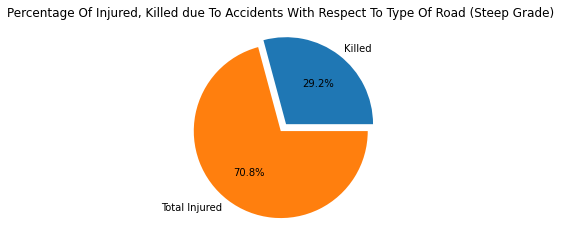

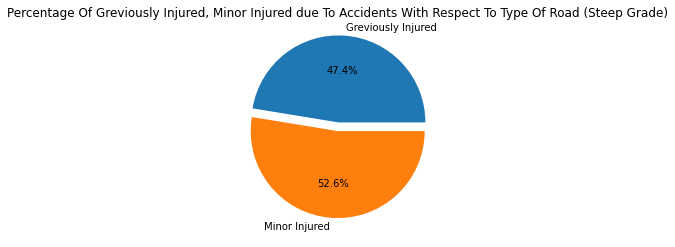

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Steep Grade)')

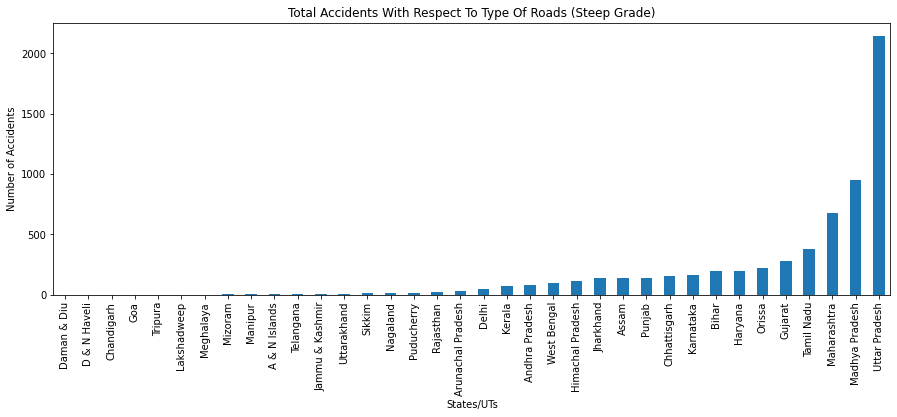

In [76]:
# Extracting Type Of Road Data

data_SteepGrade = data[data.columns[275:280]]
data_SteepGrade.head(5)

# Calculating the means

mean_Killed = (np.mean(data_SteepGrade['Steep Grade - Persons Killed']))
mean_GreviouslyInjured = (np.mean(
    data_SteepGrade['Steep Grade - Persons Injured - Greviously Injured']))
mean_MinorInjured = (np.mean(
    data_SteepGrade['Steep Grade - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(
    data_SteepGrade['Steep Grade - Persons Injured - Total Injured']))
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Steep Grade)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Steep Grade)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Steep Grade) In Increasing Order

sorted_SteepGradeTotalAccidents = data_SteepGrade.sort_values(
    'Steep Grade - Number of Accidents')
sorted_SteepGradeTotalAccidents['Steep Grade - Number of Accidents'].plot.bar(
    figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Roads (Steep Grade)")

#### **Extracting Type Of Road Data (Ongoing Road Works / Under Construction)**

119.11111111111111 119.77777777777777 162.27777777777777 282.05555555555554


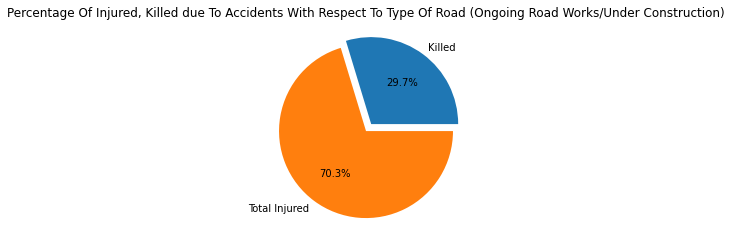

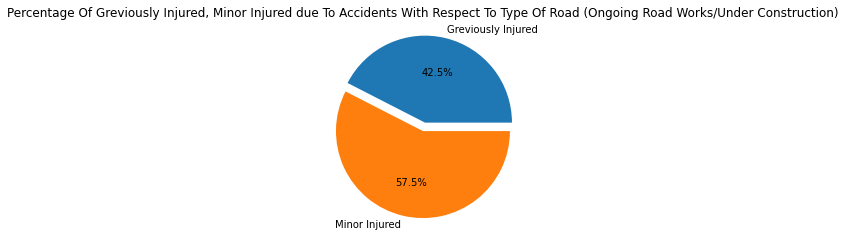

Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Roads (Ongoing Road Works/Under Construction)')

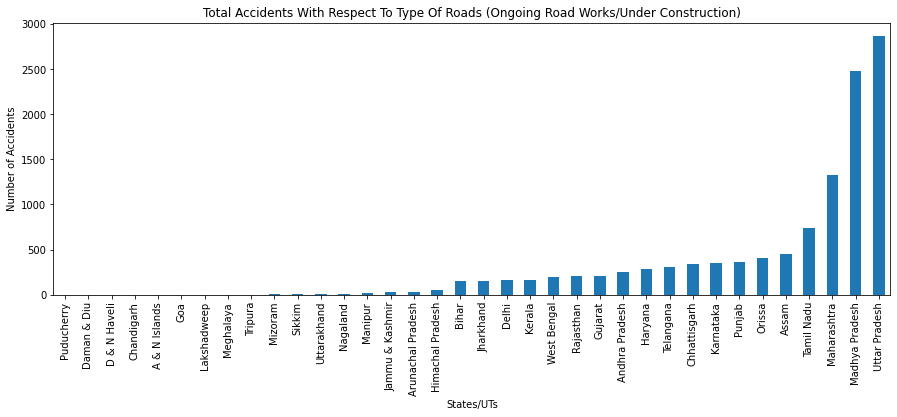

In [77]:
# Extracting Type Of Road Data

data_UnderConstruction = data[data.columns[280:285]]
data_UnderConstruction.head(5)

# Calculating the means

mean_Killed = (np.mean(data_UnderConstruction[
    'Ongoing Road Works/Under Construction - Persons Killed']))
mean_GreviouslyInjured = (np.mean(data_UnderConstruction[
    'Ongoing Road Works/Under Construction - Persons Injured - Greviously Injured']
                                  ))
mean_MinorInjured = (np.mean(data_UnderConstruction[
    'Ongoing Road Works/Under Construction - Persons Injured - Minor Injury']))
mean_TotalInjured = (np.mean(data_UnderConstruction[
    'Ongoing Road Works/Under Construction - Persons Injured - Total Injured'])
                     )
print(mean_Killed, mean_GreviouslyInjured, mean_MinorInjured,
      mean_TotalInjured)

# Plotting a Pie Chart

sizes = [mean_Killed, mean_TotalInjured]
labels = ['Killed', 'Total Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Injured, Killed due To Accidents With Respect To Type Of Road (Ongoing Road Works/Under Construction)"
)
plot.show()

sizes = [mean_GreviouslyInjured, mean_MinorInjured]
labels = ['Greviously Injured', 'Minor Injured']
explode = (0.1, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title(
    "Percentage Of Greviously Injured, Minor Injured due To Accidents With Respect To Type Of Road (Ongoing Road Works/Under Construction)"
)
plot.show()

# Plotting the Total Number Of Accidents Occured With Respect To Type Of Road (Ongoing Road Works/Under Construction) In Increasing Order

sorted_UnderConstructionTotalAccidents = data_UnderConstruction.sort_values(
    'Ongoing Road Works/Under Construction - Number of Accidents')
sorted_UnderConstructionTotalAccidents[
    'Ongoing Road Works/Under Construction - Number of Accidents'].plot.bar(
        figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title(
    "Total Accidents With Respect To Type Of Roads (Ongoing Road Works/Under Construction)"
)

#### **Extracting Type Of Road Data (Overall)**

2689.75 555.4444444444445 158.13888888888889 88.66666666666667 55.97222222222222 67.58333333333333 119.11111111111111


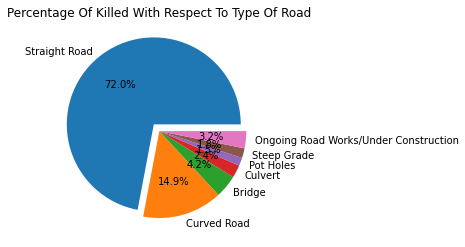

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Type Of Road')

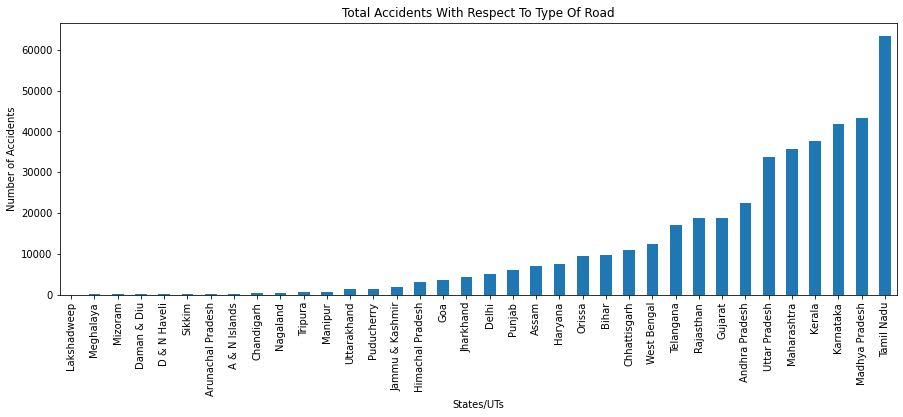

In [78]:
# Extracting Type Of Road Data

data_RoadType = data[[
    'Straight Road - Persons Killed - Number', 'Curved Road - Persons Killed',
    'Bridge - Persons Killed', 'Culvert - Persons Killed',
    'Pot Holes - Persons Killed', 'Steep Grade - Persons Killed',
    'Ongoing Road Works/Under Construction - Persons Killed'
]]
data_RoadType.head(5)

# Calculating the means

mean_StraightRoad = (np.mean(
    data_RoadType['Straight Road - Persons Killed - Number']))
mean_CurvedRoad = (np.mean(data_RoadType['Curved Road - Persons Killed']))
mean_Bridge = (np.mean(data_RoadType['Bridge - Persons Killed']))
mean_Culvert = (np.mean(data_RoadType['Culvert - Persons Killed']))
mean_PotHoles = (np.mean(data_RoadType['Pot Holes - Persons Killed']))
mean_SteepGrade = (np.mean(data_RoadType['Steep Grade - Persons Killed']))
mean_UnderConstruction = (np.mean(
    data_RoadType['Ongoing Road Works/Under Construction - Persons Killed']))
print(mean_StraightRoad, mean_CurvedRoad, mean_Bridge, mean_Culvert,
      mean_PotHoles, mean_SteepGrade, mean_UnderConstruction)

# Plotting a Pie Chart

sizes = [
    mean_StraightRoad, mean_CurvedRoad, mean_Bridge, mean_Culvert,
    mean_PotHoles, mean_SteepGrade, mean_UnderConstruction
]
labels = [
    'Straight Road', 'Curved Road', 'Bridge', 'Culvert', 'Pot Holes',
    'Steep Grade', 'Ongoing Road Works/Under Construction'
]
explode = (0.1, 0, 0, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Killed With Respect To Type Of Road")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Type Of Road In Increasing Order

data_RoadType['Total Accidents'] = data[[
    'Type of road Straight Road - Number of Accidents - Number',
    'Curved Road - Number of Accidents', 'Bridge - Number of Accidents',
    'Culvert - Number of Accidents', 'Pot Holes - Number of Accidents',
    'Steep Grade - Number of Accidents',
    'Ongoing Road Works/Under Construction - Number of Accidents'
]].sum(axis=1)
sorted_RoadTypeTotalAccidents = data_RoadType.sort_values('Total Accidents')
sorted_RoadTypeTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of Road")

#### **Extracting Type Of License Data (Overall)**

9605.527777777777 655.3611111111111 1044.0277777777778


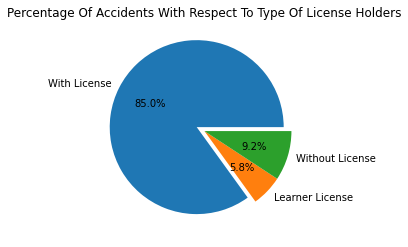

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Type Of License Holders')

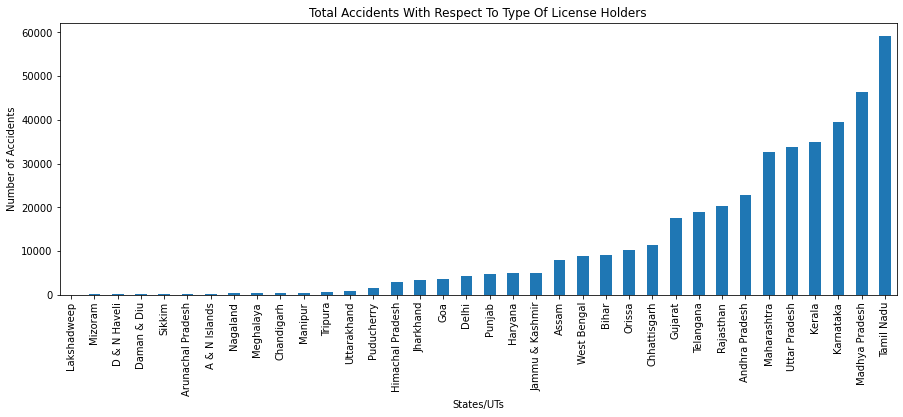

In [79]:
# Extracting Type Of License Data

data_LicenseType = data[data.columns[290:294]]
data_LicenseType.head(5)

# Calculating the means

mean_WithLicense = (np.mean(
    data_LicenseType['License Valid Permanent - Number']))
mean_LearnerLicense = (np.mean(data_LicenseType["Learner's Licence"]))
mean_WithoutLicense = (np.mean(data_LicenseType['Without Licence']))
print(mean_WithLicense, mean_LearnerLicense, mean_WithoutLicense)

# Plotting a Pie Chart

sizes = [mean_WithLicense, mean_LearnerLicense, mean_WithoutLicense]
labels = ['With License', 'Learner License', 'Without License']
explode = (0.1, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Accidents With Respect To Type Of License Holders")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Type Of License Holders In Increasing Order

data_LicenseType['Total Accidents'] = data[[
    'License Valid Permanent - Number', "Learner's Licence", 'Without Licence'
]].sum(axis=1)
sorted_LicenseTypeTotalAccidents = data_LicenseType.sort_values(
    'Total Accidents')
sorted_LicenseTypeTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Type Of License Holders")

#### **Extracting At what Time the accident has occured Data**

1430.25 1950.3055555555557 1983.111111111111 2267.1944444444443 2416.277777777778 1365.611111111111 705.75 738.0833333333334 116.86111111111111


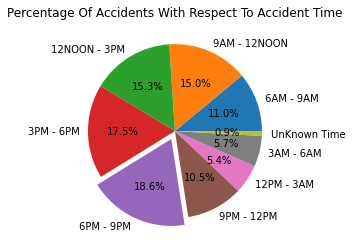

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Total Accidents With Respect To Accident Time')

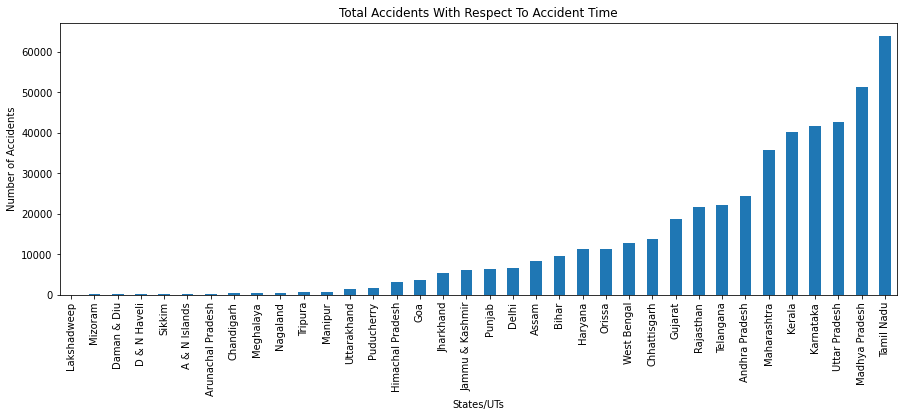

In [80]:
# Extracting At what Time the accident has occured Data

data_AccidentTime = data[data.columns[296:306]]
data_AccidentTime.head(5)

# Calculating the means

mean_EarlyMorning = (np.mean(data_AccidentTime["Time 06-0900hrs - (Day)"]))
mean_Morning = (np.mean(data_AccidentTime["09-1200hrs - (Day)"]))
mean_Noon = (np.mean(data_AccidentTime['12-1500hrs - (Day)']))
mean_MidDay = (np.mean(data_AccidentTime["15-1800hrs - (Day)"]))
mean_Evening = (np.mean(data_AccidentTime["18-2100hrs - (Night)"]))
mean_Night = (np.mean(data_AccidentTime["21-2400hrs - (Night)"]))
mean_MidNight = (np.mean(data_AccidentTime["00-300hrs - (Night)"]))
mean_VeryEarlyMorning = (np.mean(data_AccidentTime['03-600hrs - (Night)']))
mean_UnKnownTime = (np.mean(data_AccidentTime['Unknown Time']))
print(mean_EarlyMorning, mean_Morning, mean_Noon, mean_MidDay, mean_Evening,
      mean_Night, mean_MidNight, mean_VeryEarlyMorning, mean_UnKnownTime)

# Plotting a Pie Chart

sizes = [
    mean_EarlyMorning, mean_Morning, mean_Noon, mean_MidDay, mean_Evening,
    mean_Night, mean_MidNight, mean_VeryEarlyMorning, mean_UnKnownTime
]
labels = [
    '6AM - 9AM', '9AM - 12NOON', '12NOON - 3PM', '3PM - 6PM', '6PM - 9PM',
    '9PM - 12PM', '12PM - 3AM', '3AM - 6AM', 'UnKnown Time'
]
explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0)
plot.pie(sizes, labels=labels, explode=explode, autopct='%.1f%%')
plot.title("Percentage Of Accidents With Respect To Accident Time")
plot.show()

# Plotting the Total Number Of Accidents With Respect To Accident Time In Increasing Order

data_AccidentTime['Total Accidents'] = data[[
    'Time 06-0900hrs - (Day)', "09-1200hrs - (Day)", '12-1500hrs - (Day)',
    '15-1800hrs - (Day)', '18-2100hrs - (Night)', '21-2400hrs - (Night)',
    '00-300hrs - (Night)', '03-600hrs - (Night)', 'Unknown Time'
]].sum(axis=1)
sorted_AccidentTimeTotalAccidents = data_AccidentTime.sort_values(
    'Total Accidents')
sorted_AccidentTimeTotalAccidents['Total Accidents'].plot.bar(figsize=(15, 5))
plot.ylabel('Number of Accidents')
plot.title("Total Accidents With Respect To Accident Time")

## **Road-Accident Prediction - Pre Processing**

***Data preprocessing allows for the removal of unwanted data with the use of data cleaning, this allows the user to have a dataset to contain more valuable information after the preprocessing stage for data manipulation later in the data mining process.***

![](https://iili.io/wrVJsI.jpg)

***Editing such dataset to either correct data corruption or human error is a crucial step to get accurate quantifiers like true positives, true negatives, False positives and false negatives found in a Confusion matrix that are commonly used for a medical diagnosis. Users are able to join data files together and use preprocessing to filter any unnecessary noise from the data which can allow for higher accuracy.***


In [81]:
# PreProcessing Steps

# Import Required Libraries
import pandas as pd
import numpy as np

# Displaying the Read Data
roadAccidentData = pd.read_csv(
    '../input/road-accident-analysis-data/Road Accident Analysis Data/Prediction/Road Accident Data(2018 in Numbers).csv'
)
roadAccidentData

States/UTs  T-Junction - Total Number of Accidents - Number  \
0      Andhra Pradesh                                             2384   
1   Arunachal Pradesh                                               38   
2               Assam                                              838   
3               Bihar                                              812   
4        Chhattisgarh                                             1730   
5                 Goa                                              129   
6             Gujarat                                             2096   
7             Haryana                                              325   
8    Himachal Pradesh                                                9   
9     Jammu & Kashmir                                              461   
10          Jharkhand                                             1006   
11          Karnataka                                             2615   
12             Kerala                                             8494   
13     Madhya Pradesh                                             7018   
14        Maharashtra                                             1846   
15            Manipur                                               84   
16          Meghalaya                                               35   
17            Mizoram                                                6   
18           Nagaland                                              114   
19             Orissa                                             1093   
20             Punjab                                              969   
21          Rajasthan                                             1737   
22             Sikkim                                                0   
23         Tamil Nadu                                            10947   
24          Telangana                                             3635   
25            Tripura                                               27   
26        Uttarakhand                                               18   
27      Uttar Pradesh                                             5343   
28        West Bengal                                             2535   
29      A & N Islands                                               29   
30         Chandigarh                                               24   
31       D & N Haveli                                               30   
32        Daman & Diu                                               31   
33              Delhi                                              898   
34        Lakshadweep                                                0   
35         Puducherry                                              296   

    Y-Junction - Total Number of Accidents  \
0                                     1473   
1                                       35   
2                                      624   
3                                      388   
4                                      549   
5                                       58   
6                                      818   
7                                      296   
8                                       21   
9                                      149   
10                                     623   
11                                    1449   
12                                    3072   
13                                    2878   
14                                     760   
15                                      20   
16                                      36   
17                                       1   
18                                      82   
19                                     679   
20                                     584   
21                                     567   
22                                       0   
23                                    3919   
24                                    1270   
25                                       0   
26                            

#### **Calculate the mean and replace it with Yes Or No (Probability of Occurence Of Road Accidents)**

In [82]:
# Calculate the mean and replace it with Yes Or No (Probability of Occurence Of Road Accidents)

for (columnName, columnData) in roadAccidentData.iteritems():
    if (columnName != 'States/UTs'):
        calculatedMean = np.mean(roadAccidentData[columnName])
        for i in range(0, 36):
            if (roadAccidentData[columnName].values[i] < calculatedMean):
                roadAccidentData.loc[i, columnName] = 'no'
            else:
                roadAccidentData.loc[i, columnName] = 'yes'
            roadAccidentData.to_csv("Road Accident Data(2018 in Numbers).csv",
                                    index=False)
roadAccidentData

States/UTs T-Junction - Total Number of Accidents - Number  \
0      Andhra Pradesh                                             yes   
1   Arunachal Pradesh                                              no   
2               Assam                                              no   
3               Bihar                                              no   
4        Chhattisgarh                                             yes   
5                 Goa                                              no   
6             Gujarat                                             yes   
7             Haryana                                              no   
8    Himachal Pradesh                                              no   
9     Jammu & Kashmir                                              no   
10          Jharkhand                                              no   
11          Karnataka                                             yes   
12             Kerala                                             yes   
13     Madhya Pradesh                                             yes   
14        Maharashtra                                             yes   
15            Manipur                                              no   
16          Meghalaya                                              no   
17            Mizoram                                              no   
18           Nagaland                                              no   
19             Orissa                                              no   
20             Punjab                                              no   
21          Rajasthan                                             yes   
22             Sikkim                                              no   
23         Tamil Nadu                                             yes   
24          Telangana                                             yes   
25            Tripura                                              no   
26        Uttarakhand                                              no   
27      Uttar Pradesh                                             yes   
28        West Bengal                                             yes   
29      A & N Islands                                              no   
30         Chandigarh                                              no   
31       D & N Haveli                                              no   
32        Daman & Diu                                              no   
33              Delhi                                              no   
34        Lakshadweep                                              no   
35         Puducherry                                              no   

   Y-Junction - Total Number of Accidents  \
0                                     yes   
1                                      no   
2                                      no   
3                                      no   
4                                      no   
5                                      no   
6                                     yes   
7                                      no   
8                                      no   
9                                      no   
10                                     no   
11                                    yes   
12                                    yes   
13                                    yes   
14                                    yes   
15                                     no   
16                                     no   
17                                     no   
18                                     no   
19                                     no   
20                                     no   
21                                     no   
22                                     no   
23                                    yes   
24                                    yes   
25                                     no   
26                                     no   
27                                    yes   
28  

#### **Renaming the columns names accordingly**

In [83]:
# Renaming the columns names accordingly

roadAccidentData = roadAccidentData.rename(columns={
    'T-Junction - Total Number of Accidents - Number':
    'T-Junction',
    'Y-Junction - Total Number of Accidents':
    'Y-Junction',
    'Four arm Junction - Total Number of Accidents':
    'Four arm Junction',
    'Staggered Junction - Total Number of Accidents':
    'Staggered Junction',
    'Round about Junction - Total Number of Accidents':
    'Round about Junction',
    'Others - Total Number of Accidents':
    'Others',
    'Vehicle ageLess than 5 Years - Total Accidents - Number':
    'Less than 5 years',
    '5.1 - 10 Years - Total Accidents':
    '5.1 - 10 Years',
    '10.1 - 15 Years - Total Accidents':
    '10.1 - 15 Years',
    "> 15 Years - Total Accidents":
    "> 15 Years",
    'Age not known - Total Accidents':
    'Age not known',
    'Human Age and sex 18 Yrs - Killed - Male':
    '18 Yrs -Male',
    '18 Yrs - Killed - Female':
    '18 Yrs - Female',
    '18-25 Yrs - Killed - Male':
    '18-25 Yrs - Male',
    '18-25 Yrs - Killed - Female':
    '18-25 Yrs - Female',
    '25-35 Yrs - Killed - Male':
    '25-35 Yrs- Male',
    '25-35 Yrs - Killed - Female':
    '25-35 Yrs - Female',
    '35-40 Yrs - Killed - Male':
    '35-40 Yrs- Male',
    '35-40 Yrs - Killed - Female':
    '35-40 Yrs - Female',
    '45-60 Yrs - Killed - Male':
    '45-60 Yrs- Male',
    '45-60 Yrs - Killed - Female':
    '45-60 Yrs- Female',
    '60 Yrs above - Killed - Male':
    '60 Yrs above- Male',
    '60 Yrs above - Killed - Female':
    '60 Yrs above -Female',
    'Age not known - Killed - Male':
    'Age not known - Male',
    'Age not known - Killed - Female':
    'Age not known - Female',
    'Non-safety Drivers - Persons Killed - Number':
    'Drivers',
    'Passengers - Persons Killed - Number':
    'Passengers',
    'Area Residential Area - Total Accidents':
    'Residential Area',
    'Institutional Area - Total Accidents':
    'Institutional Area',
    'Market/Commercial Area - Total Accidents':
    'Market/Commercial Area',
    'Open Area - Total Accidents - Number':
    'Open Area',
    'Urban - Total Accidents':
    'Urban',
    'Rural - Total Accidents':
    'Rural',
    'Load of vehicle Normally Loaded - No. of Accidents':
    'Normally Loaded',
    'Overloaded/Hangin - No. of Accidents':
    'Overloaded/Hangin',
    'Others - No. of Accidents':
    'Others',
    'Traffic rules Over-Speeding - Number of - Number':
    'Over-Speeding',
    'Drunken Driving/Consumption of Alcohol & Drug - Number of Accidents':
    'Drunken Driving/Consumption of Alcohol & Drug',
    'Driving on Wrong Side - Number of Accidents':
    'Driving on Wrong Side',
    'Jumping Red Light - Number of Accidents':
    'Jumping Red Light',
    'Use of Mobile Phone - Number of Accidents':
    'Use of Mobile Phone',
    'Weather Sunny/Clear - Total Accidents - Number':
    'Sunny/Clear',
    'Rainy - Total Accidents':
    'Rainy',
    'Foggy & Misty - Total Accidents':
    'Foggy & Misty',
    'Hail/Sleet - Total Accidents':
    'Hail/Sleet',
    'Others - Total Accidents':
    'Others',
    'vehicle type Pedestrian - Male':
    'Pedestrian - Male',
    'Type of collision Hit & Run - Total Accidents':
    'Hit & Run - Total Accidents',
    'Others - Total Accidents':
    'Others - Total Accidents.1',
    'Type of road Straight Road - Number of Accidents - Number':
    'Straight Road',
    'Curved Road - Number of Accidents':
    'Curved Road',
    'Bridge - Number of Accidents':
    'Bridge',
    'Culvert - Number of Accidents':
    'Culvert',
    'Pot Holes - Number of Accidents':
    'Pot Holes',
    'Steep Grade - Number of Accidents':
    'Steep Grade',
    'Ongoing Road Works/Under Construction - Number of Accidents':
    'Ongoing Road Works/Under Construction',
    'Others - Number of Accidents':
    'Others',
    'License Valid Permanent - Number':
    'License Valid Permanent',
    'Time 06-0900hrs - (Day)':
    '06-0900hrs - (Day)'
},
                                           inplace=False)

roadAccidentData.to_csv("Road Accident Data(2018 in Numbers).csv", index=False)
roadAccidentData

States/UTs T-Junction Y-Junction Four arm Junction  \
0      Andhra Pradesh        yes        yes               yes   
1   Arunachal Pradesh         no         no                no   
2               Assam         no         no                no   
3               Bihar         no         no                no   
4        Chhattisgarh        yes         no               yes   
5                 Goa         no         no                no   
6             Gujarat        yes        yes               yes   
7             Haryana         no         no                no   
8    Himachal Pradesh         no         no                no   
9     Jammu & Kashmir         no         no                no   
10          Jharkhand         no         no                no   
11          Karnataka        yes        yes               yes   
12             Kerala        yes        yes               yes   
13     Madhya Pradesh        yes        yes               yes   
14        Maharashtra        yes        yes               yes   
15            Manipur         no         no                no   
16          Meghalaya         no         no                no   
17            Mizoram         no         no                no   
18           Nagaland         no         no                no   
19             Orissa         no         no                no   
20             Punjab         no         no                no   
21          Rajasthan        yes         no                no   
22             Sikkim         no         no                no   
23         Tamil Nadu        yes        yes               yes   
24          Telangana        yes        yes               yes   
25            Tripura         no         no                no   
26        Uttarakhand         no         no                no   
27      Uttar Pradesh        yes        yes               yes   
28        West Bengal        yes        yes               yes   
29      A & N Islands         no         no                no   
30         Chandigarh         no         no                no   
31       D & N Haveli         no         no                no   
32        Daman & Diu         no         no                no   
33              Delhi         no         no               yes   
34        Lakshadweep         no         no                no   
35         Puducherry         no         no                no   

   Staggered Junction Round about Junction Others Less than 5 years  \
0                 yes                  yes    yes               yes   
1                  no                   no     no                no   
2                  no                   no     no                no   
3                  no                   no     no                no   
4                  no                   no    yes                no   
5                  no                   no     no                no   
6                 yes                  yes    yes               yes   
7                  no                   no    yes                no   
8                  no                   no     no                no   
9                  no                  yes     no                no   
10                 no                   no     no                no   
11                 no                   no    yes               yes   
12                yes                   no    yes               yes   
13                yes                  yes    yes               yes   
14                 no                   no    yes               yes   
15                 no                   no     no                no   
16                 no                   no     no                no   
17                 no                   no     no                no   
18                 no                   no     no                no   
19                 no                  yes     no                no   
20                yes                  yes     no                no   
21                yes                  yes 

#### **Road Accident Labelled Data is the individually categorized attributes for each particular state**

In [84]:
# Re read the Road Accident Data(2018 in Numbers)
# Road Accident Labelled Data is the individually categorized attributes for each particular state
roadAccidentOccurenceData = pd.read_csv(
    './Road Accident Data(2018 in Numbers).csv')
roadAccidentLabelledOccurenceData = pd.read_csv(
    '../input/road-accident-analysis-data/Road Accident Analysis Data/Prediction/Road Accident Labelled Data.csv'
)
roadAccidentLabelledOccurenceDataDummy = pd.read_csv(
    '../input/road-accident-analysis-data/Road Accident Analysis Data/Prediction/Road Accident Labelled Data.csv'
)

stateCode = {
    0: 'Andhra Pradesh',
    1: "Arunachal Pradesh",
    2: "Assam",
    3: "Bihar",
    4: "Chhattisgarh",
    5: "Goa",
    6: "Gujarat",
    7: "Haryana",
    8: "Himachal Pradesh",
    9: "Jammu & Kashmir",
    10: "Jharkhand",
    11: "Karnataka",
    12: "Kerala",
    13: "Madhya Pradesh",
    14: "Maharashtra",
    15: "Manipur",
    16: "Meghalaya",
    17: "Mizoram",
    18: "Nagaland",
    19: "Orissa",
    20: "Punjab",
    21: "Rajasthan",
    22: "Sikkim",
    23: "Tamil Nadu",
    24: "Telangana",
    25: "Tripura",
    26: "Uttarakhand",
    27: "Uttar Pradesh",
    28: "West Bengal",
    29: "A & N Islands",
    30: "Chandigarh",
    31: "D & N Haveli",
    32: "Daman & Diu",
    33: "Delhi",
    34: "Lakshadweep",
    35: "Puducherry"
}
val_list = list(stateCode.values())
roadAccidentOccurenceData

States/UTs T-Junction Y-Junction Four arm Junction  \
0      Andhra Pradesh        yes        yes               yes   
1   Arunachal Pradesh         no         no                no   
2               Assam         no         no                no   
3               Bihar         no         no                no   
4        Chhattisgarh        yes         no               yes   
5                 Goa         no         no                no   
6             Gujarat        yes        yes               yes   
7             Haryana         no         no                no   
8    Himachal Pradesh         no         no                no   
9     Jammu & Kashmir         no         no                no   
10          Jharkhand         no         no                no   
11          Karnataka        yes        yes               yes   
12             Kerala        yes        yes               yes   
13     Madhya Pradesh        yes        yes               yes   
14        Maharashtra        yes        yes               yes   
15            Manipur         no         no                no   
16          Meghalaya         no         no                no   
17            Mizoram         no         no                no   
18           Nagaland         no         no                no   
19             Orissa         no         no                no   
20             Punjab         no         no                no   
21          Rajasthan        yes         no                no   
22             Sikkim         no         no                no   
23         Tamil Nadu        yes        yes               yes   
24          Telangana        yes        yes               yes   
25            Tripura         no         no                no   
26        Uttarakhand         no         no                no   
27      Uttar Pradesh        yes        yes               yes   
28        West Bengal        yes        yes               yes   
29      A & N Islands         no         no                no   
30         Chandigarh         no         no                no   
31       D & N Haveli         no         no                no   
32        Daman & Diu         no         no                no   
33              Delhi         no         no               yes   
34        Lakshadweep         no         no                no   
35         Puducherry         no         no                no   

   Staggered Junction Round about Junction Others Less than 5 years  \
0                 yes                  yes    yes               yes   
1                  no                   no     no                no   
2                  no                   no     no                no   
3                  no                   no     no                no   
4                  no                   no    yes                no   
5                  no                   no     no                no   
6                 yes                  yes    yes               yes   
7                  no                   no    yes                no   
8                  no                   no     no                no   
9                  no                  yes     no                no   
10                 no                   no     no                no   
11                 no                   no    yes               yes   
12                yes                   no    yes               yes   
13                yes                  yes    yes               yes   
14                 no                   no    yes               yes   
15                 no                   no     no                no   
16                 no                   no     no                no   
17                 no                   no     no                no   
18                 no                   no     no                no   
19                 no                  yes     no                no   
20                yes                  yes     no                no   
21                yes                  yes 

In [85]:
roadAccidentLabelledOccurenceDataDummy

States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male                            Drivers   
3        18-25 Yrs - Female                         Passengers   
4           25-35 Yrs- Male                            Drivers   
..                      ...                                ...   
571    60 Yrs above -Female                         Passengers   
572    Age not known - Male                            Drivers   
573  Age not known - Female                         Passengers   
574  Age not known - Female                         Passengers   
575  Age not known - Female                         Passengers   

                       AREA TYPE OF PLACE    LOAD OF VEHICLE  \
0          Residential Area         Urban    Normally Loaded   
1        Institutional Area         Rural  Overloaded/Hangin   
2    Market/Commercial Area         Urban             Others   
3                 Open Area         Rural    Normally Loaded   
4          Residential Area         Urban  Overloaded/Hangin   
..                      ...           ...                ...   
571               Open Area         Rural             Others   
572        Residential Area         Urban    Normally Loaded   
573      Institutional Area         Rural  Overloaded/Hangin   
574  Market/Commercial Area         Urban             Others   
575               Open Area         Rural             Others   

                           TRAFFIC RULES VIOLATION        WEATHER  \
0                                    Over-Speeding    Sunny/Clear   
1    Drunken Driving/Consumption of Alcohol & Drug          Rainy   
2                            Driving on Wrong Side  Foggy & Misty   
3                                Jumping Red Light     Hail/Sleet   
4                              Use of Mobile Phone         Others   
..                                             ...            ...   
571  Drunken Driving/Consumption of Alcohol & Drug          Rainy   
572                          Driving on Wrong Side  Foggy & Misty   
573                              Jumping Red Light     Hail/Sleet   
574                            Use of Mobile Phone         Others   
575                            Use of Mobile Phone         Others   

              VEHICLE TYPE AND SEX                           TYPE OF ROAD  \
0                Pedestrian - Male                          Straight Road   
1              Pedestrian - Female                            Curved Road   
2                  Bycycles - Male                                 Bridge   
3                Bycycles - Female                                Culvert   
4              Two Wheelers - Male                              Pot Holes   
..                             ...                                    ...   
571        Trucks/Lorries - Female                                Culvert   
572                   Buses - Male                              Pot Holes   
573                 Buses - Female                            Steep Grade   
574    Other Motor Vehicles - Male  Ongoing Road Works/Under Construction   
57

In [86]:
roadAccidentLabelledOccurenceData

States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male                            Drivers   
3        18-25 Yrs - Female                         Passengers   
4           25-35 Yrs- Male                            Drivers   
..                      ...                                ...   
571    60 Yrs above -Female                         Passengers   
572    Age not known - Male                            Drivers   
573  Age not known - Female                         Passengers   
574  Age not known - Female                         Passengers   
575  Age not known - Female                         Passengers   

                       AREA TYPE OF PLACE    LOAD OF VEHICLE  \
0          Residential Area         Urban    Normally Loaded   
1        Institutional Area         Rural  Overloaded/Hangin   
2    Market/Commercial Area         Urban             Others   
3                 Open Area         Rural    Normally Loaded   
4          Residential Area         Urban  Overloaded/Hangin   
..                      ...           ...                ...   
571               Open Area         Rural             Others   
572        Residential Area         Urban    Normally Loaded   
573      Institutional Area         Rural  Overloaded/Hangin   
574  Market/Commercial Area         Urban             Others   
575               Open Area         Rural             Others   

                           TRAFFIC RULES VIOLATION        WEATHER  \
0                                    Over-Speeding    Sunny/Clear   
1    Drunken Driving/Consumption of Alcohol & Drug          Rainy   
2                            Driving on Wrong Side  Foggy & Misty   
3                                Jumping Red Light     Hail/Sleet   
4                              Use of Mobile Phone         Others   
..                                             ...            ...   
571  Drunken Driving/Consumption of Alcohol & Drug          Rainy   
572                          Driving on Wrong Side  Foggy & Misty   
573                              Jumping Red Light     Hail/Sleet   
574                            Use of Mobile Phone         Others   
575                            Use of Mobile Phone         Others   

              VEHICLE TYPE AND SEX                           TYPE OF ROAD  \
0                Pedestrian - Male                          Straight Road   
1              Pedestrian - Female                            Curved Road   
2                  Bycycles - Male                                 Bridge   
3                Bycycles - Female                                Culvert   
4              Two Wheelers - Male                              Pot Holes   
..                             ...                                    ...   
571        Trucks/Lorries - Female                                Culvert   
572                   Buses - Male                              Pot Holes   
573                 Buses - Female                            Steep Grade   
574    Other Motor Vehicles - Male  Ongoing Road Works/Under Construction   
57

#### **Replace the individual categorized attributes for each particular state with the previous roadAccidentOccurenceData Values**

In [87]:
# Replace the individual categorized attributes for each particular state with the previous roadAccidentOccurenceData Values
for (columnName,
     columnData) in roadAccidentLabelledOccurenceDataDummy.iteritems():
    if (columnName != 'States/UTs'):
        for row in range(0, 576):
            state = roadAccidentLabelledOccurenceDataDummy[
                'States/UTs'].values[row]
            stateRow = val_list.index(state)
            accidentOccurenceProbability = str(
                roadAccidentOccurenceData[columnData[row]][stateRow])
            roadAccidentLabelledOccurenceDataDummy.loc[
                row, columnName] = accidentOccurenceProbability
roadAccidentLabelledOccurenceDataDummy

States/UTs JUNCTION VEHICLE AGE HUMAN AGE AND SEX  \
0    Andhra Pradesh      yes         yes                no   
1    Andhra Pradesh      yes         yes                no   
2    Andhra Pradesh      yes         yes               yes   
3    Andhra Pradesh      yes         yes                no   
4    Andhra Pradesh      yes         yes               yes   
..              ...      ...         ...               ...   
571      Puducherry       no          no                no   
572      Puducherry       no          no                no   
573      Puducherry       no          no                no   
574      Puducherry       no          no                no   
575      Puducherry       no          no                no   

    PERSON WITHOUT SAFETY PRECAUTIONS  AREA TYPE OF PLACE LOAD OF VEHICLE  \
0                                  yes  yes           yes             yes   
1                                  yes  yes           yes             yes   
2                                  yes  yes           yes             yes   
3                                  yes  yes           yes             yes   
4                                  yes  yes           yes             yes   
..                                 ...  ...           ...             ...   
571                                 no   no            no              no   
572                                 no   no            no              no   
573                                 no   no            no              no   
574                                 no   no            no              no   
575                                 no   no            no              no   

    TRAFFIC RULES VIOLATION WEATHER VEHICLE TYPE AND SEX TYPE OF ROAD LICENSE  \
0                       yes     yes                  yes          yes     yes   
1                       yes      no                  yes          yes     yes   
2                       yes     yes                  yes          yes     yes   
3                        no      no                   no          yes     yes   
4                        no     yes                  yes           no     yes   
..                      ...     ...                  ...          ...     ...   
571                      no      no                   no           no      no   
572                      no      no                   no           no      no   
573                      no      no                   no           no      no   
574                      no      no                   no           no      no   
575                      no      no                   no           no      no   

    TIME  
0    yes  
1    yes  
2    yes  
3    yes  
4    yes  
..   ...  
571   no  
572   no  
573   no  
574   no  
575   no  

[576 rows x 14 columns]

#### **Caluculating the probability of accidents occurence for each row**

In [88]:
# Caluculating the probability of accidents occurence for each row
# If there are more than seven of yes then there is a chance for accident otherwise no
probability = []
for name, data in roadAccidentLabelledOccurenceDataDummy.iterrows():
    count = 0
    for (columnName,
         columnData) in roadAccidentLabelledOccurenceDataDummy.iteritems():
        if (columnName != 'States/UTs'):
            if (data[columnName] == 'yes'):
                count = count + 1
    if (count >= 7):
        probability.append('YES')
    else:
        probability.append('NO')
roadAccidentLabelledOccurenceData.insert(14, 'ACCIDENT OCCURRENCE',
                                         probability, True)
roadAccidentLabelledOccurenceData.to_csv("Final Road Accident Dataset.csv",
                                         index=False)
roadAccidentLabelledOccurenceData

States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male                            Drivers   
3        18-25 Yrs - Female                         Passengers   
4           25-35 Yrs- Male                            Drivers   
..                      ...                                ...   
571    60 Yrs above -Female                         Passengers   
572    Age not known - Male                            Drivers   
573  Age not known - Female                         Passengers   
574  Age not known - Female                         Passengers   
575  Age not known - Female                         Passengers   

                       AREA TYPE OF PLACE    LOAD OF VEHICLE  \
0          Residential Area         Urban    Normally Loaded   
1        Institutional Area         Rural  Overloaded/Hangin   
2    Market/Commercial Area         Urban             Others   
3                 Open Area         Rural    Normally Loaded   
4          Residential Area         Urban  Overloaded/Hangin   
..                      ...           ...                ...   
571               Open Area         Rural             Others   
572        Residential Area         Urban    Normally Loaded   
573      Institutional Area         Rural  Overloaded/Hangin   
574  Market/Commercial Area         Urban             Others   
575               Open Area         Rural             Others   

                           TRAFFIC RULES VIOLATION        WEATHER  \
0                                    Over-Speeding    Sunny/Clear   
1    Drunken Driving/Consumption of Alcohol & Drug          Rainy   
2                            Driving on Wrong Side  Foggy & Misty   
3                                Jumping Red Light     Hail/Sleet   
4                              Use of Mobile Phone         Others   
..                                             ...            ...   
571  Drunken Driving/Consumption of Alcohol & Drug          Rainy   
572                          Driving on Wrong Side  Foggy & Misty   
573                              Jumping Red Light     Hail/Sleet   
574                            Use of Mobile Phone         Others   
575                            Use of Mobile Phone         Others   

              VEHICLE TYPE AND SEX                           TYPE OF ROAD  \
0                Pedestrian - Male                          Straight Road   
1              Pedestrian - Female                            Curved Road   
2                  Bycycles - Male                                 Bridge   
3                Bycycles - Female                                Culvert   
4              Two Wheelers - Male                              Pot Holes   
..                             ...                                    ...   
571        Trucks/Lorries - Female                                Culvert   
572                   Buses - Male                              Pot Holes   
573                 Buses - Female                            Steep Grade   
574    Other Motor Vehicles - Male  Ongoing Road Works/Under Construction   
57

## **Road-Accident Prediction - Preparaing Machine Learning Model**

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/06/What-Is-Machine-Learning-Artificial-Intelligence-With-Python-Edureka.png)


#### **Import required libraries**

In [89]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### ***1. Creating Training & testing Data***

In [90]:
# Read the final Dataset after al the Pre processing Steps
roadAccidentData = pd.read_csv(
    '../input/road-accident-analysis-data/Road Accident Analysis Data/Prediction/Final Road Accident Dataset.csv'
)
roadAccidentData

States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male                            Drivers   
3        18-25 Yrs - Female                         Passengers   
4           25-35 Yrs- Male                            Drivers   
..                      ...                                ...   
571    60 Yrs above -Female                         Passengers   
572    Age not known - Male                            Drivers   
573  Age not known - Female                         Passengers   
574  Age not known - Female                         Passengers   
575  Age not known - Female                         Passengers   

                       AREA TYPE OF PLACE    LOAD OF VEHICLE  \
0          Residential Area         Urban    Normally Loaded   
1        Institutional Area         Rural  Overloaded/Hangin   
2    Market/Commercial Area         Urban             Others   
3                 Open Area         Rural    Normally Loaded   
4          Residential Area         Urban  Overloaded/Hangin   
..                      ...           ...                ...   
571               Open Area         Rural             Others   
572        Residential Area         Urban    Normally Loaded   
573      Institutional Area         Rural  Overloaded/Hangin   
574  Market/Commercial Area         Urban             Others   
575               Open Area         Rural             Others   

                           TRAFFIC RULES VIOLATION        WEATHER  \
0                                    Over-Speeding    Sunny/Clear   
1    Drunken Driving/Consumption of Alcohol & Drug          Rainy   
2                            Driving on Wrong Side  Foggy & Misty   
3                                Jumping Red Light     Hail/Sleet   
4                              Use of Mobile Phone         Others   
..                                             ...            ...   
571  Drunken Driving/Consumption of Alcohol & Drug          Rainy   
572                          Driving on Wrong Side  Foggy & Misty   
573                              Jumping Red Light     Hail/Sleet   
574                            Use of Mobile Phone         Others   
575                            Use of Mobile Phone         Others   

              VEHICLE TYPE AND SEX                           TYPE OF ROAD  \
0                Pedestrian - Male                          Straight Road   
1              Pedestrian - Female                            Curved Road   
2                  Bycycles - Male                                 Bridge   
3                Bycycles - Female                                Culvert   
4              Two Wheelers - Male                              Pot Holes   
..                             ...                                    ...   
571        Trucks/Lorries - Female                                Culvert   
572                   Buses - Male                              Pot Holes   
573                 Buses - Female                            Steep Grade   
574    Other Motor Vehicles - Male  Ongoing Road Works/Under Construction   
57

In [91]:
# Separate the traget column and other columns
target = roadAccidentData.iloc[:, 14]
accidentData = roadAccidentData.iloc[:, :14]
accidentDataDummy = roadAccidentData.iloc[:, :14]
print(accidentData)

# Use Label Encoder to convert the categorial data into Numerical data for Prediction
labelencoder = LabelEncoder()
columnsToEncode = list(
    accidentData.select_dtypes(include=['category', 'object']))
for feature in columnsToEncode:
    accidentData[feature] = labelencoder.fit_transform(
        accidentDataDummy[feature])

# Split the dataset into Training and Testing Data
target = pd.Series(labelencoder.fit_transform(target))
accidentData_train, accidentData_test, target_train, target_test = train_test_split(
    accidentData, target, test_size=0.3)

         States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male      

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### ***2.Training & Prediction By The Model***

<img src='https://s.wsj.net/public/resources/images/ON-CJ684_quizgr_B620_20171229134559.jpg' >

### ***Model - 1 => Using K-Means - Clustering Algorithm***

#### ***K-Means model with two clusters***

In [92]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(accidentData_train)

KMeans(n_clusters=2, random_state=0)

In [93]:
kmeans.cluster_centers_

array([[26.46341463,  2.50243902,  2.0097561 ,  6.9804878 ,  0.56585366,
         1.51707317,  0.50243902,  1.0195122 ,  2.06829268,  1.91219512,
         7.44878049,  3.6       ,  1.08292683,  4.17560976],
       [ 8.41919192,  2.48989899,  2.11111111,  7.12626263,  0.57070707,
         1.49494949,  0.48484848,  0.97979798,  2.17171717,  1.99494949,
         7.41414141,  3.5959596 ,  1.07070707,  3.94444444]])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.


- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster **centroids**.


- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### Inertia


- **Inertia** is not a normalized metric. 

- The lower values of inertia are better and zero is optimal. 

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`). 

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [94]:
kmeans.inertia_

35922.23005666421

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

#### ***Check quality of weak classification by the model***

In [95]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target_train == labels)

print("Result: %d out of %d samples were correctly labeled." %
      (correct_labels, target_train.size))

Result: 190 out of 403 samples were correctly labeled.


In [96]:
print('Accuracy score: {0:0.2f}'.format(correct_labels /
                                        float(target_train.size)))

Accuracy score: 0.47


We have achieved a weak classification accuracy of 56% by our unsupervised model.

#### ***Use elbow method to find optimal number of clusters***

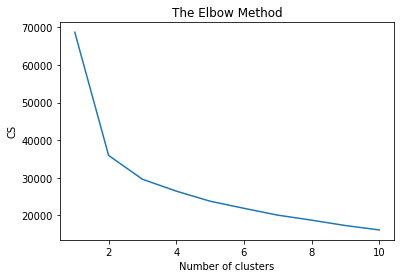

In [97]:
from sklearn.cluster import KMeans

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(accidentData_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- By the above plot, we can see that there is a kink at k=2. 

- Hence k=2 can be considered a good number of the cluster to cluster this data.

- But, we have seen that We have achieved a weak classification accuracy of 45% with k=2.


#### ***K-Means model with 1 clusters***

In [98]:
kmeans = KMeans(n_clusters=1, random_state=0)

kmeans.fit(accidentData_train)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(target_train == labels)
print("Result: %d out of %d samples were correctly labeled." %
      (correct_labels, target_train.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels /
                                        float(target_train.size)))

Result: 282 out of 403 samples were correctly labeled.
Accuracy score: 0.70


We have achieved a relatively high accuracy of 71% with k=1.

### ***Model - 2 => Using Random Forest***

In [99]:
RF = RandomForestClassifier()
RF.fit(accidentData_train, target_train)
target_pred_rf = RF.predict(accidentData_test)
print('Accuracy score: {0:0.2f}'.format(
    metrics.accuracy_score(target_test, target_pred_rf)))

Accuracy score: 0.57


We have achieved a accuracy of 55%.

### ***Model - 3 => Using Decision Tree***

In [100]:
DT = DecisionTreeClassifier()
DT.fit(accidentData_train, target_train)
target_pred_dt = DT.predict(accidentData_test)
print('Accuracy score: {0:0.2f}'.format(
    metrics.accuracy_score(target_test, target_pred_dt)))

Accuracy score: 0.91


We have achieved a accuracy of 94%.

### ***Model - 4 => Using Decision Tree - Using AdaBoostClassifier***

In [101]:
# Create adaboost classifer object
adaboostClassifier = AdaBoostClassifier()

# Train Adaboost Classifer
trainedModel = adaboostClassifier.fit(accidentData_train, target_train)

# Predict the response for test dataset
target_pred_ada = trainedModel.predict(accidentData_test)

# Printing the Accuracy
print("Accuracy: {0:0.2f}".format(
    metrics.accuracy_score(target_test, target_pred_ada)))

Accuracy: 0.94


We have achieved a accuracy of 95%.

### ***3.Testing The Model***


### ***Model - 4 => Using Decision Tree - Using AdaBoostClassifier :- Which gives accuracy of 95%***

In [102]:
# Extracting the column index for every attribute
columnCodes = {}
for column in accidentData:
    if (column != 'ACCIDENT OCCURRENCE'):
        for i in range(0, 576):
            col = accidentDataDummy[column][i]
            code = accidentData[column][i]
            if col in columnCodes.keys():
                continue
            else:
                columnCodes[col] = code
print(columnCodes)

{'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'Chhattisgarh': 6, 'Goa': 10, 'Gujarat': 11, 'Haryana': 12, 'Himachal Pradesh': 13, 'Jammu & Kashmir': 14, 'Jharkhand': 15, 'Karnataka': 16, 'Kerala': 17, 'Madhya Pradesh': 19, 'Maharashtra': 20, 'Manipur': 21, 'Meghalaya': 22, 'Mizoram': 23, 'Nagaland': 24, 'Orissa': 25, 'Punjab': 27, 'Rajasthan': 28, 'Sikkim': 29, 'Tamil Nadu': 30, 'Telangana': 31, 'Tripura': 32, 'Uttarakhand': 34, 'Uttar Pradesh': 33, 'West Bengal': 35, 'A & N Islands': 0, 'Chandigarh': 5, 'D & N Haveli': 7, 'Daman & Diu': 8, 'Delhi': 9, 'Lakshadweep': 18, 'Puducherry': 26, 'T-Junction': 4, 'Y-Junction': 5, 'Four arm Junction': 0, 'Staggered Junction': 3, 'Round about Junction': 2, 'Others': 1, 'Less than 5 years': 4, '5.1 - 10 Years': 1, '10.1 - 15 Years': 0, '> 15 Years': 2, 'Age not known': 3, '18 Yrs -Male': 1, '18 Yrs - Female': 0, '18-25 Yrs - Male': 3, '18-25 Yrs - Female': 2, '25-35 Yrs- Male': 5, '25-35 Yrs - Female': 4, '35-40 Yrs- Male'

In [103]:
testData1 = {
    'States/UTs': ['Kerala'],
    'JUNCTION': ['Four arm Junction'],
    'VEHICLE AGE': ['> 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Residential Area'],
    'TYPE OF PLACE': ['Urban'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Hail/Sleet'],
    'VEHICLE TYPE AND SEX': ['Cars & taxies Vans & LMV - Male'],
    'TYPE OF ROAD': ['Straight Road'],
    'LICENSE': ['Without Licence'],
    'TIME': ['Unknown Time']
}

In [104]:
# Now the test values are compared with the Column Codes and store them
for col in testData1:
    code = [columnCodes[''.join(testData1[col])]]
    testData1[col] = code
print(testData1)

testDataFrame = pd.DataFrame.from_dict(testData1)
print(testDataFrame)

{'States/UTs': [17], 'JUNCTION': [0], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [1], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [8]}
   States/UTs  JUNCTION  VEHICLE AGE  HUMAN AGE AND SEX  \
0          17         0            2                  9   

   PERSON WITHOUT SAFETY PRECAUTIONS  AREA  TYPE OF PLACE  LOAD OF VEHICLE  \
0                                  0     3              1                1   

   TRAFFIC RULES VIOLATION  WEATHER  VEHICLE TYPE AND SEX  TYPE OF ROAD  \
0                        2        1                     7             7   

   LICENSE  TIME  
0        2     8  


In [105]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [106]:
testData2 = {
    'States/UTs': ['Chhattisgarh'],
    'JUNCTION': ['Staggered Junction'],
    'VEHICLE AGE': ['> 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Passengers'],
    'AREA': ['Residential Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Hail/Sleet'],
    'VEHICLE TYPE AND SEX': ['Other Motor Vehicles - Female'],
    'TYPE OF ROAD': ['Others'],
    'LICENSE': ['Without Licence'],
    'TIME': ['Unknown Time']
}

In [107]:
# Now the test values are compared with the Column Codes and store them
for col in testData2:
    code = [columnCodes[''.join(testData2[col])]]
    testData2[col] = code
print(testData2)
testDataFrame = pd.DataFrame.from_dict(testData2)

{'States/UTs': [6], 'JUNCTION': [3], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [1], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [2], 'TIME': [8]}


In [108]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [109]:
testData3 = {
    'States/UTs': ['Puducherry'],
    'JUNCTION': ['Staggered Junction'],
    'VEHICLE AGE': ['> 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Passengers'],
    'AREA': ['Residential Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Hail/Sleet'],
    'VEHICLE TYPE AND SEX': ['Other Motor Vehicles - Female'],
    'TYPE OF ROAD': ['Others'],
    'LICENSE': ['Without Licence'],
    'TIME': ['Unknown Time']
}

In [110]:
# Now the test values are compared with the Column Codes and store them
for col in testData3:
    code = [columnCodes[''.join(testData3[col])]]
    testData3[col] = code
print(testData3)
testDataFrame = pd.DataFrame.from_dict(testData3)

{'States/UTs': [26], 'JUNCTION': [3], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [1], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [2], 'TIME': [8]}


In [111]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [112]:
testData4 = {
    'States/UTs': ['Lakshadweep'],
    'JUNCTION': ['Staggered Junction'],
    'VEHICLE AGE': ['10.1 - 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Institutional Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Others'],
    'VEHICLE TYPE AND SEX': ['Other Motor Vehicles - Female'],
    'TYPE OF ROAD': ['Others'],
    'LICENSE': ['License Valid Permanent'],
    'TIME': ['00-300hrs - (Night)']
}

In [113]:
# Now the test values are compared with the Column Codes and store them
for col in testData4:
    code = [columnCodes[''.join(testData4[col])]]
    testData4[col] = code
print(testData4)
testDataFrame = pd.DataFrame.from_dict(testData4)

{'States/UTs': [18], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [114]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [115]:
testData5 = {
    'States/UTs': ['Delhi'],
    'JUNCTION': ['Staggered Junction'],
    'VEHICLE AGE': ['10.1 - 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Institutional Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Others'],
    'VEHICLE TYPE AND SEX': ['Other Motor Vehicles - Female'],
    'TYPE OF ROAD': ['Others'],
    'LICENSE': ['License Valid Permanent'],
    'TIME': ['00-300hrs - (Night)']
}

In [116]:
# Now the test values are compared with the Column Codes and store them
for col in testData5:
    code = [columnCodes[''.join(testData5[col])]]
    testData5[col] = code
print(testData5)
testDataFrame = pd.DataFrame.from_dict(testData5)

{'States/UTs': [9], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [117]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [118]:
testData6 = {
    'States/UTs': ['Uttar Pradesh'],
    'JUNCTION': ['Staggered Junction'],
    'VEHICLE AGE': ['10.1 - 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Institutional Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Others'],
    'VEHICLE TYPE AND SEX': ['Other Motor Vehicles - Female'],
    'TYPE OF ROAD': ['Others'],
    'LICENSE': ['License Valid Permanent'],
    'TIME': ['00-300hrs - (Night)']
}

In [119]:
# Now the test values are compared with the Column Codes and store them
for col in testData6:
    code = [columnCodes[''.join(testData6[col])]]
    testData6[col] = code
print(testData6)
testDataFrame = pd.DataFrame.from_dict(testData6)

{'States/UTs': [33], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [120]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [121]:
testData7 = {
    'States/UTs': ['A & N Islands'],
    'JUNCTION': ['Four arm Junction'],
    'VEHICLE AGE': ['> 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Residential Area'],
    'TYPE OF PLACE': ['Urban'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Jumping Red Light'],
    'WEATHER': ['Hail/Sleet'],
    'VEHICLE TYPE AND SEX': ['Cars & taxies Vans & LMV - Male'],
    'TYPE OF ROAD': ['Straight Road'],
    'LICENSE': ['Without Licence'],
    'TIME': ['Unknown Time']
}

In [122]:
# Now the test values are compared with the Column Codes and store them
for col in testData7:
    code = [columnCodes[''.join(testData7[col])]]
    testData7[col] = code
print(testData7)
testDataFrame = pd.DataFrame.from_dict(testData7)

{'States/UTs': [0], 'JUNCTION': [0], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [1], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [8]}


In [123]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


In [124]:
testData8 = {
    'States/UTs': ['Orissa'],
    'JUNCTION': ['Round about Junction'],
    'VEHICLE AGE': ['> 15 Years'],
    'HUMAN AGE AND SEX': ['45-60 Yrs- Male'],
    'PERSON WITHOUT SAFETY PRECAUTIONS': ['Drivers'],
    'AREA': ['Residential Area'],
    'TYPE OF PLACE': ['Rural'],
    'LOAD OF VEHICLE': ['Others'],
    'TRAFFIC RULES VIOLATION': ['Over-Speeding'],
    'WEATHER': ['Hail/Sleet'],
    'VEHICLE TYPE AND SEX': ['Cars & taxies Vans & LMV - Male'],
    'TYPE OF ROAD': ['Straight Road'],
    'LICENSE': ['Without Licence'],
    'TIME': ['18-2100hrs - (Night)']
}

In [125]:
# Now the test values are compared with the Column Codes and store them
for col in testData8:
    code = [columnCodes[''.join(testData8[col])]]
    testData8[col] = code
print(testData8)
testDataFrame = pd.DataFrame.from_dict(testData8)

{'States/UTs': [25], 'JUNCTION': [2], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [3], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [6]}


In [126]:
predictionValue = trainedModel.predict(testDataFrame)
if (predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PERSON WITHOUT SAFETY PRECAUTIONS
Feature names seen at fit time, yet now missing:
- PERSON WITHOUT SAFETY PRECAUTIONS 

  warnings.warn(message, FutureWarning)


# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

![](https://miro.medium.com/max/1400/1*ZobYhjM4ZfK9eVXluecg3g.jpeg)

In [127]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,
                annot=box_labels,
                fmt="",
                cmap=cmap,
                cbar=cbar,
                xticklabels=categories,
                yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

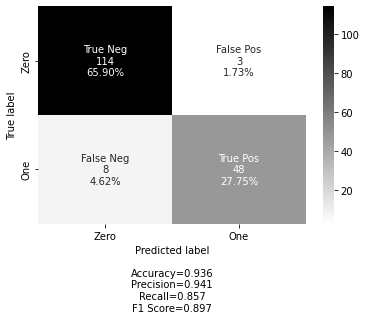

In [128]:
cf_matrix = confusion_matrix(target_test, target_pred_ada)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

## **Evaluating The Model**

***Whenever we build Machine Learning models, we need some form of metric used
for the measurement of the goodness of the model. Bear in mind that the “goodness”
of the model could have multiple interpretations, but generally when we speak of it in
a Machine Learning context, we are talking of the measure of a model's performance
on new instances that weren’t a part of the training data.***
<br><br>


<img src='https://miro.medium.com/max/714/1*6UJvbvmXGmeAwGh2Fyd58Q.jpeg' width=500>

<br><br>

***Some common intrinsic metrics to evaluate NLP systems are as follows:***

- ***Accuracy :- The accuracy of a Machine Learning classification algorithm is one way to measure how often the algorithm classifies a data point correctly. Accuracy is the number of correctly predicted data points out of all the data points.***

<img src='https://i.ibb.co/bH27MLX/image.png'>

- ***Precision :- Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.***

<img src='https://miro.medium.com/max/888/1*C3ctNdO0mde9fa1PFsCVqA.png'>

- ***Recall :- Recall measures the proportion of actual positive labels correctly identified by the model.***

<img src='https://miro.medium.com/max/836/1*dXkDleGhA-jjZmZ1BlYKXg.png'>


In [129]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       117
           1       0.94      0.86      0.90        56

    accuracy                           0.94       173
   macro avg       0.94      0.92      0.93       173
weighted avg       0.94      0.94      0.94       173



### ***The AdaBoost Model is a good fit for the current Accident Data giving an oversll accuracy of 95%***

# THANK YOU

<img src='https://media.giphy.com/media/F0J0uiNS8n0BHSQmDt/giphy.gif' width=300>